# **Classification - Tata Steel Machine Failure Prediction**
**End to end machine learning capstone project**
- Github - <a href = 'https://www.kaggle.com/code/dakshvanshaj/detailed-machine-failure-prediction-rf-xgbc'>Check this project at kaggle</a>
## Context

- In the manufacturing sector, maintaining the efficiency and reliability of machinery is critical to achieving optimal production quality and minimizing downtime. TATA Steel, a leader in the steel manufacturing industry, is constantly looking to improve its production processes by leveraging advanced data analytics and machine learning techniques. The ability to predict and prevent machine failures is crucial for minimizing production losses, reducing maintenance costs, and ensuring product quality.

- The dataset provided in this project represents various operational parameters and failure types of machinery used in steel production. The data is synthetically generated based on real-world scenarios, allowing us to explore different machine learning techniques to predict potential failures. By analyzing this data, TATA Steel aims to develop predictive models that can anticipate machine failures before they occur, thus enabling proactive maintenance and improved operational efficiency.

## **Business Objective**

 - TATA Steel aims to develop predictive models that can anticipate machine failures before they occur, thus enabling proactive maintenance and improved operational efficiency.

 - **How will the solution be used?**
     - To predict machine failure before its occurance.
     - Maintenance will then prevent a major damage that would have been caused due to machine failure to the machine as well as the supply chain delay.

 - **Current solutions?**
     - Manual inspection would probabily the current solution used in the factory.
   
 - **Framing the problem**
    - It is a Supervised Learning problem as labels are given.
    - It is a Classification problem as we require output whether maintainance is needed or not.
    - It is a binary classification problem.
 - **Assumptions**
    - We need categorical output i.e wheather machine needs maintenance or not , binary 0 and 1.
      

## **Spoiler alert! skip ahead if you want to avoid the results before reading the notebook.**

# **Model Summary**  

## **What was our goal?**  
- We needed a machine learning model capable of predicting **machine failures in advance** so that preventive measures could be taken.  

## **Did our model achieve that goal?**  
- **Yes**, we successfully built two models capable of predicting machine failures.  

## **What is the performance?**  

- **Random Forest:**

  - Achieves a **recall of ~76.7%** at **99% precision** and **F1 Score of 86.5**.
  - Achieves a **recall of ~90%** when tuned to a threshold of **0.13094**, with a **precision of ~90%** and an **F1 score of 0.899**.   
  - A higher false positive rate (lower precision) could also lead to **unnecessary downtime**, impacting operational efficiency.  

- **XGB Classifier:**  
  - Performs similarly, with a **precision of ~99%**, a **recall of 76.6%**, and an **F1 score of 86.4%**
  - Achieves a **recall of ~80%** when tuned to a threshold of **0.15502**, with a **precision of ~92%** and an **F1 score of 0.857**. 
  - Increasing recall further is possible, but it would come at the cost of a **significant drop in precision**. 

## **Which model should we pick?**  
- Both models perform similarly, but if thresholds are tuned the recall can be increased to 90% in case of **Random Forest** on optimal precision of 90%.  
- The choice depends on **available computational resources** and **processing power** required for deployment.  

## **How can we improve the model further?**  
- **Hyperparameter tuning:**  
  - We could explore a broader range of hyperparameters and use larger number of optuna trials, though this would be **computationally expensive** and time consuming.  
- **Handling class imbalance:**  
  - We could try **SMOTE (Synthetic Minority Over-sampling Technique)** for balancing the dataset, though we have already applied proper techniques in hyperparameter tuning.  
- **Feature engineering:**  
  - The **ProductID** column could be processed by **removing letters** and replacing them with empty spaces to extract numerical patterns.  
- **Feature selection:**  
  - We could attempt to **remove redundant features** and retrain the model. However, this may not yield a **significant performance boost**.  



## **Getting the data**

In [8]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# to ignore unneccessary warnings of depriciations etc
import warnings
warnings.filterwarnings("ignore")

**Training Set**

In [11]:
# is used to download form a url
import gdown

# getting the Training set data from a google drive link
file_id = "1IvruHG-f3p8dVKdoq1HlVC8g33iuqfVd"
url = f"https://drive.google.com/uc?id={file_id}"
output = "train.csv"  # Change extension if needed
gdown.download(url, output, quiet=False)

df_train = pd.read_csv(output)
df_train.head()  # Display first 5 rows


Downloading...
From: https://drive.google.com/uc?id=1IvruHG-f3p8dVKdoq1HlVC8g33iuqfVd
To: C:\Users\dave\Downloads\train.csv
100%|██████████| 7.18M/7.18M [00:00<00:00, 8.51MB/s]


id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [12]:
df_train.duplicated().sum()

0

**Test Set**

In [14]:
# Getting the test set data
file_id = '1y0WS2MVXS8v3fjzOyOroydB18FN9e3ZT'
url = f"https://drive.google.com/uc?id={file_id}"
output_test = 'test.csv'
gdown.download(url, output_test, quiet= False)

df_test = pd.read_csv(output_test)

Downloading...
From: https://drive.google.com/uc?id=1y0WS2MVXS8v3fjzOyOroydB18FN9e3ZT
To: C:\Users\dave\Downloads\test.csv
100%|██████████| 4.68M/4.68M [00:00<00:00, 6.96MB/s]


## Dataset Description

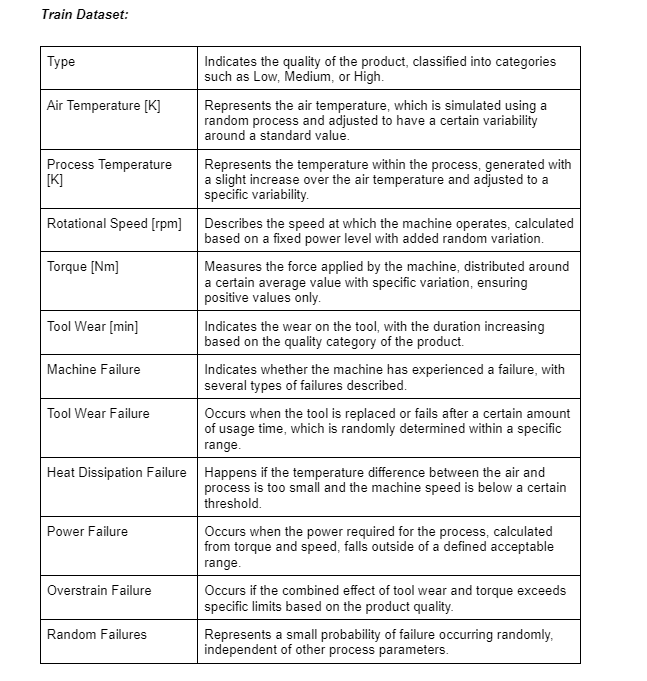

- Dataset also contains attibute called **Product ID** and each represents a unique machine in the factory.

In [18]:
print(f'Shape of training set {df_train.shape}, test set {df_test.shape}')

Shape of training set (136429, 14), test set (90954, 13)


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [21]:
df_train.describe()

id  Air temperature [K]  Process temperature [K]  \
count  136429.000000        136429.000000            136429.000000   
mean    68214.000000           299.862776               309.941070   
std     39383.804275             1.862247                 1.385173   
min         0.000000           295.300000               305.800000   
25%     34107.000000           298.300000               308.700000   
50%     68214.000000           300.000000               310.000000   
75%    102321.000000           301.200000               310.900000   
max    136428.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           136429.000000  136429.000000    136429.000000   
mean              1520.331110      40.348643       104.408901   
std                138.736632       8.502229        63.965040   
min               1181.000000       3.800000         0.000000   
25%               1432.000000      34.600000        48.000000   
50%               1493.000000      40.400000       106.000000   
75%               1580.000000      46.100000       159.000000   
max               2886.000000      76.600000       253.000000   

       Machine failure            TWF            HDF            PWF  \
count    136429.000000  136429.000000  136429.000000  136429.000000   
mean          0.015744       0.001554       0.005160       0.002397   
std           0.124486       0.039389       0.071649       0.048899   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           0.000000       0.000000       0.000000       0.000000   
75%           0.000000       0.000000       0.000000       0.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 OSF            RNF  
count  136429.000000  136429.000000  
mean        0.003958       0.002258  
std         0.062789       0.047461  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

# **Exploratory Data Analysis**

In [23]:
# Using a seaborn theme style for plots
plt.style.use('seaborn-v0_8-whitegrid')

**Copy of training dataset for exploration**

In [25]:
df_eda = df_train.copy()

# **Univariate Analysis**

## Distribution of numerical attributes

In [28]:
df_eda.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [29]:
# dropping id column as its just the serial number and rebundant
df_eda = df_eda.drop(columns=['id'])

**Plotting histograms of numerical attributes for taking a look at type of distribution**

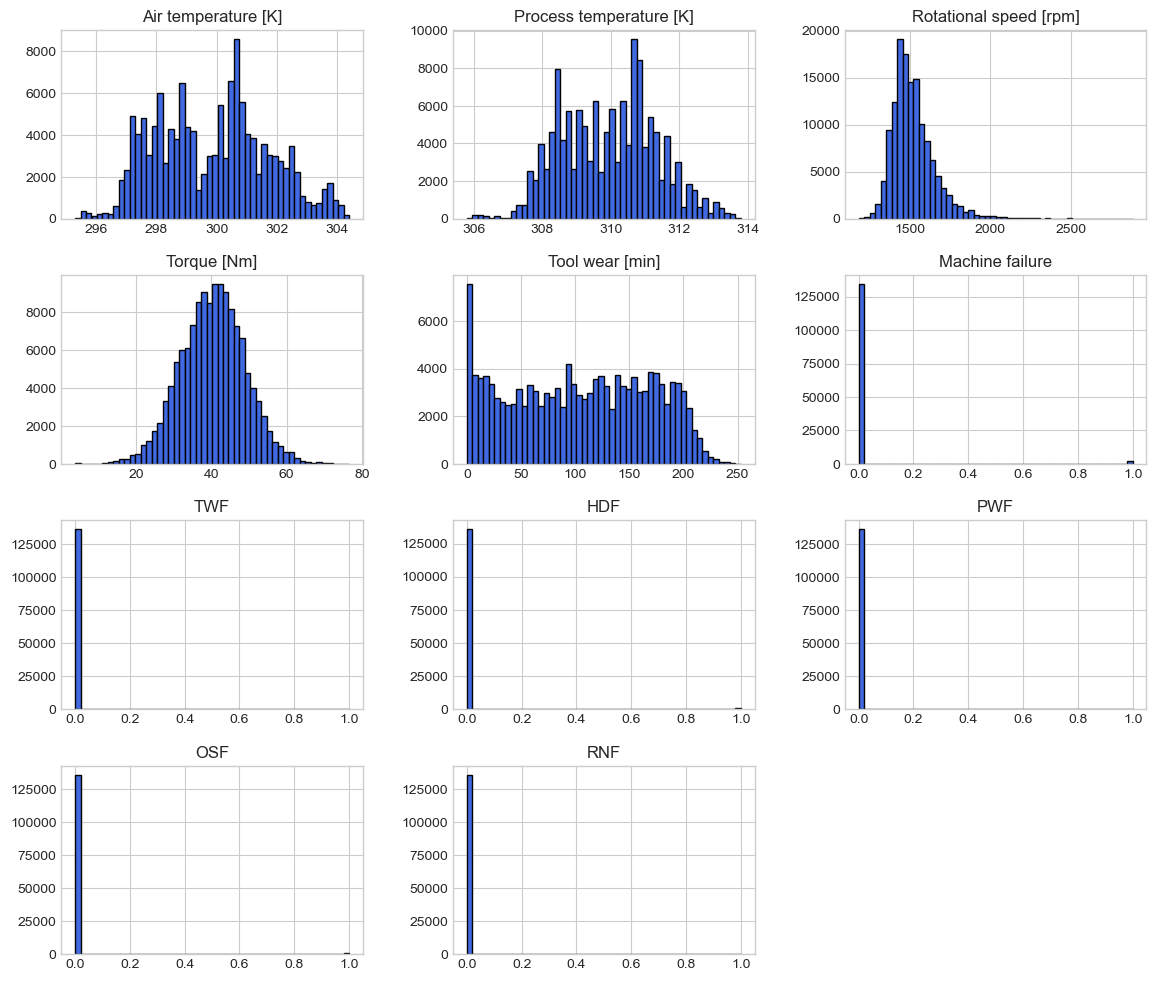

In [31]:
colors = ['#764e93',"#e39cdc", "#ad87de"]

# df.hist creates a histogram for each attribute without using subplots
df_eda.hist(figsize = (14,12),bins = 50, color = 'royalblue',edgecolor='black')
plt.show()

## Distribution of binary attributes

**Checking the value counts of binary features**

In [34]:
# binary features
values = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']
for value in values:
    # print value counts for each iteration
    print(df_eda[value].value_counts(), '\n--------------------------')

Machine failure
0    134281
1      2148
Name: count, dtype: int64 
--------------------------
TWF
0    136217
1       212
Name: count, dtype: int64 
--------------------------
HDF
0    135725
1       704
Name: count, dtype: int64 
--------------------------
PWF
0    136102
1       327
Name: count, dtype: int64 
--------------------------
OSF
0    135889
1       540
Name: count, dtype: int64 
--------------------------
RNF
0    136121
1       308
Name: count, dtype: int64 
--------------------------


**Bar plot for binary features**

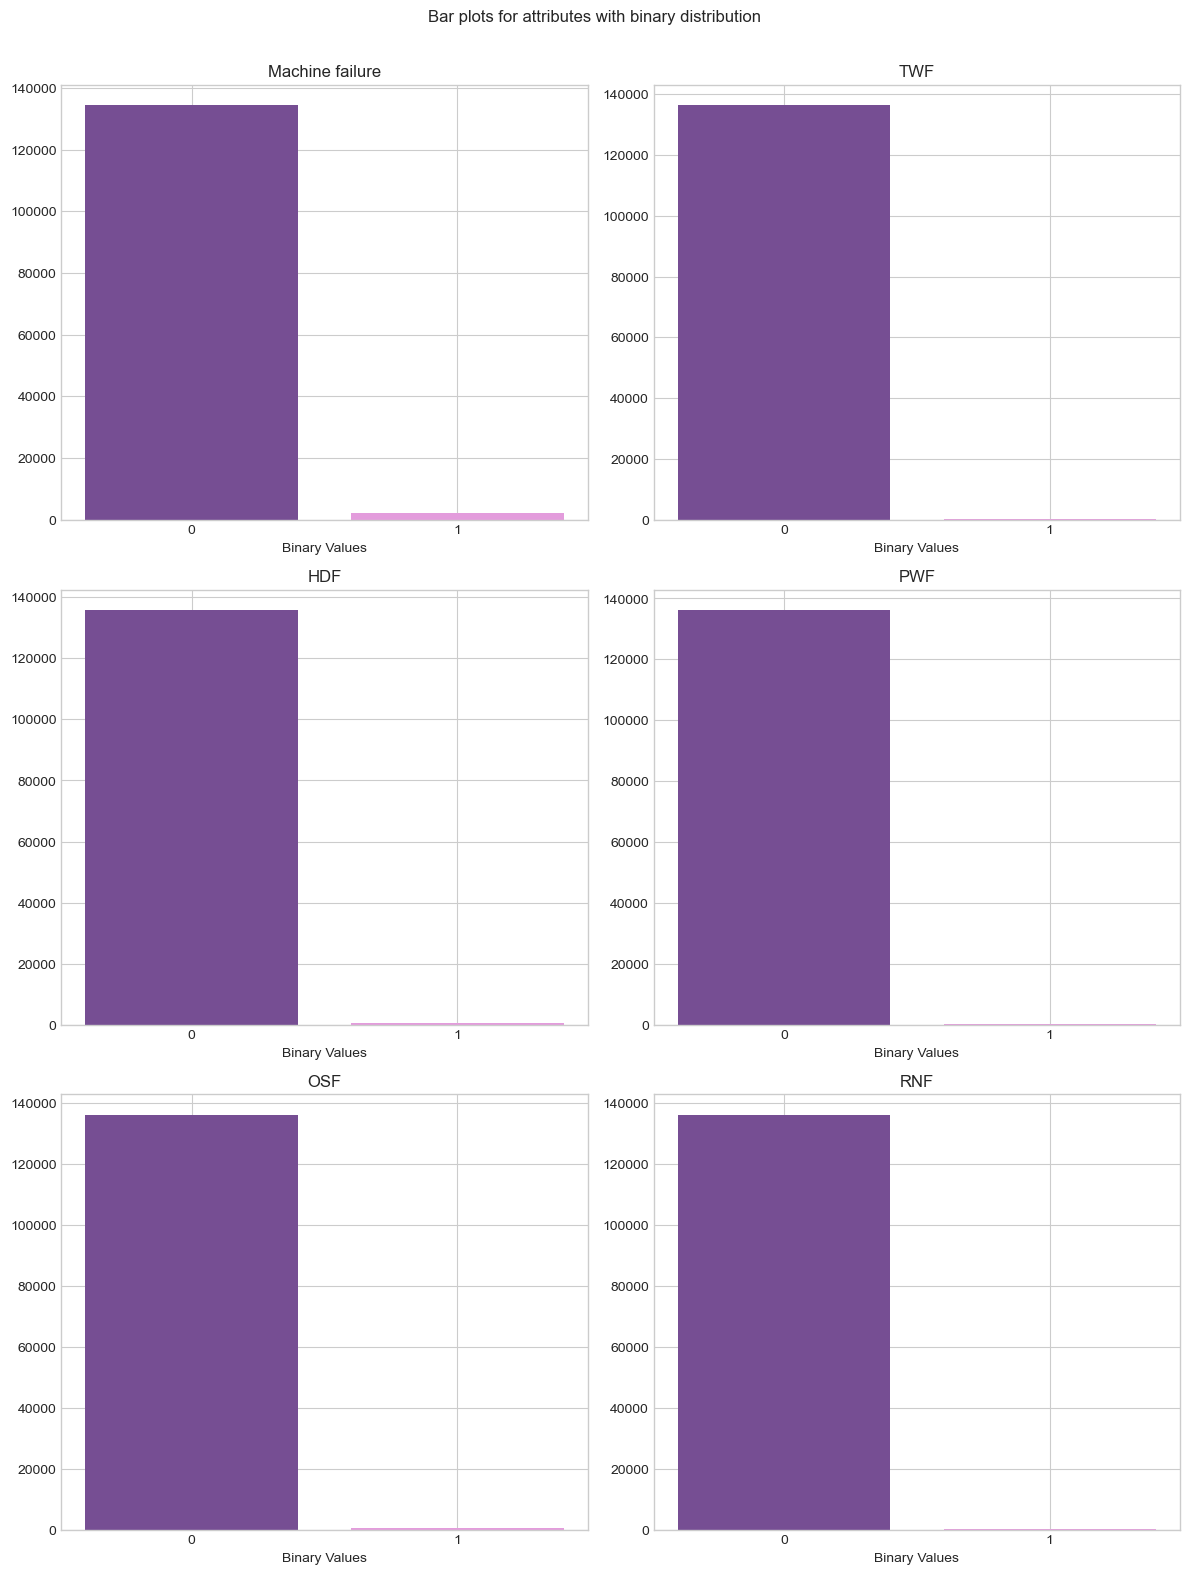

In [36]:
import matplotlib.pyplot as plt

# Binary attributes
attributes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 20))  # Adjust the figsize

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each attribute and plot a bar plot
for i, attr in enumerate(attributes):
    ax = axes[i]
    # Value counts (count of 0s and 1s for binary features)
    val_count = df_eda[attr].value_counts().sort_index()  # Ensure 0 comes before 1 for binary features
    # Create a bar plot on the current axis
    ax.bar(val_count.index, val_count.values, color = colors)
    # Set the subplot title to the attribute name
    ax.set_title(attr)
    ax.set_xlabel("Binary Values")
    # Set the x-ticks to only show 0 and 1
    ax.set_xticks([0, 1])
    # Optionally, adjust tick label rotation if needed
    ax.tick_params(axis='x', rotation=0)

# Remove any unused subplots (if the total number of subplots exceeds attributes)
for j in range(len(attributes), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and add an overall title
plt.tight_layout()
plt.suptitle("Bar plots for attributes with binary distribution", y=1.02)
plt.show()


### **Insights**

### **1. `Air temperature [K]`**
- **Type:** Slightly bimodal distribution
- **Explanation:** The data shows two peaks (bimodal), suggesting that air temperature may cluster around two typical ranges, likely due to different operating conditions or machine states.

---

### **2. `Process temperature [K]`**
- **Type:** Slightly bimodal distribution
- **Explanation:** Similar to air temperature, there are two peaks. This might indicate that the process operates under two primary conditions or modes.

---

### **3. `Rotational speed [rpm]`**
- **Type:** Right-skewed distribution
- **Explanation:** The rotational speed data has a peak and a gradual tail on the right, meaning most values are concentrated on the lower end with fewer values at higher speeds.

---

### **4. `Torque [Nm]`**
- **Type:** Normal (Gaussian) distribution
- **Explanation:** The torque appears to have a classic bell-shaped curve, centered around its mean, with symmetric tails on both sides.

---

### **5. `Tool wear [min]`**
- **Type:** Uniform distribution
- **Explanation:** The wear is nearly evenly distributed across the range, suggesting that tools experience consistent wear over time without significant bias toward specific durations.

---

### **6. `Machine failure`**
- **Type:** Binary distribution
- **Explanation:** This feature is binary (0 or 1), with the majority of data points being `0` (no failure) and very few being `1` (failure). This indicates a highly imbalanced dataset.

---

### **7. `TWF` (Tool Wear Failure), `HDF` (Heat Dissipation Failure), `PWF` (Power Failure), `OSF` (Overstrain Failure), `RNF` (Random Failure)**
- **Type:** Binary distribution
- **Explanation:** Similar to `Machine failure`, these features are also binary, with most values being `0`. This indicates the dataset contains few failure cases for each failure type.

---

### **Required Actions**
1. **Skewed features** like `Rotational speed` and `Air temperature` may need transformation (e.g., log transformation) for modeling.
2. **Highly imbalanced features** like `Machine failure` and failure types may require techniques like oversampling or undersampling to handle during model building.
3. **Feature Scaling** - Normalization will be required to make the scales comparable as ml models dont like high scale difference between the attributes.
4. **Adding new similarity feature** like using kmean and rbf kernel for biomodal attibutes.

## **Distribution of categorical attibutes**

In [39]:
print(f"Number of unique products in Product ID - {len(df_eda['Product ID'].unique())}")
print(f"Number of unique Type of quality in Type column - {len(df_eda['Type'].unique())}")

Number of unique products in Product ID - 9976
Number of unique Type of quality in Type column - 3


In [40]:
df_eda['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [41]:
counts_prod_id = df_eda['Product ID'].value_counts()
counts_prod_id.sort_values(ascending = False).head(10)

Product ID
L53257    139
L53271    131
L49056    131
L54275    120
L48892    120
L53258    117
L54255    108
L56257    105
L53140    104
L48894    102
Name: count, dtype: int64

**As number of unique values is very high we will only plot top 15**

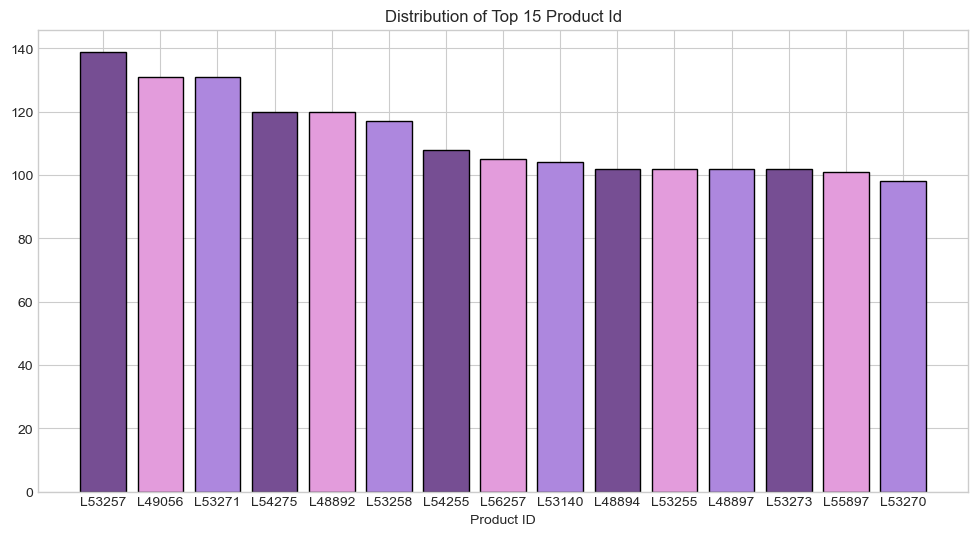

In [43]:
plt.figure(figsize = (12,6))
plt.bar(counts_prod_id.index[:15], counts_prod_id.values[:15], color =colors, edgecolor = 'black')
plt.title('Distribution of Top 15 Product Id')
plt.xlabel("Product ID")
plt.show()

In [44]:
counts_type = df_eda['Type'].value_counts()
counts_type


Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

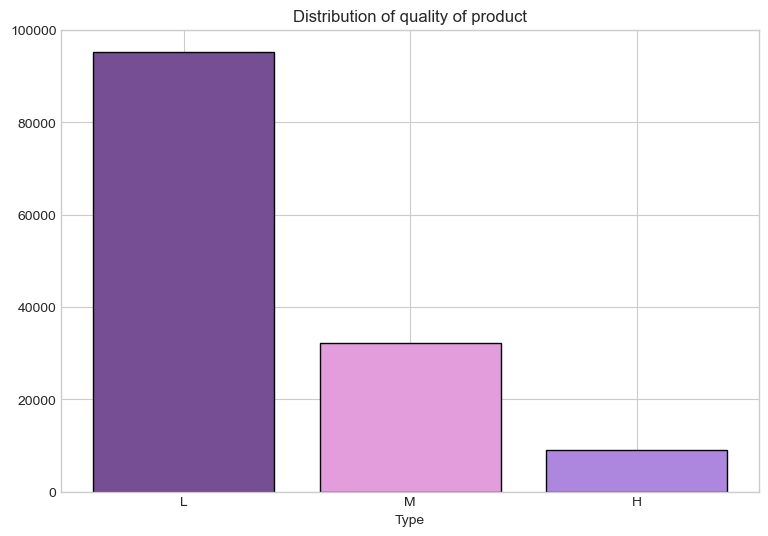

In [45]:
plt.figure(figsize = (9,6))
plt.bar(counts_type.index, counts_type.values, color =colors, edgecolor = 'black')
plt.title('Distribution of quality of product')
plt.xlabel("Type")
plt.show()

### **Insights**
- We can see that in `Type` attribute L(Lowest) quality of product is highest with frequency of 95354 in the dataset.
- Followed by M(medium) and then H(highest)

- We can see that some product ID are more frequent than others.
- We cant encode these product ID as it would be very high dimensional case but we can try converting it to a numerical attribute.

## **Distribution of all attributes using violin plots**

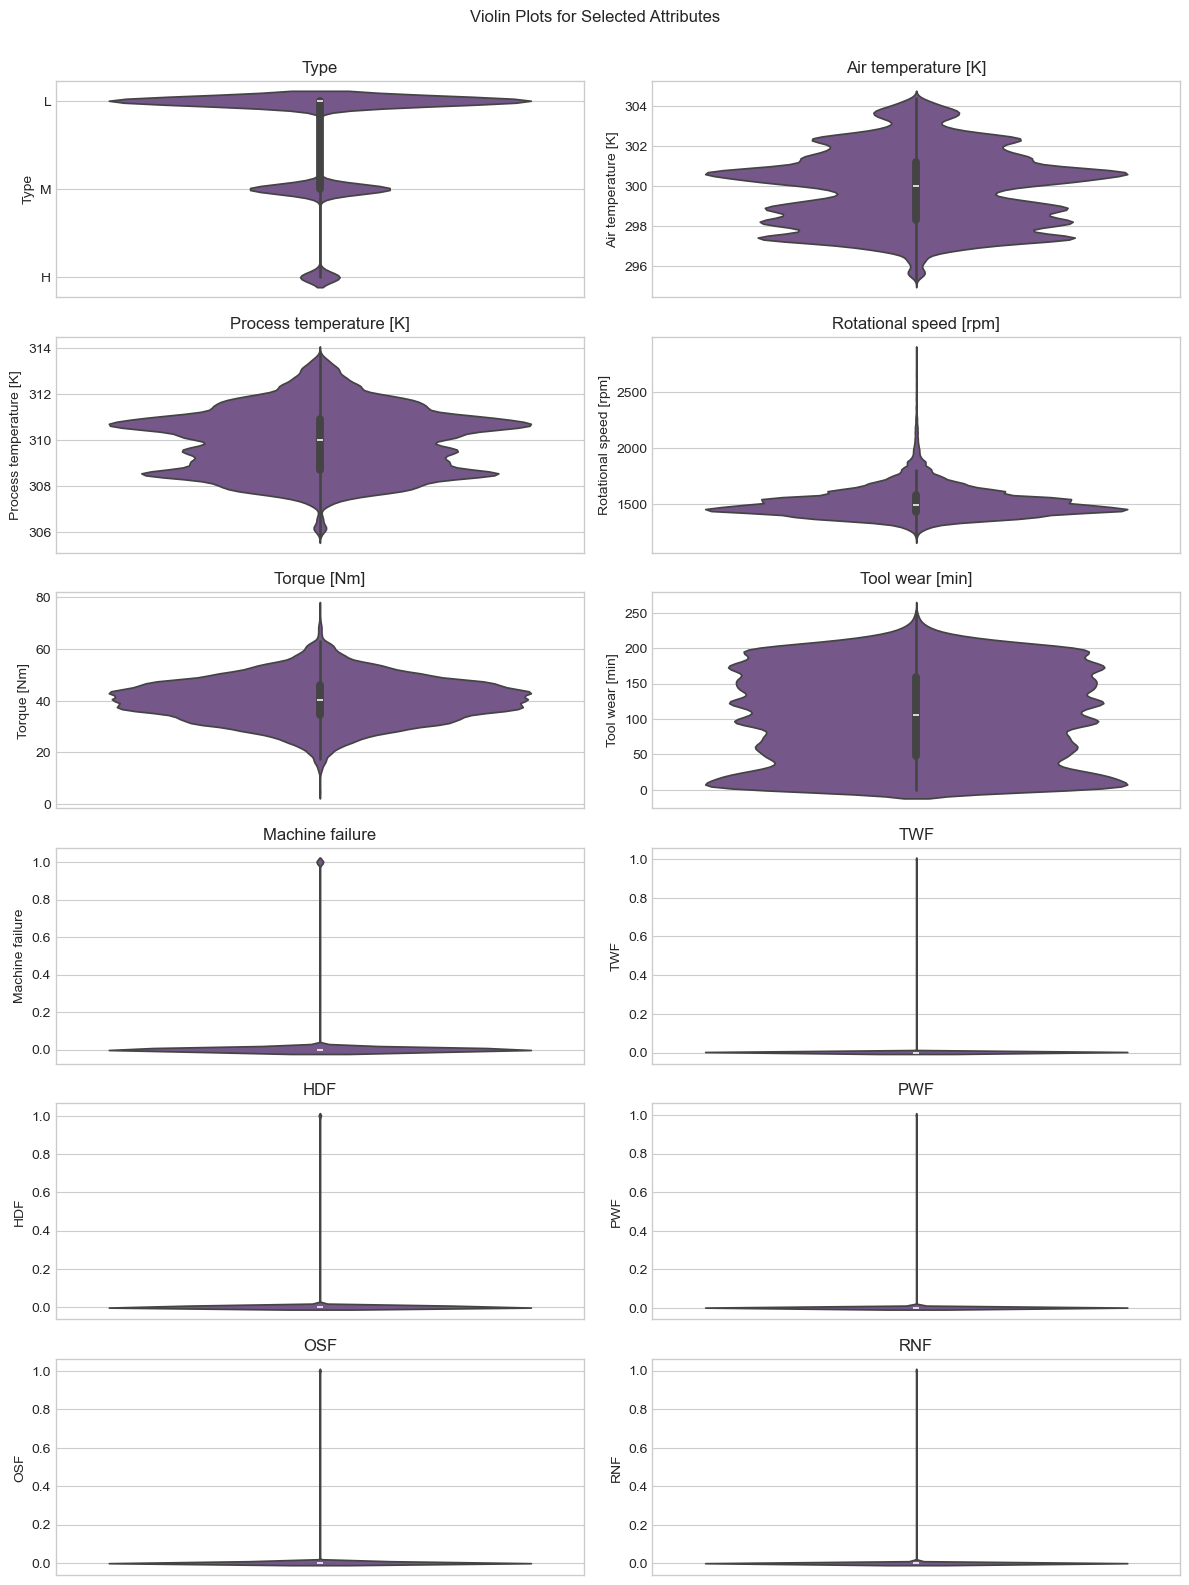

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of attributes you want to plot
attributes = ['Type', 'Air temperature [K]',
              'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
              'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
              'RNF']

# Create a 7x2 grid of subplots (14 subplots for 14 attributes)
fig, axes = plt.subplots(7, 2, figsize=(12, 18))

axes = axes.flatten()

# Loop through each attribute and plot a violin plot
for i, attr in enumerate(attributes):
    ax = axes[i]
    # Create a violin plot on the current axis
    sns.violinplot(df_eda[attr], ax=ax, color = colors[0])
    # Set the subplot title to the attribute name
    ax.set_title(attr)
    # Remove the x-axis label for clarity
    ax.set_xlabel("")
    # Optionally, adjust tick label rotation if needed
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots (if the total number of subplots exceeds attributes)
for j in range(len(attributes), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout and add an overall title
plt.tight_layout()
plt.suptitle("Violin Plots for Selected Attributes", y=1.02)
plt.show()


In [49]:
machine_failure_counts = df_eda['Machine failure'].value_counts()

### **Insights**

### 1. **Type**
- **Observation**: The distribution shows three distinct categories: `L`, `M`, and `H`. The `L` type dominates, with `H` being rare.
- **Interpretation**: Most products are of `L` type, and this imbalance might need consideration during analysis.

### 2. **Air temperature [K]**
- **Observation**: The distribution is slightly multimodal, centered around a mean value near 300K.

- **Interpretation**: Air temperatures are consistent, with only slight variations. These conditions could be controlled or naturally stable.

### 3. **Process temperature [K]**
- **Observation**: The distribution is slightly wider than air temperature but also centered near 310K.
- **Interpretation**: Process temperatures vary slightly more but remain within a narrow range, indicating controlled processes.

### 4. **Rotational speed [rpm]**
- **Observation**: The distribution is bimodal, with peaks at approximately 1250 and 2000 rpm.
- **Interpretation**: Machines might operate at two distinct speed settings, reflecting different operational modes.

### 5. **Torque [Nm]**
- **Observation**: The distribution is unimodal with a peak around 40 Nm. The spread is relatively wide.
- **Interpretation**: Torque varies significantly across operations, but most values center around the peak.

### 6. **Tool wear [min]**
- **Observation**: Tool wear is quite consistent over time.

### 7. **Machine failure**
- **Observation**: The distribution is heavily skewed towards 0, with very few occurrences of 1.
- **Interpretation**: Machine failures are rare in the dataset and could create class imbalance for predictive modeling.

### 8. **TWF (Tool Wear Failure)**
- **Observation**: The distribution is highly skewed towards 0, with very few occurrences of 1.
- **Interpretation**: Tool wear failures are rare, similar to overall machine failures.

### 9. **HDF (Heat Dissipation Failure)**
- **Observation**: The distribution is almost entirely skewed towards 0, with very few 1s.
- **Interpretation**: Heat dissipation failures are also rare.

### 10. **PWF (Power Failure)**
- **Observation**: Almost all values are 0, with rare occurrences of 1.
- **Interpretation**: Power failures are uncommon, indicating a stable power supply.

### 11. **OSF (Overstrain Failure)**
- **Observation**: Similar to the previous failure modes, the distribution is highly skewed towards 0.
- **Interpretation**: Overstrain failures are minimal, suggesting robust machine design or operation.

### 12. **RNF (Random Failures)**
- **Observation**: This attribute also shows a highly skewed distribution with rare failures.



# **Bivariate Analysis**

## Correlation between attibutes

In [53]:
from pandas.plotting import scatter_matrix

In [54]:

# Calculating the correlation matrix (only for numeric columns)
correlation_matrix = df_eda.corr(numeric_only=True)


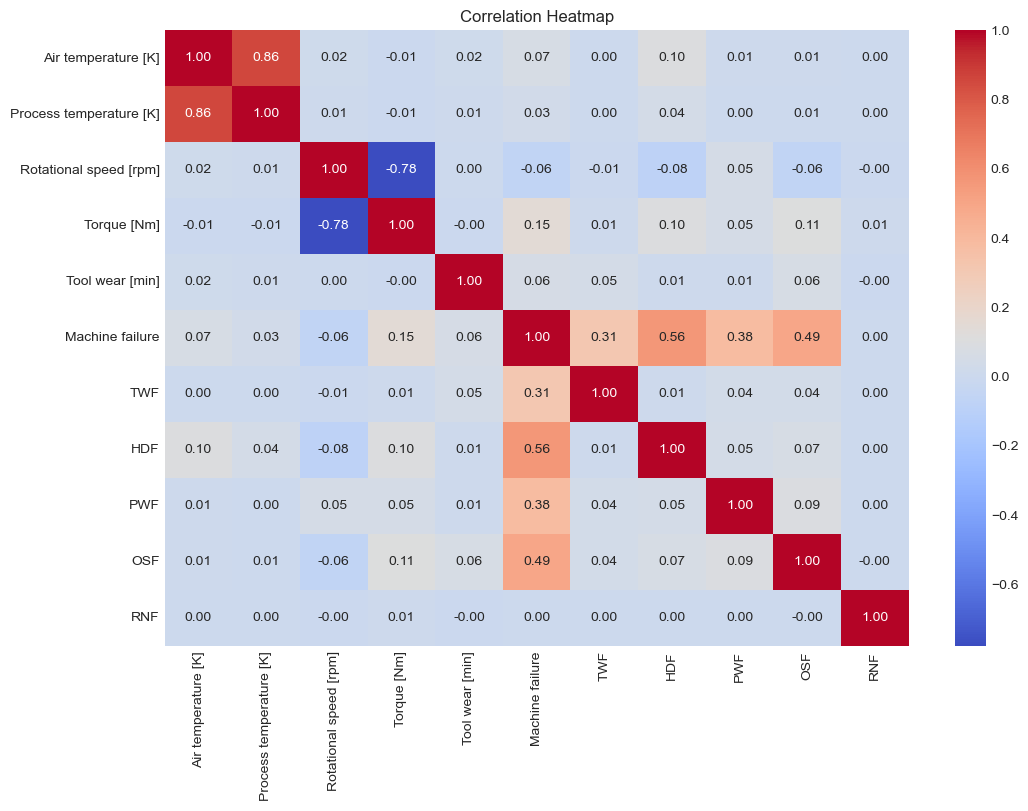

In [55]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [56]:
# Compute the correlation matrix
corr_full = df_eda.corr(numeric_only=True)

# get the  correlation values for the column 'Machine failure'
corr_machine = corr_full['Machine failure'].sort_values(ascending=False)
corr_machine

Machine failure            1.000000
HDF                        0.564507
OSF                        0.494668
PWF                        0.383941
TWF                        0.311919
Torque [Nm]                0.145793
Air temperature [K]        0.067744
Tool wear [min]            0.056448
Process temperature [K]    0.030966
RNF                        0.001428
Rotational speed [rpm]    -0.060868
Name: Machine failure, dtype: float64

In [57]:
# Convert to a DataFrame
corr_df = pd.DataFrame(corr_machine)

# Filter correlations above a threshold (e.g., > 0.1)
good_machine_corr = corr_df[corr_df['Machine failure'] >= 0.05]

good_machine_corr


Machine failure
Machine failure             1.000000
HDF                         0.564507
OSF                         0.494668
PWF                         0.383941
TWF                         0.311919
Torque [Nm]                 0.145793
Air temperature [K]         0.067744
Tool wear [min]             0.056448

## Scatter plot to visualize higher correlated attributes
- Although most of the highly correlated attributes are binary so it wont be as usefull to visualize.

In [59]:
good_machine_corr.index

Index(['Machine failure', 'HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]',
       'Air temperature [K]', 'Tool wear [min]'],
      dtype='object')

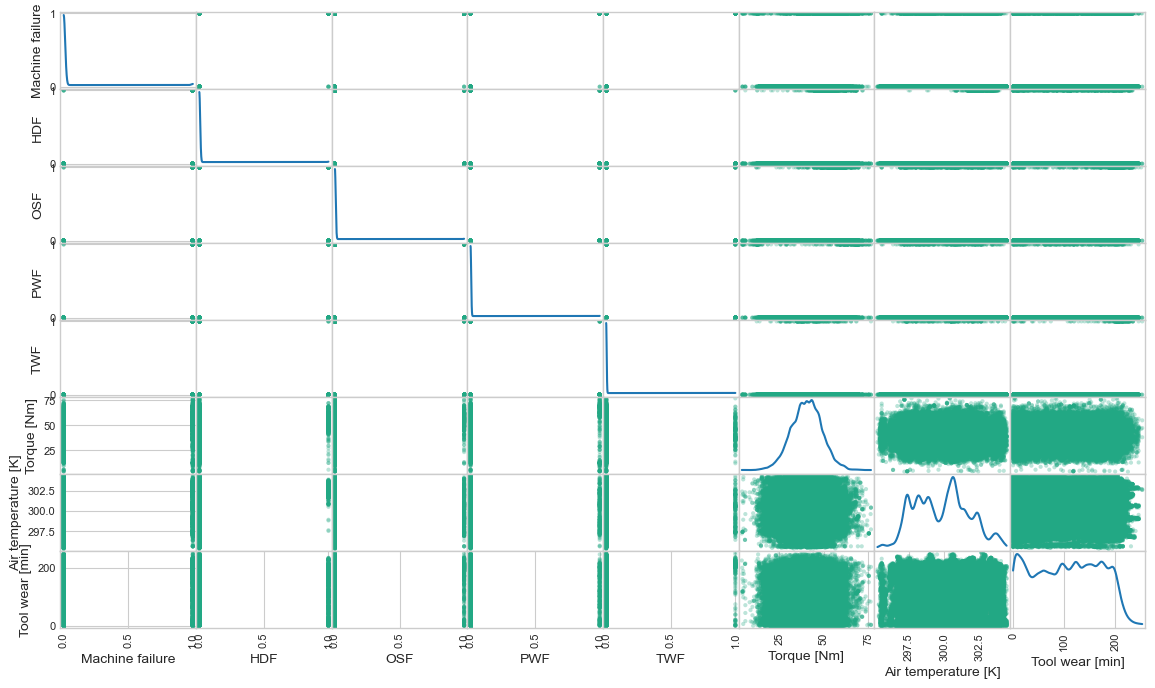

In [60]:
attributes = good_machine_corr.index
scatter_matrix(df_eda[attributes], figsize=(14, 8),
               alpha=0.3, color=plt.cm.viridis(0.6), diagonal='kde')
plt.show()

### **Insights**
- We can see the correlation between the attibutes and target attribute(machine failure)
- HDF, OSF, PWF, TWF, Torque have a notable correlation with machine failure and rest are not that correlated.

### **Required Actions**
- We may remove feature with less and negative correlation or remove  them after checking feature importances.

## Relation of Product `Type` with `Machine failure`

In [63]:
failure_by_type = df_eda.groupby('Type')['Machine failure'].sum()

In [64]:
failure_by_type


Type
H     116
L    1595
M     437
Name: Machine failure, dtype: int64

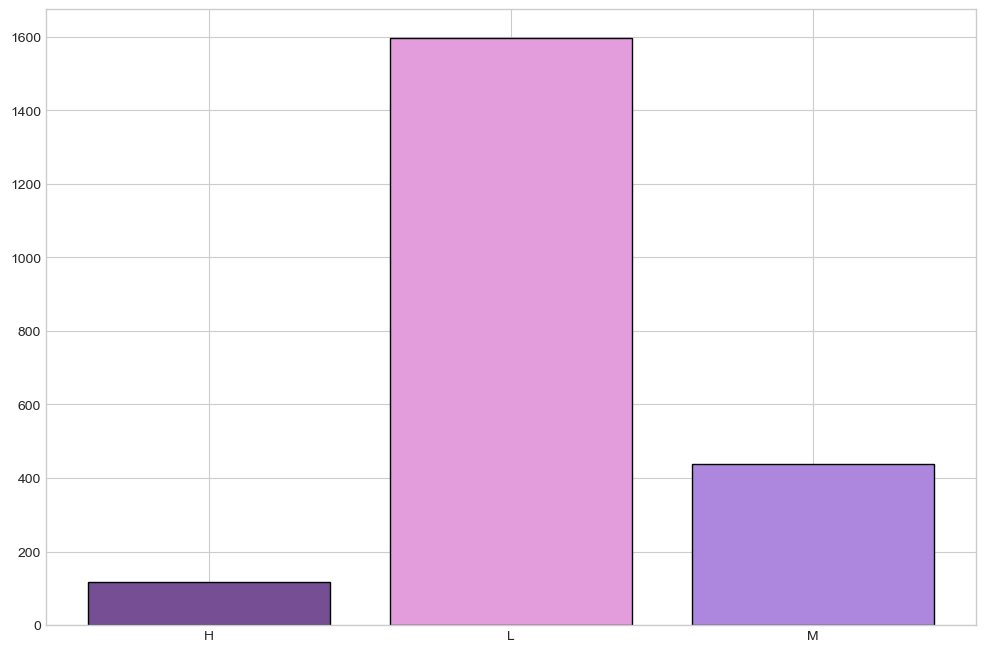

In [65]:
plt.figure(figsize = (12,8))
plt.bar(failure_by_type.index, failure_by_type.values, color = colors, edgecolor = 'black')
plt.show()

### **Insights**
- We can see that lower the product quality higher the machine failure chances and higher the product quality lower the chances of a machine failure.
- We can say that the categories in `Type` are ordinal.

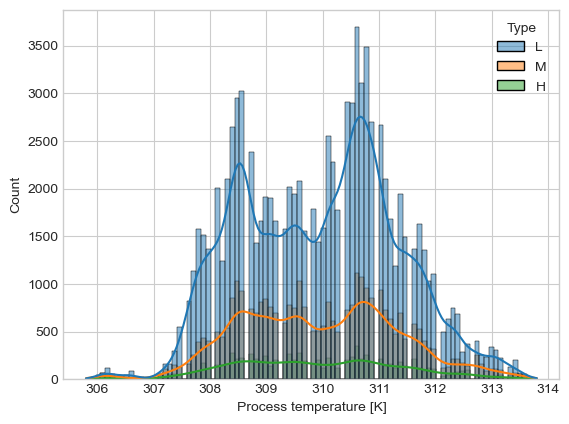

In [67]:
sns.histplot(data=df_eda, x='Process temperature [K]', hue='Type', kde=True)
plt.show()

#**Feature Engineering**

## **Handling missing values**

In [70]:
import pandas as pd

def missing_percentage(data: pd.DataFrame | pd.Series) -> pd.Series | float:
    """
    Computes the percentage of missing values for each column in a DataFrame or for a single column.

    Parameters:
    data (pd.DataFrame or pd.Series): The input DataFrame or a single column (Series).

    Returns:
    - If a DataFrame is passed: A Series with column names as index and missing percentage as values, sorted in descending order.
    - If a single column (Series) is passed: A float representing the missing percentage.
    """
    if isinstance(data, pd.DataFrame):
        return (data.isnull().sum() / len(data) * 100).round(2).sort_values(ascending=False)

    elif isinstance(data, pd.Series):
        return round(data.isnull().sum() / len(data) * 100, 2)

    else:
        raise ValueError("Input must be a pandas DataFrame or Series.")


In [71]:
missing_percentage(df_eda)

Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
dtype: float64

### **Insights**
- We have no missing values but still we will impute in pipeline to avoid misssing values in future incoming instances.

## **Feature creation**

- Creating new feature attributes / Metrics
  - **Failure count**= HDF + OSF + PWF + TWF + RNF ( all are binary)
  - **Temperature Difference** = Process temperature [k] - Air temperature [K]
  - **Speed-Torque Interaction** = Rotational speed [rpm] * Torque [Nm]
  - **Wear Rate** = Tool wear [min]/(Rotational speed [rpm] + 1) , adding 1 to avoid division by zero
  - **Thermal Efficiency** = Process temperature [K] / Air temperature [K]


- We are creating test features in df_eda to first check the correlation and only usefull features into steel_x

In [75]:
df_eda['Temperature Difference'] = df_eda['Process temperature [K]'] - df_eda['Air temperature [K]']
df_eda['Speed-Torque Interaction'] = df_eda['Rotational speed [rpm]'] * df_eda['Torque [Nm]']
df_eda['Wear Rate by rpm'] = df_eda['Tool wear [min]'] / (df_eda['Rotational speed [rpm]'] + 1)  # Avoid division by zero
df_eda['Failure Counts'] = df_eda[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)
df_eda['Thermal Efficiency'] = df_eda['Process temperature [K]'] / df_eda['Air temperature [K]']


In [76]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Product ID                136429 non-null  object 
 1   Type                      136429 non-null  object 
 2   Air temperature [K]       136429 non-null  float64
 3   Process temperature [K]   136429 non-null  float64
 4   Rotational speed [rpm]    136429 non-null  int64  
 5   Torque [Nm]               136429 non-null  float64
 6   Tool wear [min]           136429 non-null  int64  
 7   Machine failure           136429 non-null  int64  
 8   TWF                       136429 non-null  int64  
 9   HDF                       136429 non-null  int64  
 10  PWF                       136429 non-null  int64  
 11  OSF                       136429 non-null  int64  
 12  RNF                       136429 non-null  int64  
 13  Temperature Difference    136429 non-null  f

### **Checking correlation of new features with target attribute**

In [78]:
# Compute the correlation matrix
corr_full = df_eda.corr(numeric_only=True)

# get the  correlation values for the column 'Machine failure'
corr_machine = corr_full['Machine failure'].sort_values(ascending=False)
corr_machine

Machine failure             1.000000
Failure Counts              0.783519
HDF                         0.564507
OSF                         0.494668
PWF                         0.383941
TWF                         0.311919
Torque [Nm]                 0.145793
Speed-Torque Interaction    0.128222
Wear Rate by rpm            0.072074
Air temperature [K]         0.067744
Tool wear [min]             0.056448
Process temperature [K]     0.030966
RNF                         0.001428
Rotational speed [rpm]     -0.060868
Temperature Difference     -0.084536
Thermal Efficiency         -0.084591
Name: Machine failure, dtype: float64

### **Insights**
- Failure Counts is highly correlated to target attribute.
- We got some better correlated features like Speed-Torque Interation and Wear Rate by rpm.
- but Temperature Difference and Thermal Efficiency are not worth adding.

## **Encoding categorical columns**
- We only have one categorical column `Type`.
- We will use ordinal encoder as we have heirarchial categories(we know that machine failures are higher for lower type of product quality and so on).

In [81]:
df_eda['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

- Lets test on df_eda we will use it on main training set  later in preprocessing

In [83]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for the ordinal encoding
order = [['L', 'M', 'H']]  # Note: This should be a list of lists
encoder = OrdinalEncoder(categories=order)

# Apply ordinal encoding to the 'Type' column
encoded_data = encoder.fit_transform(df_eda[['Type']])  # Make sure to pass a 2D array (DataFrame or reshaped array)

# If you want to add the encoded data back to the dataframe
df_eda['Type_encoded'] = encoded_data


In [84]:
df_eda[['Type', 'Type_encoded']]

Type  Type_encoded
0         L           0.0
1         M           1.0
2         L           0.0
3         L           0.0
4         M           1.0
...     ...           ...
136424    M           1.0
136425    H           2.0
136426    L           0.0
136427    L           0.0
136428    L           0.0

[136429 rows x 2 columns]

## **Feature Normalization**
- We will apply transformation on skewed attibute `Rotational speed [rpm]`.
- `Air temperature [k]` ,`'Process temperature [K]'` are multimodal and transformation wont work . Also air temperature is not highly correlated so rbf kernel similarity feature based on each modes would not be usefull as well.
- `'Torque [Nm]'` is already gaussian distribution.
- `'Tool wear [min]'` is also uniform.
- `'TWF', 'HDF', 'PWF', 'OSF', 'RNF',` are all binary and dont need normalization.
      

In [86]:
df_eda.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Temperature Difference', 'Speed-Torque Interaction',
       'Wear Rate by rpm', 'Failure Counts', 'Thermal Efficiency',
       'Type_encoded'],
      dtype='object')

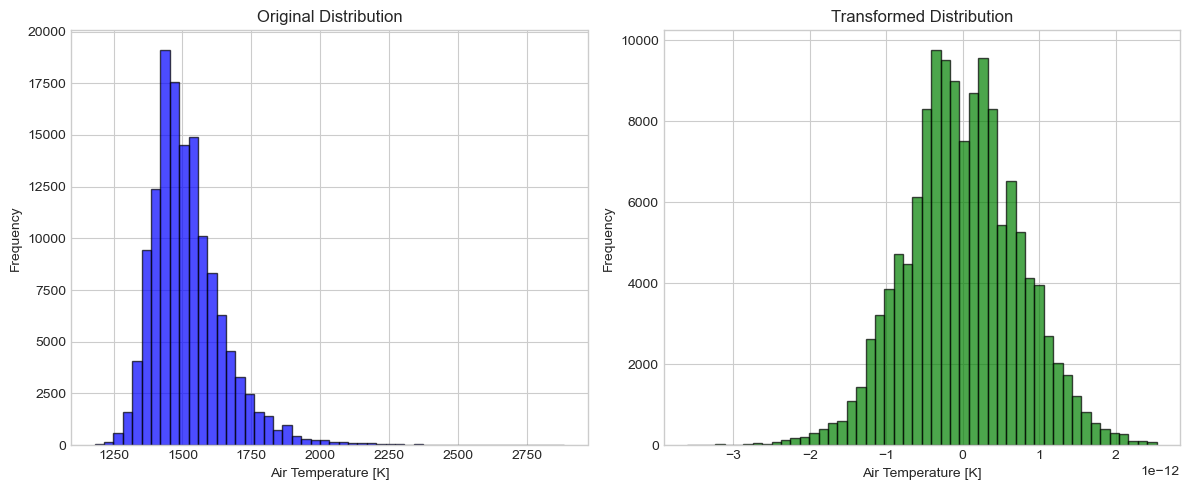

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Define figure and axes

# Original distribution
axes[0].hist(df_eda['Rotational speed [rpm]'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Air Temperature [K]')
axes[0].set_ylabel('Frequency')

# Log-transformed distribution
# Box-Cox (only for positive values)
pt_boxcox = PowerTransformer(method='yeo-johnson')

axes[1].hist(pt_boxcox.fit_transform(df_eda[['Rotational speed [rpm]']]),bins = 50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Transformed Distribution')
axes[1].set_xlabel('Air Temperature [K]')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


In [88]:
df_eda.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Temperature Difference', 'Speed-Torque Interaction',
       'Wear Rate by rpm', 'Failure Counts', 'Thermal Efficiency',
       'Type_encoded'],
      dtype='object')

## **Feature Scaling**
- We will scale all numerical columns excpet the binary ones using `StandardScaler`
- Lets see the sample result on one column and we will scale required attributes in the pipeline.

In [90]:
from sklearn.preprocessing import StandardScaler


In [91]:
df_eda.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Temperature Difference', 'Speed-Torque Interaction',
       'Wear Rate by rpm', 'Failure Counts', 'Thermal Efficiency',
       'Type_encoded'],
      dtype='object')

In [92]:
scaler = StandardScaler()

df_eda['scaled Air temp'] = scaler.fit_transform(df_eda[['Air temperature [K]']])
df_eda[['scaled Air temp', 'Air temperature [K]']]

scaled Air temp  Air temperature [K]
0              0.395880                300.6
1              1.469856                302.6
2             -0.302204                299.3
3              0.610675                301.0
4             -1.000288                298.0
...                 ...                  ...
136424         0.127386                300.1
136425        -1.268781                297.5
136426         0.342182                300.5
136427         0.986567                301.7
136428        -1.590974                296.9

[136429 rows x 2 columns]

## **Creating a dataset for training and predicting**
- We will drop columns id , Product Id as they are unique identifiers and also Machine failure from the training set.
- For prediction set we need only target variable set i.e Machine failure

In [94]:

steel_x = df_train.drop(columns = ['id','Product ID','Machine failure']).copy()
steel_labels = df_train['Machine failure'].copy()

In [95]:
steel_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     136429 non-null  object 
 1   Air temperature [K]      136429 non-null  float64
 2   Process temperature [K]  136429 non-null  float64
 3   Rotational speed [rpm]   136429 non-null  int64  
 4   Torque [Nm]              136429 non-null  float64
 5   Tool wear [min]          136429 non-null  int64  
 6   TWF                      136429 non-null  int64  
 7   HDF                      136429 non-null  int64  
 8   PWF                      136429 non-null  int64  
 9   OSF                      136429 non-null  int64  
 10  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 11.4+ MB


# **Preprocessing Pipeline**
- We will add all preprocessing steps into a pipeline.
- The steps are
    - Filling missing values
    - Transforming attibutes (yeo-johnson for rotational speed)
    - Creating new features
      
      - **Total failures**= HDF + OSF + PWF + TWF + RNF ( all are binary)
      - **Speed Torque** = Rotational speed [rpm] * Torque [Nm]
      - **Wear Rate** = Tool wear [min]/(Rotational speed [rpm] + 1) , adding     1 to avoid division by zero

    - Scaling attributes

In [97]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# ✅ Functions for feature creation
def column_ratio(X):
    """Compute ratio: column1 / (column2 + 1)"""
    return np.divide(X[:, [0]], (X[:, [1]] + 1), out=np.zeros_like(X[:, [0]]), where=(X[:, [1]] != -1))

def column_addition(X):
    """Compute sum of all input columns"""
    return np.sum(X, axis=1).reshape(-1, 1)

def column_multiplication(X):
    """Compute multiplication of two input columns"""
    return np.prod(X, axis=1).reshape(-1, 1)

# ✅ Dynamic feature naming functions
def ratio_name(function_transformer, feature_names_in_):
    return [f"{feature_names_in_[0]}_to_{feature_names_in_[1]}_ratio"]

def addition_name(function_transformer, feature_names_in_):
    return ["_".join(feature_names_in_) + "_sum"]

def multiplication_name(function_transformer, feature_names_in_):
    return ["_".join(feature_names_in_) + "_product"]

# ✅ Feature Engineering Pipelines
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

def addition_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_addition, feature_names_out=addition_name),
        StandardScaler()
    )

def multiplication_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_multiplication, feature_names_out=multiplication_name),
        StandardScaler()
    )

# ✅ Yeo-Johnson transformation pipeline
yeo_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson'),
    StandardScaler()
)

# ✅ Default pipeline for numerical features
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# ✅ Categorical Pipeline with Ordinal Encoding
order = [['L', 'M', 'H']]
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(categories=order)
)

# ✅ ColumnTransformer for preprocessing
preprocessing = ColumnTransformer([

    ("prepared", default_num_pipeline, ['Process temperature [K]','Air temperature [K]','Torque [Nm]',
                                        'Tool wear [min]','TWF','HDF', 'PWF', 'OSF', 'RNF']),
    ("yeo", yeo_pipeline, ['Rotational speed [rpm]']),

    # Feature Engineering
    ("failure", addition_pipeline(), ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
    ("Speed*Torque", multiplication_pipeline(), ['Rotational speed [rpm]', 'Torque [Nm]']),
    ("Wear_rpm", ratio_pipeline(), ['Tool wear [min]', 'Rotational speed [rpm]']),

    ('cat', cat_pipeline, ['Type'])
], remainder=default_num_pipeline)

# ✅ Transform Data and Convert to DataFrame
def transform_to_dataframe(preprocessing, X):
    transformed_array = preprocessing.fit_transform(X)
    transformed_columns = preprocessing.get_feature_names_out()
    return pd.DataFrame(transformed_array, columns=transformed_columns, index=X.index)

# Example Usage:
# steel_x_transformed_df = transform_to_dataframe(preprocessing, steel_x)


In [98]:
steel_x_prepared = transform_to_dataframe(preprocessing, steel_x)

## **Confirming application of preprocessing pipeline**

In [100]:
steel_x_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   prepared__Process temperature [K]                          136429 non-null  float64
 1   prepared__Air temperature [K]                              136429 non-null  float64
 2   prepared__Torque [Nm]                                      136429 non-null  float64
 3   prepared__Tool wear [min]                                  136429 non-null  float64
 4   prepared__TWF                                              136429 non-null  float64
 5   prepared__HDF                                              136429 non-null  float64
 6   prepared__PWF                                              136429 non-null  float64
 7   prepared__OSF                                              136429 non-null  float64

In [101]:
steel_x.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count        136429.000000            136429.000000           136429.000000   
mean            299.862776               309.941070             1520.331110   
std               1.862247                 1.385173              138.736632   
min             295.300000               305.800000             1181.000000   
25%             298.300000               308.700000             1432.000000   
50%             300.000000               310.000000             1493.000000   
75%             301.200000               310.900000             1580.000000   
max             304.400000               313.800000             2886.000000   

         Torque [Nm]  Tool wear [min]            TWF            HDF  \
count  136429.000000    136429.000000  136429.000000  136429.000000   
mean       40.348643       104.408901       0.001554       0.005160   
std         8.502229        63.965040       0.039389       0.071649   
min         3.800000         0.000000       0.000000       0.000000   
25%        34.600000        48.000000       0.000000       0.000000   
50%        40.400000       106.000000       0.000000       0.000000   
75%        46.100000       159.000000       0.000000       0.000000   
max        76.600000       253.000000       1.000000       1.000000   

                 PWF            OSF            RNF  
count  136429.000000  136429.000000  136429.000000  
mean        0.002397       0.003958       0.002258  
std         0.048899       0.062789       0.047461  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000

In [102]:
steel_x_prepared.describe()

prepared__Process temperature [K]  prepared__Air temperature [K]  \
count                       1.364290e+05                   1.364290e+05   
mean                        1.078295e-15                   7.235579e-15   
std                         1.000004e+00                   1.000004e+00   
min                        -2.989580e+00                  -2.450154e+00   
25%                        -8.959711e-01                  -8.391913e-01   
50%                         4.254325e-02                   7.368772e-02   
75%                         6.922839e-01                   7.180729e-01   
max                         2.785893e+00                   2.436433e+00   

       prepared__Torque [Nm]  prepared__Tool wear [min]  prepared__TWF  \
count           1.364290e+05               1.364290e+05   1.364290e+05   
mean            5.414393e-16               3.869656e-17  -1.947848e-17   
std             1.000004e+00               1.000004e+00   1.000004e+00   
min            -4.298729e+00              -1.632287e+00  -3.945048e-02   
25%            -6.761361e-01              -8.818740e-01  -3.945048e-02   
50%             6.040426e-03               2.487460e-02  -3.945048e-02   
75%             6.764553e-01               8.534552e-01  -3.945048e-02   
max             4.263763e+00               2.323013e+00   2.534824e+01   

       prepared__HDF  prepared__PWF  prepared__OSF  prepared__RNF  \
count   1.364290e+05   1.364290e+05   1.364290e+05   1.364290e+05   
mean   -2.015554e-17   3.192596e-17  -4.479009e-17   1.343703e-17   
std     1.000004e+00   1.000004e+00   1.000004e+00   1.000004e+00   
min    -7.202055e-02  -4.901642e-02  -6.303833e-02  -4.756777e-02   
25%    -7.202055e-02  -4.901642e-02  -6.303833e-02  -4.756777e-02   
50%    -7.202055e-02  -4.901642e-02  -6.303833e-02  -4.756777e-02   
75%    -7.202055e-02  -4.901642e-02  -6.303833e-02  -4.756777e-02   
max     1.388493e+01   2.040133e+01   1.586336e+01   2.102264e+01   

       yeo__Rotational speed [rpm]  failure__TWF_HDF_PWF_OSF_RNF_sum  \
count                 1.364290e+05                      1.364290e+05   
mean                 -1.249956e-18                      7.343492e-18   
std                   1.000004e+00                      1.000004e+00   
min                  -4.847823e+00                     -1.170050e-01   
25%                  -6.347753e-01                     -1.170050e-01   
50%                  -3.774270e-02                     -1.170050e-01   
75%                   6.464893e-01                     -1.170050e-01   
max                   3.411190e+00                      2.278526e+01   

       Speed*Torque__Rotational speed [rpm]_Torque [Nm]_product  \
count                                       1.364290e+05          
mean                                        5.940416e-16          
std                                         1.000004e+00          
min                                        -5.727775e+00          
25%                                        -6.530186e-01          
50%                                        -1.741108e-02          
75%                                         6.377001e-01          
max                                         9.697544e+00          

       Wear_rpm__Tool wear [min]_to_Rotational speed [rpm]_ratio  \
count                                       1.364290e+05           
mean                                        2.013471e-16           
std                                         1.000004e+00           
min                                        -1.614053e+00           
25%                                        -8.707074e-01           
50%                                         2.094413e-02           
75%                                         8.273855e-01           
max                                         2.901711e+00           

           cat__Type  
count  136429.000000  
mean        0.366476  
std         0.602480  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.0

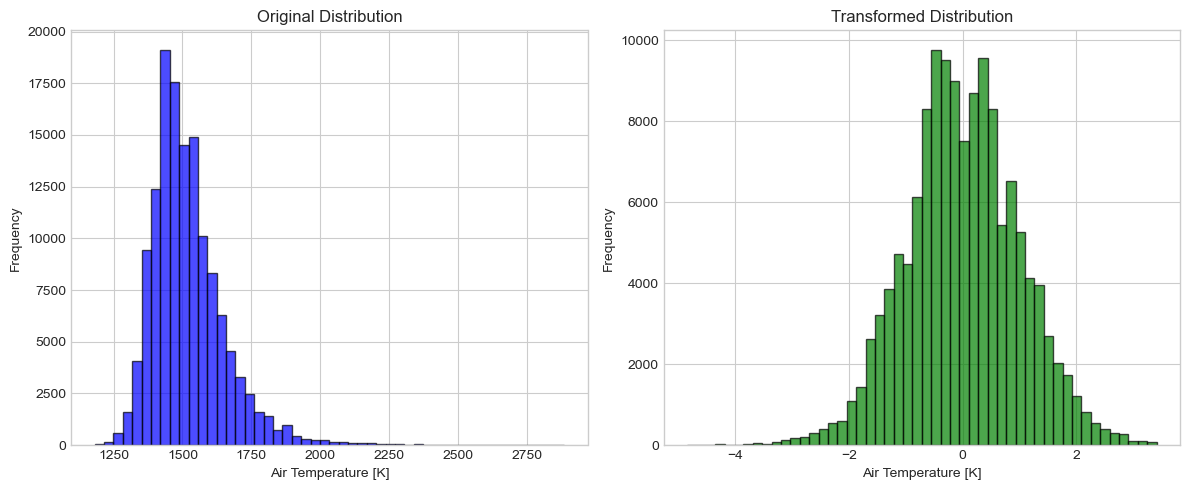

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Define figure and axes

# Original distribution
axes[0].hist(df_eda['Rotational speed [rpm]'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Air Temperature [K]')
axes[0].set_ylabel('Frequency')



axes[1].hist(steel_x_prepared['yeo__Rotational speed [rpm]'],bins = 50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Transformed Distribution')
axes[1].set_xlabel('Air Temperature [K]')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


## **Insights**
- All preprocessing steps seems to be working fine as we can check through statistical discription including standard deviation, mean and new scaled values Scaling step is working fine for all attributes.
- cat_Type is also showing ordinal values (0,1,2).
- yeo- johnson transformation on rotational speed is also working great.
- and also no missing values.

So, our data is ready for machine learning models.

# Model Selection
- We can start with rough evaluation on these classification algorithms
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier
  - Support Vector Classifier
  - Adaboost



## **Logistic Regression**
- Logistic regression is one of the simplest models used for classification.
- It predicts the probability of an instance belonging to a particular class.
  - **Example**: If the threshold is **0.5** and logistic regression predicts a probability of **0.6** for an instance, then since **0.6 > 0.5**, it will be classified as a **positive instance**.
- Like Linear Regression, it also calculates the **weighted sum** of input features (plus a bias term) for a particular instance, but instead of using it directly, it applies a transformation.
- This transformation is done using the **sigmoid function**:

  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

  where $z = wX + b$ (the linear combination of weights and inputs).

- The **sigmoid function** outputs a number between **0 and 1**, representing the probability of the positive class.
- A **threshold** is applied to classify the instance:
  - If **$ \sigma(z) \geq 0.5 $** → Classified as **positive (1)**
  - If **$ \sigma(z) < 0.5 $** → Classified as **negative (0)**
- The **threshold** can be adjusted based on the problem to balance **precision and recall**.


To handle imbalance we can use cost sensitive learning by using class_weights = "balanced' which will give more class weight to positive instances.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('log_reg', LogisticRegression(
        random_state=42,  # Ensures reproducibility
        solver='lbfgs',  # Default solver
        max_iter=200,  # Increases iterations to prevent convergence issues
        C=1.0,  # Regularization strength (default) lower the value higher the regularization
        class_weight = "balanced" # gives more weight to postive instances (imbalanced dataset)
    ))
])
log_reg

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process temperature [K]',
                                                   'Air temperature [K]',
                                                   'Torque [...
                                                                                       func=<function column_ratio at 0x00000278B1EAFF60>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool wear [min]',
                                                   'Rotational speed [rpm]']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['L',
                                                                                               'M',
                                                                                               'H']]))]),
                                                  ['Type'])])),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    random_state=42))])

**We dont want to train the model for now to avoid data leakage as we may want to use cross validation for calculating evaluation metrics**

In [110]:
# log_reg.fit(steel_x, steel_labels)
# log_reg_predictions = log_reg.predict(steel_x)

- Storing the untrained models in a dictionary to use it them later easily.

In [112]:
untrained_models = {}
untrained_models["log_reg"] = log_reg


## **Support Vector Classifier (SVC)**  
- **Performs large margin classification** by finding the optimal decision boundary that maximizes the margin between classes.  
- Can work with **linear and non-linear decision boundaries** using **kernel tricks** (e.g., linear, polynomial, RBF).  
- Uses **stochastic gradient descent (SGD)** or **quadratic programming solvers** to optimize the classification boundary.  
- **Hinge loss function** is used for optimization:  

  $$  
  L = \sum_{i=1}^{n} \max(0, 1 - y_i (w^T x_i + b))  
  $$  

  - If an instance is correctly classified and far from the boundary, \( L = 0 \).  
  - If it is close to or misclassified, the loss is proportional to how much it violates the margin.  

- **Key hyperparameters:**  
  - **\( C \) (Regularization):** Controls the tradeoff between margin size and misclassification tolerance.  
  - **Kernel:** Defines the transformation of input space (linear, poly, RBF, sigmoid).  
  - **Max Iterations:** Number of updates to optimize weights.  

- Works well for **high-dimensional data** and is **robust to outliers** with proper tuning. 🚀  


In [114]:
from sklearn.svm import SVC

svc = Pipeline([
    ('preprocessing', preprocessing),
    ('svc', SVC(kernel="rbf", C=1.0,
                gamma="scale", random_state=42,
                class_weight = 'balanced' # to handle imbalance
                ))
])
svc


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process temperature [K]',
                                                   'Air temperature [K]',
                                                   'Torque [...
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x00000278AFB64720>,
                                                                                       func=<function column_ratio at 0x00000278B1EAFF60>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool wear [min]',
                                                   'Rotational speed [rpm]']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['L',
                                                                                               'M',
                                                                                               'H']]))]),
                                                  ['Type'])])),
                ('svc', SVC(class_weight='balanced', random_state=42))])

**We dont want to train the model for now to avoid data leakage as we may want to use cross validation for calculating evaluation metrics**

In [116]:
# svc.fit(steel_x, steel_labels)
# svc_predictions = svc.predict(steel_x)

In [117]:
untrained_models["svc"] = svc

## **Decision Tree Classifier (DTC)**  
- A **non-parametric** model that makes decisions by **splitting data** into branches based on feature values.  
- Works by recursively **partitioning** the dataset into **homogeneous subsets**.  
- Uses **Gini impurity** or **entropy** to determine the best splits.  

### **Splitting Criteria**  
The model selects the best split using:  
- **Gini Impurity** (default):  
  $$ G = 1 - \sum p_i^2 $$  
- **Entropy** (Information Gain):  
  $$ H = -\sum p_i \log_2(p_i) $$  
  where \( p_i \) is the proportion of class \( i \) in a node.  

### **Key Hyperparameters**  
- **`criterion`** → `"gini"` (default) or `"entropy"`  
- **`max_depth`** → Limits tree depth to prevent overfitting  
- **`min_samples_split`** → Minimum samples required to split a node  
- **`min_samples_leaf`** → Minimum samples in a leaf node  
- **`max_features`** → Number of features considered at each split  

### **Pros & Cons**  
✔ **Interpretable** → Easy to visualize & understand  
✔ **Handles non-linearity** → No need for feature scaling  
✔ **Works with categorical & numerical data**  

✘ **Prone to overfitting** → Needs pruning or depth restriction  
✘ **Not robust to noise** → Small changes in data can affect splits  

Works well for structured/tabular data but needs **regularization** to avoid overfitting.  


**To avoid overfitting we can use some reasonable parameters**

In [120]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = Pipeline([
    ('preprocessing', preprocessing),
    ('DecisionTree', DecisionTreeClassifier(
        criterion="gini",          # Default: "gini" (use "entropy" for Information Gain)
        max_depth=10,              # Default: None (tree grows until all leaves are pure)
        min_samples_split=5,       # Default: 2 (minimum samples required to split an internal node)
        min_samples_leaf=2,        # Default: 1 (minimum samples required in a leaf node)
        random_state=42,            # Ensures reproducibility (Default: None)
        class_weight = 'balanced'  # handles imbalance in classes
    ))
])
tree_clf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process temperature [K]',
                                                   'Air temperature [K]',
                                                   'Torque [...
                                                                   StandardScaler())]),
                                                  ['Tool wear [min]',
                                                   'Rotational speed [rpm]']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['L',
                                                                                               'M',
                                                                                               'H']]))]),
                                                  ['Type'])])),
                ('DecisionTree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, min_samples_split=5,
                                        random_state=42))])

In [121]:
# tree_clf.fit(steel_x, steel_labels)
# tree_clf_predictions = tree_clf.predict(steel_x)


In [122]:
untrained_models["tree_clf"] = tree_clf

## **Random Forest Classifier (RFC)**  
- An **ensemble learning method** that builds **multiple decision trees** and combines their predictions.  
- Reduces **overfitting** by averaging multiple models (**bagging**).  
- Uses **random feature selection** at each split, increasing diversity among trees.  

### **How It Works?**  
1. **Bootstrap Sampling** → Each tree is trained on a random subset of the data (sampling with replacement).  
2. **Feature Randomization** → At each split, only a random subset of features is considered.  
3. **Majority Voting (Classification)** or **Averaging (Regression)** → The final prediction is an aggregate of all trees.  

### **Splitting Criteria (Same as Decision Tree)**  
- **Gini Impurity** (default):  
  $$ G = 1 - \sum p_i^2 $$  
- **Entropy (Information Gain):**  
  $$ H = -\sum p_i \log_2(p_i) $$  

### **Key Hyperparameters**  
- **`n_estimators`** → Number of decision trees in the forest (default = 100).  
- **`max_depth`** → Maximum depth of each tree (limits overfitting).  
- **`max_features`** → Number of features considered per split (default = `"sqrt"`).  
- **`min_samples_split`** → Minimum samples required to split a node.  
- **`min_samples_leaf`** → Minimum samples in a leaf node.  
- **`bootstrap`** → Whether to sample data with replacement (default = `True`).  

### **Pros & Cons**  
✔ **More accurate & stable** than a single Decision Tree.  
✔ **Handles large datasets well** & **works for both classification & regression**.  
✔ **Less prone to overfitting** due to averaging across trees.  

✘ **Computationally expensive** (slower than a single tree).  
✘ **Less interpretable** than a single Decision Tree.  

Best for structured/tabular data and is often a **strong baseline model**.  


In [124]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = Pipeline([
    ('preprocessing', preprocessing),
    ('RandomForest', RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                            class_weight = 'balanced',random_state=42))
])
rnd_clf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process temperature [K]',
                                                   'Air temperature [K]',
                                                   'Torque [...
                                                                                       func=<function column_ratio at 0x00000278B1EAFF60>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool wear [min]',
                                                   'Rotational speed [rpm]']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['L',
                                                                                               'M',
                                                                                               'H']]))]),
                                                  ['Type'])])),
                ('RandomForest',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=500, n_jobs=-1,
                                        random_state=42))])

In [125]:
# rnd_clf.fit(steel_x, steel_labels)
# rnd_clf_predictions = rnd_clf.predict(steel_x)


In [126]:
untrained_models["rnd_clf"] = rnd_clf

## **Balanced Random Forest Classifier**
- We use balanced random forest classifier from imbalanced learn when the imabalance in the classes is higher.
- It can be used as BalancedRanfomForestClassifier()
- is uses undersampling methods for each tree in the ensemble.

In [128]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = Pipeline([
    ('Preprocessing', preprocessing),
    ("BalancedRF", BalancedRandomForestClassifier(
    n_estimators=200, random_state=42,
    sampling_strategy="all", replacement=True,
    bootstrap=False)
)])
brf

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process temperature [K]',
                                                   'Air temperature [K]',
                                                   'Torque [...
                                                                   StandardScaler())]),
                                                  ['Tool wear [min]',
                                                   'Rotational speed [rpm]']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['L',
                                                                                               'M',
                                                                                               'H']]))]),
                                                  ['Type'])])),
                ('BalancedRF',
                 BalancedRandomForestClassifier(bootstrap=False,
                                                n_estimators=200,
                                                random_state=42,
                                                replacement=True,
                                                sampling_strategy='all'))])

In [129]:
# brf.fit(steel_x, steel_labels)
# y_pred = brf.predict(steel_x)

In [130]:
untrained_models["brf"] = brf

## **Boosting using XGBoost**  
- **XGBoost (Extreme Gradient Boosting)** is a powerful ensemble learning algorithm based on **gradient boosting**.  
- It builds multiple **weak learners (decision trees)** sequentially, improving each step by correcting previous errors.  
- Uses **gradient descent** to minimize a loss function.  

### **Objective Function**  
The objective function combines **loss function** and **regularization** to prevent overfitting:  

$$
Obj = \sum L(y_i, \hat{y}_i) + \sum \Omega(f_t)
$$

where:  
- $L(y_i, \hat{y}_i)$ is the loss function (e.g., logistic loss for classification).  
- $\Omega(f_t)$ is the regularization term controlling model complexity.  

### **Key Hyperparameters**  
- **`learning_rate`** → Step size for each iteration (default: $0.3$).  
- **`lambda`** ($\lambda$) → L2 regularization (default: $1$).  
- **`alpha`** ($\alpha$) → L1 regularization (default: $0$).  

### **Key Hyperparameters**  
- **`n_estimators`** → Number of boosting rounds (trees).  
- **`learning_rate`** → Step size for each iteration (default: \( 0.3 \)).  
- **`max_depth`** → Maximum depth of each tree.  
- **`subsample`** → Fraction of data used per boosting round.  
- **`colsample_bytree`** → Fraction of features considered for each tree.  
- **`lambda`** $( \lambda )$ → L2 regularization (default: 1 ).  
- **`alpha`** $( \alpha)$ → L1 regularization (default 0 ).  

### **Pros & Cons**  
✔ **Faster than traditional gradient boosting** due to parallelization.  
✔ **Works well with large datasets** and **handles missing values efficiently**.  
✔ **Supports early stopping** → Stops training when performance stops improving.  

✘ **Can be computationally expensive** for very large datasets.  
✘ **Requires careful tuning** to balance overfitting and performance.  

Best used for **structured/tabular data**.  


In [132]:
!pip install xgboost --quiet


- **We require version 2.1.4 of xgboost**

In [134]:
import xgboost
import sklearn

print(f"xgboost: {xgboost.__version__}")
print(f"scikit-learn: {sklearn.__version__}")


xgboost: 2.1.4
scikit-learn: 1.5.1


In [135]:
from xgboost import XGBClassifier

xgb_clf = Pipeline([
    ("Preprocessing", preprocessing),
    ("XGBoost", XGBClassifier(
        n_estimators=500,        # Number of boosting rounds (trees) (Default: 100)
        learning_rate=0.1,       # Step size shrinkage to prevent overfitting (Default: 0.3)
        max_depth=6,             # Maximum depth of each tree (Default: 6)
        random_state=42,          # Ensures reproducibility (Default: None)
        eval_metrics = 'logloss',
        scale_pos_weight = 56    # set weight = number of negative instances/ positive instances for handlin imbalance
    ))
])


In [136]:

# xgb_clf.fit(steel_x, steel_labels)
# xgb_clf_predictions = xgb_clf.predict(steel_x)


In [137]:
untrained_models['xgb_clf'] = xgb_clf

In [138]:
list(untrained_models)

['log_reg', 'svc', 'tree_clf', 'rnd_clf', 'brf', 'xgb_clf']

## Dummy classifier

In [140]:
from sklearn.dummy import DummyClassifier

dummy_clf = Pipeline(
    [('preprocessing', preprocessing),
     ('dummyclassifier', DummyClassifier())]
)

In [141]:
# dummy_clf.fit(steel_x, steel_labels)
# dummy_clf_predictions = dummy_clf.predict(steel_x)


In [142]:
untrained_models["dummy_clf"] = dummy_clf

# **Model Evaluation**

## **Accuracy using cross validation**
- Not usefull in our case of highly skewed/imbalanced dataset so we wont use this as a valid evaluation critieria.
- It will be misleading.

❌ **Takes a long while to run**

In [146]:
'''
import pandas as pd
from sklearn.model_selection import cross_val_score

cross_score = {}

# Perform cross-validation
for name, model in untrained_models.items():
    scores = cross_val_score(model, steel_x, steel_labels, cv=3, scoring='accuracy')
    cross_score[name] = {
        "Mean Accuracy": scores.mean(),
        "Standard Deviation": scores.std(),
        "All Scores": scores  # Store all scores for reference
    }

'''

'\nimport pandas as pd\nfrom sklearn.model_selection import cross_val_score\n\ncross_score = {}\n\n# Perform cross-validation\nfor name, model in untrained_models.items():\n    scores = cross_val_score(model, steel_x, steel_labels, cv=3, scoring=\'accuracy\')\n    cross_score[name] = {\n        "Mean Accuracy": scores.mean(),\n        "Standard Deviation": scores.std(),\n        "All Scores": scores  # Store all scores for reference\n    }\n\n'

In [147]:
# cross_score

**Load the scores from stored location**

In [149]:
cross_score = {'log_reg': {'Mean Accuracy': 0.9850471994638325,
  'Standard Deviation': 0.0039138705882009765,
  'All Scores': ([0.98067155, 0.98429941, 0.99017064])},
 'svc': {'Mean Accuracy': 0.9771969517055936,
  'Standard Deviation': 0.0020942601006296033,
  'All Scores': ([0.97427271, 0.97906588, 0.97825226])},
 'tree_clf': {'Mean Accuracy': 0.9660262520114812,
  'Standard Deviation': 0.004298544033561345,
  'All Scores': ([0.97049058, 0.9673674 , 0.96022078])},
 'rnd_clf': {'Mean Accuracy': 0.9959832577775627,
  'Standard Deviation': 0.0001919996508586521,
  'All Scores': ([0.99610792, 0.99612983, 0.99571202])},
 'brf': {'Mean Accuracy': 0.9714943403205246,
  'Standard Deviation': 0.0011129575737191973,
  'All Scores': ([0.97013875, 0.97286481, 0.97147946])},
 'xgb_clf': {'Mean Accuracy': 0.9944000192564678,
  'Standard Deviation': 0.00016086338906674165,
  'All Scores': ([0.99417288, 0.99452458, 0.99450259])},
 'dummy_clf': {'Mean Accuracy': 0.9842555468395223,
  'Standard Deviation': 1.6320471441882892e-07,
  'All Scores': ([0.98425578, 0.98425543, 0.98425543])}}

In [150]:

# Create a new dictionary with rounded values to avoid modifying the original data structure
rounded_cross_score = {
    name: {
        "Mean Accuracy": round(values["Mean Accuracy"], 6),
        "Standard Deviation": round(values["Standard Deviation"], 6),
        "All Scores": [round(x, 6) for x in values["All Scores"]]  # Round list separately
    }
    for name, values in cross_score.items()
}

# Convert to DataFrame
cv_results_df = pd.DataFrame(rounded_cross_score).T

# Display DataFrame
cv_results_df


Mean Accuracy Standard Deviation                      All Scores
log_reg        0.985047           0.003914  [0.980672, 0.984299, 0.990171]
svc            0.977197           0.002094  [0.974273, 0.979066, 0.978252]
tree_clf       0.966026           0.004299  [0.970491, 0.967367, 0.960221]
rnd_clf        0.995983           0.000192   [0.996108, 0.99613, 0.995712]
brf            0.971494           0.001113  [0.970139, 0.972865, 0.971479]
xgb_clf          0.9944           0.000161  [0.994173, 0.994525, 0.994503]
dummy_clf      0.984256                0.0  [0.984256, 0.984255, 0.984255]

### **Insights**
- Although accuracy is misleading due to high class imbalance if we ignore that part then xgboost and random forest have highest accuracy.

## **Making predictions using cross validation for model evaluation metrics**
- we use cross validation on untrained models to avoid data leakage and better evaluation.

❌ Can take a while to run

In [156]:
'''
from sklearn.model_selection import cross_val_predict

# Create an empty dictionary to store predictions
model_predictions = {}

# Generate predictions for each model
for name, model in untrained_models.items():
    model_predictions[name] = cross_val_predict(model, steel_x, steel_labels, cv = 3)
'''

'\nfrom sklearn.model_selection import cross_val_predict\n\n# Create an empty dictionary to store predictions\nmodel_predictions = {}\n\n# Generate predictions for each model\nfor name, model in untrained_models.items():\n    model_predictions[name] = cross_val_predict(model, steel_x, steel_labels, cv = 3)\n'

In [158]:
# model_predictions

**Converting the predictions in a compressed string format and saving so we dont have to run cross val for accuracy in case notebook kernel disconnects.**

In [167]:
"""
import pickle
import base64
import zlib

# Compress, encode, and convert to a string
compressed_data = base64.b64encode(zlib.compress(pickle.dumps(model_predictions))).decode()

# Print the compressed string (copy and paste this into a new cell)
print(f"compressed_predictions = '''{compressed_data}'''")
"""

'\nimport pickle\nimport base64\nimport zlib\n\n# Compress, encode, and convert to a string\ncompressed_data = base64.b64encode(zlib.compress(pickle.dumps(model_predictions))).decode()\n\n# Print the compressed string (copy and paste this into a new cell)\nprint(f"compressed_predictions = \'\'\'{compressed_data}\'\'\'")\n'

In [169]:
# @title Stored predictions as string
compressed_predictions = '''eJzs3cvONFt2nefaFAlagBoUQF+CAcINtd1Qi+6xADZ4A4JYKmsLoEihVDTAhgF3CJpAdQz9vAZeHa/B5qdUov7MHZkZh7XWHGPM92moWKq9v5yniIzDisj/+3f/4f/92c3/9e2PfvP7f/FX//Hf/eqX//Hbb/7nv/zr//xf/ubf/OKvfvXLf/Of//ovfv2f/v2vfvXv/+bbb/7VP//Pv/irv/yvv/7VX//i19/+27ff/N5//we//eb3//I/3P6R//bt5z/722//+w9//u3vvv3Ztz/6+Q9/8k9/+Dv//P/z4+/95vf+w6//5r/88uvf+p3/9L99+/v/5/YP/Ivf/PBvv/3pn/7pn/x//+y//z8//9mvv/353//xj//4Bz8DgLsfqgMQQz0yrerrD0//Ofrvzsb8A/Vmb4eu+yf05DpffG/3QP0fVX1/Hf3/hyb6hSvcjp/VPxdr0WcAwAoq3zez4lDJDwDQk8v3kEucd27xoofuc9k9fwD7sV4iA/XNltbftHyQKXVdg4tZz3fgnOc+0BcAwB5Hvy9Uvl+q46j+/L1c4jzL/XjUNe5n7nmcjd89bzfUe9vVuqTVtTqf6s9/phbPaDzPD+jhev0217hH+ZQ/+/M5VteB9xEAfbheT1ZDXW5c6uASpwuXeqrGyftZAFRbfZ7fBXUDMBv7mTWoM5Iwz8B+bC9zjKpr9X1M93XOAPpy3W9xH+WalDxGoR5zpNX17PFeWh2Ad6rnvfrzP1GPD71UX0fBWK59c4l7b5wu+YyWkndKHrNQHw30QRN9wfeq56H682fjPe1jdclThVq9Wd+AmVLnKjWvdKp9433iWCllvtzyqH4us/rzMQZ9AuabtZ2x/d50rQPvWQTgJmU/o7L/VamnShxHETewH3NXi/qvQZ1xxuz3VgAA4IjvNXTE3M+hdrxNn2uoXz9nLrCHyu8rsp54ravv16A/c1T/7ibvEQOAR+zngP3Uthe1eNxRz0xpfU3Lpwp1hJOu8+r+vLR6fCqo0xzpdU3P76i0+7H011P1e1TUuce/CuuKHqXkMVp6XVTzU43rrJR81PNQj08d68t6o98a6AO+lzYPKvmoxDEb19Xm6po3HvG7G6hw9XkE5jULz6egs6vzXL09VH8+1qDP+1Tf9686XuI+9TaV9zzP/ntufXOLdzbqUav6ewMA0rEfvMbtfAKPqGsNtpue6AeAs0Zfz2V/lIE+aqM/nuibpu59YZ3UMd3zB77Hem/M0G2eZuXLeT0cuc6d2/H03uuA1XG+ohrXaGp5qsVzlHv8V6nnn/Z8nlr8avGo67LOouu6/VWoy7budVFZp1/VB5X+q8RxpxZPFergjf6tRb0fUY+xqOc+1Om91PpU58V9v7HU6qEWz93ouVPNE4COLvuJLnl2QT9vUuqQkkcX9OuRaj3U718BVzC3a1DnG+qAFVznbHXcKnVSieNOLZ5n6vEBwChHfydg1N/FHF2eawBwHNstFDGXmMntPQ6vqMalJrVOqXkd5V6H1e+Hcq+XK/rhgX7UYB2QF7fnOdTjS0f9e6Hfc1Ffbd370z1/FW7HaauorGegH1Cg+p761dziTdF1XXY66pyBPt5030+pxQNPKudfbp+PtVTe341t1A/Ik7JOF2Oo9bfbfLrHX436nUPdMqn1VS0edV3qVZ1n1XWy6rwxB30F+nG93wJtzIe2Lv3pkuedSr4qceAa+oiZWEcxB8f1UMA8ZVHtp2pcV6XmdZeen5pu61OQwXUOXeNOM6oP3Z/zwjWpv7/gun3hJrXu1XlVf366s+8HpS9YgTnDSOrzpB6fqqrrcrN+3w9ZmAOgnst2OOt8i/dRaqBe2ugPgGdd9gtd8gS+MO/APPy+R62qeqX8/mT36yYqcarEAVTquj9ye/+Wej2BI5jnfdLrpJafWjyfuMU72+jzROoL6Hq1fbLdaujSh0/rrLrUoZpKnVXiwD5q/VKLp1paPdLywTWp8+Cel0r8xKGhe/5YgznDFuYCwFHsN7CFuUAHanOuFs9R7vEf1SXfLnlCC3OHkZinXlT6rRLHVSl5YA2Xeen6vFs1t/ebqsWDG7fnNtU+Hx6Yk7moL0ZgjsZyr6da/Pz++FrU7Rzqthb11uLaD9e4Rzv7HLpL/Y7m55LXaqp14X0o17gdZ6u8v079PQlq8QDAXuy/gHpsh2NU17H68wHkYz+Dd2ZfV2b+kEBtjkfdL1HLC72pziPfg/vwu4rHpNzXB4Cuuqy/eEUlDnWsj5rj6vnwD0//WU0lDgDAWuz/MQJz5IE+Aeuob2+j7jeNylO9XnhvVf/U7mcxtx6q3qdYdV+fucSXrnNw9vjEtV5q9wdd63hWt3zd0a9M9FWLaz9c4wbwU67bs0rcKnFAQ/V1f+YRgBr2S8A4aduTSj4qcdypxeNKtY6qcblSr6d6fHvxXoYa1A3AbGn7Gfd83ONHBuYQjmbPrep2oRoXcAbz/MitHm7xdsH7sbZ1y/cot/qoxKsSB7a596fL830p1Oqv+j5xtTqtxnHaXNQNZzA311A/YD22O7zjPh/u8d+l5AHMxHsOx1LLTy0ejKH2njZso15Q1G0uXfJ1ibMadfI26n3XPFfZg2qfVOPCXCrnX8wfvqTMger3eUp98UhtXtznzD1+ZGEee3Lpu9rv0I3mHv9oq58zof77qNWp6ncwVeqgEkcK6gkAc/C8JiqkzEtKHtDEOncAZ7H/WENlXQ0AfS7brUucqV7Vn75gJvf5co9/tlH7Feq8VtffN3Cltk636u+6cq2Ha9zuqHsP3dY38n0zhnq+6vG90m17VKO2f6Cf56x+77xqn1TjAuCH9QFzdckTQB72XzVS6q76PCyA11K205Q8kKXrfQHWcY2VXp8fnv7z6L939XNX/XtYw60/rvFWvW+pivr+ovp7V6VPWIu+Y4W05w/Ybsainl7oF/BbbA9zUNdj0o6zukmtb2peuMZtLnivSg/V12MBZ2wPc3H/B8jRdftzz7s6/urPxzn0zcuo9UNqfed6xjHUxRv9G4t6AmwHKap/n5w5ei/9/WHogfnDO9XfQ4ADt+1A9XlC1HDtk2vcq61+L/IqxDvm86vjAjAf2/kcnCc/evV+l6PHIerrFqCBuTiH91XcqMb1iWvc8MS8nZNSN7c8OC5/r3v+eMQ8APulbC+8B7vG1ethZ/8eMqX3Pz0/VbyHpjeeN8iSVu+0fFKwzhQj0ef3qA+2MBfXUD8AyMJ+/RqV+qnEgZ5c5o/1vvtUxT3rc7lv/F73/D+pWh+iLjUvF9xfAPxxfFKDukKZy7pijo/noj5AvtnHgbz/CslGbz9sFx7oUza192BVfz6uSb3e5hr3K2r5qMWjzq1ebvGqqK5b9efjPa4Pz0FdMALrSObqmjfWqJ6v6s8/q/txSXX81Z+PbfTFi2u/XOO+c49/tb3vccQ+1HGOrnWddV8svZ6j8ku9L4mb6v5Vfz5wBnN7jNvzH9V/H3Nx3Ah8xrwDAL7ndp+a7zFvKv1TiWM19bx5jhLYb/T3N9sTruB4sJe0+qflg2xu8+oW71Gu+aW9lz1F1XvrsY9rHUfH7VqHs7rlO0v37x2VONxVrROjf2twX2AOjgOwpfv3MnAEcwsAXthva1Ppz6rnsLvjeS4AwPdWv0eW3/vBCszFXF3Xt4/Ku0u9ZuG+saa0+n+aM7V81eJ5hfugAIAVUu8zqMXTFX2oQd290K9rqJ8Wrv/hneo+857nba5xQ1O3eeqWL7YxBxp43rAXfvcLCdznzT3+UbrVYdX+tVtdgQ5S7kfPWodZ/e8DCnjv9zVp+aihvjij69x0zRtwkLp9uuSlEqdKHC6oVy3qjwrMHVCP9T8aWG99DO/xmKN7/dznquv7ldS53Jfmewjw47rdsj/oIb3P6fk965avOpV+7D3/4DwlC/3DO7OvMzN/vamtd3Y9H1OTsp3zXDUUpM1TWj5d8X15w3qMsbrnr47+7FN9vpGGem2jLh5e/Y5QWv/S8nnFLU/V37GCFuYDGI/tCiMxT8BnbCdwkn7fmffi3qQ8HwSg73bWNe9R3OvnHr8L6oyVVOdNNa5uOI8DcFbV/mDvOojUdb0qcTxzf48TAKhJ23+6vJfNBfXwQr+QKH2u0/NDBuYUuE71d5/Zvseqrmf158+SmlcV6oktzMV7buscVK+PVtflLNe4q1CvbSl1UctDLR7U6DYH3fJFrdXvrVI9jlX9XIzhdr7njvqtRb01jFp/7v4+SdX7ZAB+iu1sn651Us1bNS54UZuj1e91Vss/jevvRqjGtQrXjbSl7x/Vr8fP/ntApbPX61Spfp+p1q86rurPB0ZQ+13wLlTqkPo7VWr5qMWjhvpoc+2PWtxq8czmen0VXrrNUbd8R6u+ftK1f13zPmrU71Jxfg9gNrb7fdLrVJ1f9eejRvfnGlzjnkX1frqq6vOGs1zinI15P4c6AL7Srq92P469q1r/7F63VC59cYkT59BfVGL+julSL/U81eMDErltd27P1eIa+rEW9a7Vpf5d8qxGnaGAOczE+nGsQN810RcA6djP4Qrmpyf6noV+anLpi0ucQCK2P+wx+/kC1+c4XLafqvq61Oeo1LxmoV7a+D1rKKCfHrr2yTXv1PfWu0g7bub5cOA41+PsNN3qmPb9A3yP/Sq+Rz+xRXUuXO9/jeIaN7Iwh9jiMhcuceIY+golzKO2Wf1Rv87CXD5Ke9+3O+ruhX5hJeYN+IznPLJQX7yzd/0qczRXWn3dzo9V48KNe3+q46/+/LNc44a31LlLzQtwxPaoib6gwuzniZnrR6ybeI/rgnOp1089PjXUCwB6UXkPUPXnj5aWjwv19ejQQr9vqMNc1BdJmGdt9AcYh+0pA328UavD83Uotfhw49IX1iF4qK5n9eenoZ4AsM/o492zf4/9dg+8J2GNrnm7o2+Av27bcWq+6tfxUusOL8yhB/oE6GM7fbSqHtR9Lrf6usULL6Pni3ntgT4DOCr1/uvez0nZb/KcMVAvdTtKzas7+pqN/vaS9rxaSh6zuNfHPX54YM7meq7vp/+uJm39nUocAHAU+y8AgDK+p7Sp9EcljlHS8jmrex3Un4fEGi7X+1TjQhbmrCf63hN9xwhn54j5q0X9oYjzc3zPrW9u8V7VLd9XqIMW1X6oxoVz6KcX+jUW9cQV1fNT/fkA6rEfQEfM/TXUb41XdeZ3b3EE8wH4Yf8+R2o9+f3O97rlu1dKXVzzcI17tC516JIn5mKOaqx+Pzp9Bj5L2U5S8gDwWtV2znUiD+51d4//WZftxjXuVdLqk5bPXu55u8f/TOV3Vd3r6h7/Kt1+fxAZmEeskDpns35HxOV6ziwqcVylchzqpkueaqg7zmBuPNAnLfQDAHqavf/n+6UXt367xXtWWp5p+ZxFHdZwr7N7/F1xX/+a6uPbT++9QTb6DAXMIUZgjjyMXi+8uu9d5qxLnneq+Z59Hko1n1FGPyemss6wC9X6qsalinp5SOtTdT6jjker87hTiaO7bn04e50a51BPKHKZS5c4AQDAdXzvZ6Gfc6x+b3fVv59O9b66alzuVOu/Cu8j2ZaSR3cq66fgjXkBforjh2PS89tLvQ7q8amgTgBUsX+qVf28dxcudVC7HsN19Ufq8Z3lnpd7/MA7KfOt8n0yKw63vwsPbv13ixfb6KMW+oEt6XORnt9o1Msb/etF7bovatH3Hlz67BIncARzDQBwxvcYKlXPX8r7Al3iBEZg3q9RWU816t9PnQe1vEb/3sooanXCDX3prft7gD5RzVslLpU48B598kTfjkmvF+/BxAjMAQCcw/4T4LrxXil5APhs1Hk6+41jqBeAVWbfP2V/hpmYr/eoT2/0H52Mmne2m/eozxjU8UalDipxHOUa91nkC2AV1+2vOu7qz//kOT71ePGI9cTbup0Hu8Spqrp+1Z8PfI95xEjp87T6ODq9nuiFed5H/X0PLn3c+15/zq8fpeWDbS597nadB3Oo9v/TcySqcUNL6vEg869F/fykG+qMFTgOP8bteE5lnYhqffZyj7+bVf1KnQvVvFTjUsHcb6uOt/rz4Ym5QQfMORS4ziHXcdagPqhUPX/Vn++C66waqAe2qM/F1d/1HJ2fSr1U4rgqJQ88oq9IwBxf06V+XfJEjW7zVX3/3q3erFMHfLF9AeOxXQF9VW///O6SpqP3jbrexz76+dXx4lHXuf1EPb6jqvNhzoDPul2nVYsHAJ7N2k+5v3+T47pHqnHBi/t+YZSUPOCt+/boHv8rqXkBM7C9eOvWv275Pvv0fvUU6fkBX9TeX8N254V+AQDQB9/7SJQ616l5jcJzMxiJuTgmpV7q69dS6ow1qtepdJ1XlbxV4oCGbs8TpeH5alRQeb/BK2rxwMPV9VDVc1f9+eqozyOO/+ZIyTsljyrUD1uYi2Oolyf6hg5c57w6brf7SdX1ekU1LnhhjsZSv06OGim/K5qSB7AH86mN/mjr1h+381tgD7e5ZJ1cre717J4/emDOvbj0yyVOAD7Yr9R4VXeVfhAHEqXcJzxLJY7Z1Pev6lzrxHtD9umeP4A+2N8BACpV/d6Q2zplte9rl9+DUavbnWpcXXyqP/3BGcwNRmCOsBLzhpXS583l/MiFah1U43rl7P1gtzzT0Q8A8DRqXZbLfYxV31d8LwLzsH1hJubrmu7Pc7hRrZtqXGqoUzaugwJIxfFiLepwQx3gjPndtvr5DvoA5Oq2fXfLFwCAL7y3LAPnf9mq1w3y/ghN3F8AsBrbP6Cry/bZ5fceu+SJNZgHKGM+x6Kec3EdBivRdwDwxPHCWF3fcw6MUD3f1Z+/SmqeVb8zAgBXsd86hnplceunW7zVqNca1NnDqvX0rvOgFvfR55TU4u+KdWtzqNUl7fce3eKdLa2/0HJ0fpg3KDk7jylznJIHAFTjvPmYbvmmoo8AoI399HvUB8AsPD+0j1u8mKP79fm7tHyqsR8+xz3+s9TzVo9PnWr9uq7fcX0u0S1eIAnbH4A79gdYyf33VgDMw3VHYD3m3xN9643+a3n1nozR9+mr+179+XcqcYzimo9r3Gep55vynJVKHGep3adViQNYgXmvRf3RGfN/jer5L/CF+1VAHrYvKGEex1j1fnQ8oj6a6EsGtz66xYtt9LFWav1T83Kn2hfVuJ6pxqkaVzrq7kGlT13fd9GN231P1bhSqNdXPb4u6AMqsA5irNS8oKnLvHXJE0jCdtsL17nGSHvfVre+qz0/elVKHp90yRPb3PvvHj/QGdvvGtS5N7f79MAIo+a7+/NYLnHenb0eMTpPt7rtlfLeNlVcn/RGffehTsdQLyhQnUPVuM5Ky2c26gUAuKL6utFVaetxVltVN/rkheeH9tkb7+h/rop6fLhR6ZNKHN3x/Ysv1f2v/nxocp8L9/jxHv3dx/V6kkocXXWrv0q+KnGkoa4AzlLbf6S9twA3bnVefb9y1b+Xyq0ebvG+kpIHarnNUfX1J7d6HZWe312XPF2lrKd55hYvoKTb9tMtX+zDXOB7zAOwHteRAVTr8v5+nnOY6+r7NenLGtQZAAAA0MHxOQCsxX4XMzBXGIE5Anyx/Wbrch8d6Ez99xRdqD+vDwAA8qQdF6TlM9rV9cln/34X3fOvkv5cQ/V7e4DvMV+YKX1/Xm3vcWC3+nfLtzv6jZGYpzFm1ZH7bQCuqnpvEfsVdMA6wmzp/WN+3+N3BfAO/eyBPq9FvT1x/z+Da184XsMKzAUAF+yvslX3l9/HeK9Lnle51MklTjVcH/CQVvfV+ay6r6bSJ5V8VOrhrlsdmbublDwAYDb2l2tQ52uo33vUB1iH8y1N6XVNzw8ARmO/iXfc34PghroAgCaub2Qa3VfXPrvGnU6tL6wL35aeHzS5zl31e2qqP98FdXgvtT5peXE9E9DD7y0APthOs7n31z1+F6p1Vo0Lc6n2XTUuXNOtr93yhRaV91Gofx6uoV81qLsW1nn0QL/2oU61qP85KsfN1etkVeqAR/y+A5CP7RKYx/V4ajXXuNOp9EUlDoxFXzPQxzmo6zXp1zHU4sExbr/TU/35o63Kh7pp/X0c49IPlzhVUC9UUpk/lTiO4vl5wA/HzzgirZ9u+bjFCySafb2U5yvgjDnESszbe1X1ce+Le/zoSfV6LNvTMdTrPerzHuv+x1LP7+xztOp5zdY9f2hiLnFE+jrzV1ziPCo1LzfpfUjPD3DAdqiFfgBQxf7JE30DfLH94h3X+Vj9u9eudUImtXVTadtHWj64oa9jUc9tr+pCvYB52L5qVP8uCtbg+SwN1APKeP6qB7f38QLQteq+DvshdJA252n5AMAn7Pf2oU7nULee1PvO7w0BgAf2o4Cf1dfV2U8ggeocr34+Cj2wzhOKqt8f3H076J4/AAD4LY4LAOAY3l/Ui0p/mDtPKXVWzUM1LmAPt/l1iVctTrV4MBf91pTal9S8oKXq/bbM9zbeZwnkqdquf3j6z9nc9lNu8QKAm9T9LOuT3zt6/EH9gHHYnrLwHuBs3c/TVePCOfTzkXs93OOfjd9jwErMC0Zgjjx16xvXEQEgm+t5VNfvnVXrmFKk5VONej6iHsB6bHda0o9LWH+GFZgrdFL1XKT75wGAO57D9qby/d11XrrmDS1cHwHOU91eVOMCgC7YDwM/xXax1urf1cZ7anVUiwfAeS7bs0uc0MT8aKAPmGH1+5nTqa2vo68AAMCV23GMyvpPAOuxneKL+xxwXxtAF2n7qbR8UtEnAADgiuMYAHdu+wO3eNNQ/0y8z8oLfVmLegM6XLdH17jP6pbvatQXQBfs7/A919+BfKYSR5Wzz8lW16368wEA2IPvK3TCvANQU7VfYn+IZHvnm+1gLtX68rw8lDBHAIAE1d9n1Z+PR679cIvbLV4AUMN7gQFgW8rv2RCnli55AsjBfgu4ju0oC/3ECM9zxFyNQR1rUHcA3bDfA4De1L4H1OIBAGTo/v1C/l5/tyvqORf1zZDyvt293OIFgGfsxzAT8wXk67Kdd8mzG/qqib54oE/4whyMQR21qf7u2CxH85r9z8+iEscn3e63pKIPgA62R3TCvGeir9hDfU7U4+tCpQ8qcQDwxX4EgDv2Y2NRz7Go51jUEyONnqfu8+mav0vcLnF2R5+A/VS2F5U48Ii+IJHbOmrVuF5xixeA33brFi8Af133O2fzXlUv1b6oxuWGOuId5gN4je1jH+qEkZgnTSp9UYkDc6T3Nz0/ZGH9qQbqVov6I4H6HKvHd+cSJzAC8w4A77GfnIv6YkuXueiSpxt+LxzAKM/bPfsBAK9w/FFD/TkPoDO2s7W6P7+mhvMIJGKOAT+cL11DHeagrsB8bGfAeirbnUocKVzr6Ro3ekuf2/T8gCvYPtb44ek/gS9q86AWz1Hu8aMn5rYntb6rxdOVWx+q4lVdJ+7Wv0/c8nGL96i9+bnOMetq5phdn6N//9V1Edb5rkFd8SV1DlLzghbX46xqXfOuQr2xh8uccJ44FnXxQr96oM8AgE5UvvdYvwkHo+aTOccKzNkc1PVGtQ6qcQGduK1vgyb6+R7vUUUi5s0b/TuHuh1Dvc5xqRvXXQF8wvZ9DfXDCMzRe9QHX5gDDfQBKzFvqMT8AT7bgUucKqiXl9H9ov8Z6ON71KcW9b+hDsBnatvJqvecwgv9zpTa19T32abkgbWYGw/0CSMxT73RfwBHsd/oSb3v6vEhy+p5Y741qfdFPb401FsDfchAH7ECc5alaz+75q2OvvSi9vvO1X93tZQ8UIP50UI/MNPR+WIeAT/V223afobzkB7oxw2/cw5lzBnwW2wPOENlblTiAADsw34bALAC3zea6AsAAAAAF13PX7rm3QX9XcOlzi5xIhtziC3MBXAc2w2g7+jvS43artk/HKNaL9W4gDOY57moL/BTbBfbqAuwH9sLAGiZdd3M9X23AICbLvvZLnliG/3X9qk/Ve8d7TY31flWfz6wAnMOAEg26/cPRv9z8EJfAaAn9v8ervapa59T8k7JA0jmvp3uXZ/mnifWYE4AuGL/pYV+AKjC/kcL/fDCOmEAKdifAZ+xzvBmdH7p9XJDP3qh3x7o0zbqoom+IBnz3VNa39V+T0G1vqpxHZW+HjIlj3T0CSNVvRdqNbV4Vumadwr6d41K/VTiAAAX7Ddrqa/fmH3+kn7dB4Aetf2uy/7OJU5gD+Z5DeoMrMP2lqlLX7vkCShI397S8wNWcNmO0tf9Ygz6ew51y5TaV/Ka8+8DTlzn3TXuq7rmDQ/u8+ke/yizfgcUgN72ohZPKuo8F/WtRf0xk9v6c7W/0w11A3KwPfeW1v+0fAAlbF9rUe9a1B8jMU8YgTkCxkvZrlLyACq5bEcucUILcwPADfstQA/b5bZudemWLzCD6nakGhcAjKayv1OJA2O59lX1/UCu9cQ59BsKmEMt9APAXhyPAkiV9ju/mIN+YQ/mxBN964m+A3rvY1b5+6v3D6M/z23/5hYv1mAuoIi59PKpX+79dI8fSOCyHbrECaygel0AOML9uhUwgtp1bQDHsV1CGfN541aHV/GmXCd2ifOZa9zwxtwB66htb2rx4Jju6+fgjXnbhzqtxe+MA9e5349SiwdzqfZbNS4V1AfKVN+Tufrzz95/AjDfD0//qUItHgBwwf5zG3VBBebuEfWocbbu9AuOmNueeO/xI+LS+FwA/th/AMAc7F8BVGH/sw/Po2Xq2oeueaMG7+PEFczFWCr1VInjFfX4gJFS5909L/f4V3Gvk3v8qqgrlHWdT5W8VeIA9uA9TkjEPHqjf1roByowd3Op11c9PmCEtPMwlTigjTnZhzpdQ/0AAKjD9/Aj9/deA5iH7TsL/cQX5gBbnueCOQEwyqz9CfspAHe8pwEAzpl1X2D0+SX7b6zE++8fVcdV/fnA99TnUT0+4Ipu890tXyAZ2zMA7MP+cg7qCmAV9jeYgfWsGIn5AfDK6v3D7M9L29+55eMWL8ZYvX6ZOdPE/t0DdZyDumpJO77FNfQHX5iDtag3oM9lO3WJsyv6g86Yf3SSOu+peVX7VFfqDmXd5pP3nqxBnQB0w34PTljHNhZ1eK+6PtWfj16YNwBqVq1vZ/83FvUEcqlt32rxzNYt31dSnzehv72p9n/U8TK/v9QbfdVEXx6l76dc48Y19B2KmEts6T4Xe99T2r1OWIM5AwAoUP8+Uo+vK/rihX7hC3MwRvc6ds9/FOq4FvWeo9vvQaXf3wYSsT0iAXOsjf4AOdie56iua/XnAwAAoMbo40COKwFgDvav2ugPAPTCfh/KUt97B+C8buuXAdTj95kAPHO7H8l51Vi8L30Ot3zd4j2rS54AAGA/jg8AAInSrp/xfY0ZZs0V83pOet3S88ONS59d4uyGvnhxu78+mlu8yMQcAgBw/PtQdf14t+9193zPxs/v6fZAP3uh3wBQQ23/y/NIANBb1f652/dCt3w/UamHShx78Tul2z7ly34OwFFsvwDUsZ+6hvpp+uHpP2f9/Vf/XYVqXAB89iNAJbaLbazX9USdAQDwp/J9rhIHPLC+AR1VPV+7GnFrY/+LGehvBtc+usb9SWpeQDK2W0Af2yk6U30eDQC6YX8LJ8wrZmCuALhi/4UZmCvgM94/hu/R5xrcX8CX7n1O3w7c4wc667r9Xs27a91Wob4AnrFfeEQ9ALAfAHAU+w10xPWfLPQDnfA+H6xE3zGT63y5xr1KSn1S8khHnwCgFvthfGEOvKX3Lz0/QInq9qYaFwDcsZ9CIuYaX5gDdMTcv+daH9aZ9kb/gD66bO+j8uxSL6BS+nZWnV+X3/kGOmO77YE+r/HD03/iEXXBSMyTFvqhSa0vavG4o57HUC8v9AszMV/Aa2wfAFLM2p+xn9Q2+742/X+Utp3R37H4fVvsQf8BdMN+Lwv9BAB84fsADlLnNDWv2VTrphrXatQBQLWz+6Fu+69u+bpz6ZdLnM+4v49KzAHOYG4AdMd+UBv9AaDueT81e7/1D//L//g/vv3625//5l/81//zF99+/N0ff//nP/vbbz/+y7/79mff/ujnP/zJP/3h73z993/993/84z/+weSAUMX1K9I17hTU/xH1yLK6n7Neqbgqj7RHILGNfvTmun9CT8zXe9RnH+q0hmqdVePCI/qEK2bPj8uSP7YjrMB1I2AdtguMpPJqO5Xvke7bl8vxLQC4cNm/ucQ5S/f8MYbK8WwVlzhfcY8fcML2loE+HuNWL7d4P0nLJw39uZl9PkGd36NOWlY/cgugH56X0bb6+cjq/nX//L1c4ryK/VMt9/s8q199zXydQ922Vdel+vOfjYqH7RsAznE/Lpyl+/lK1XupulO5TkQ/tlEXOFN/zuzq56lfj0rjUgeXOF241FM1Tp5f9ULdkOjTXLsd/43G/YWe6N971GcMl/NdADnYbwD7sb3MMXsdmMr9VKxB/Xuh32NQx2NS6pWSxyjUY460unJfAPCjtv2pxqMWF2oxD1jJZd5UfpdEVUreKXnMkl6f9Pygpfr9CDhG/bkqtc+fjefAxuqS5yhp6zp5Xgkz0WdPqX1TzUs1rlm65auG+mta/TvXzMEaVe8do7+PqMdcq/dfrlLywDnd30MJwE/183ijqOx/VeqmUo+jf0elfke5xp0uvS/p+VVhXQLwU13ntWven6TWJTUvN2p9IJ6x3ON3R/0BzOb23IW76uu/6tfPWTeFPVbfr2AdmIar90XpT4ar3xPMARwwp7iC+QH2U9teOK4ZK70+6fm9krZ+0S1eVdQRTtTmVWW9pVpdnqnHV4X7OWtQ115U9stunzOKW7yu3OvsHv8qvK/3UUoeo6U8F/2Kah6qca2mVgf19+Sq1csd9bxJq0P695qLs31QOX5lXtagznN0qSvX1fY5ev/gh6f/xDFpdWMeUOHquj3mNQvrONGZ+3lt9edjDfq8T/V9g6rjpVnX+dTmrvp4RfXvqfXpE7d4Z6MeN1V1qP7eABSlbo+oQV9v3N53pqrr8XOKtHlmjs6ZdV5PPzACc9ST6vW+NOrHwyqfi31Yt+6JdXGa6Mcx3evVPf909Lc3l/67xHmWe34q8buvA63SNW8VrvWvXsd3VPXnX+VW77PU4laL5yj3+K9Sz199vfYqs/L+VN+u9X6lyzqLUfer1N4vXV3XO+7r1VKtg8o6fdX6rKJ2vWTV9/9qXc7bcMPx5Vru9VXdj7rXdRTqsA91eo/6zKF2HIuxuvRHJU+VOO7U4oGXtPlJywcemLsx0uqYlk8q+vSIegDrsd2tQZ2BdVy3N7X1aarrD7uvZ1OJAwCqqbzviP3yPqrHFYCT1PlOzQtjdD//u0r1fDulvmep9uUo1bi6oh811J4/Utm/VNcBj3i/rwe1/QngQH07OfuebvW8VKnXjfdmzEXd5qK+2ugPFHA+s431DMBvcR2yBvW5UVuXnaZbvhiL+amh9r3MHHhT6Z/r/Kk8z4U1VN7fjW1cjwHA+qps7teH3OfQPf5q1O8c6pZJ7b509eePwnNk16TmdRR1yERf4Yi5hQPmFBW6X//s9juAKnGqxKHGrS5u8c5CHeZgHcUxPJ8KoIrqfkU1rqtS87pLz89d1/50zbuK6/r5T+sVOF7X4Hod0H0u3OMfLXUdjuv2hZvUulfnVf35z9Tiuers8VWX+6Jp+bhxr797/GnU+6Een6qq84Lq6y7p85KSX+p5K6AkZf7VnuP7RD2+O5U4OS7QRv3ggN9duYb6beuSJ3qrnvOrx/nV8b+iGhdqMA9zVV+HvqprfOp536nEqRIH3qNPY6xeZ6Pet6vxua7rrP786jygge1P+3NXUctPvc9u93NXG/2cF/UF/LDdaujSB/frpilU6qwSx2pd8x6NOmajv+jAfc7d4x8tvR4cx/dAH+GI69ve1O8vIVNK/1PyUEE9MYL6HKnFpxbPaOn5uTh6PYO+oQJzhyuq92Mp8+uah0rcKnFclZIH5nCdjy7PuxHPNW7xdnH1/nz1c4zMFfZIm5O0fIAv3eaa981qmXW8Qx80pfYlNS9V1fWu/nx3rFOvcfQ9Wnv7pN6vlPfJjpZSl6vvn1HNaxW3/FXuj++9b8+6eWA+93l3j3816gXA1ah1nzwv+96qvLvWFxpU5q/LOkWco3r9n+8JzOR+vX3U9U21vDCHS59Tj1eqnytcZXReqXW6Uz3+AgDso3KerBIHrqGeY7jej1GLBwCwRur+PzWvo7i/1ZPauvR01PWYLtcP1Oei+v1Cs/4Oaqgcb6x+zo+59eB63//sPDOX+DJqf+g2T67bjdt7kDjfvOmWrzv6lYm+aqEfWIl5wxa34+puqHNPbJfaqDOcqc2vWjzIlLLege1lDrXnQtX6zHPG+7g+/+JOvZ7q8e2VksdVrKsCkIb9TC3qjxm6rXdMQ/3PWbUeXY1qXMAZKvNMHOdw/HGOyveX2vMUqZ87mkoe1XFUfz6wgtvzfd2p1V/1Pr9anVZTP05zR9080Tdv9M8L/cpAH3vp1u+UfFPycEPdt6XUJSWPWVTuO5395+Eh5f5e+nym5wdP3ebSJV+XOKtRJ2+jnhtnDnpQ7bNqXJ+ox018+z5HvU7AEarr3VO2s5Q8Rpl1nFn1Psrq/lZ//mrd8nWz+n0zwBHpx/du8afdv+32Xuxu+V71nLdKHVTiSEE9cQTzgkqp85d+vA+ckTr3qXm56f47BNDEnHigT2ukPNcAfFGZK5U4uqL+tV6tA0jtS2pebtT6wPPDY72qD3XujX6ONWsd36zttGv/R+0PVajHrR7fWal54VG3Ps9an0gda/B9N/bf7676+cUu18dm4zyhh9T+peblgvpvoy5zVR9/AIrS14+mbJ8pebhxq3v1+ZlbvYCVuq6fSMkjTfe+uN4XcI07VXo9z65Tct0+MBfXAeZa/X5Alfqqx1G9/1SpDwAdLvsFjhu8cd15m3v86thvoAJzgBnU3uet9vfVpeaf8jwPx6ljqeWtFk8Kt7q6xYtH9K8W9b+G6xJAH123P/W81c9bqz8f5/C7bb2sXnd1Fe/F2EYdvNG/sbrcD+J8HO/Qr0eu9VA/3+uO+uMdl/ng+Y1tnHfeuHwPqcSRzmUe8J76c5fM0VpHrwur9EclDnV7j2fc7w/gPeqFTqrfZ6BGJT+VOEZJy+eqWccR1BlbmItzUu4nd33fYNe8sQb3QcZIqZtbHmfvV7jleVaXPGdLqWNKHvDidt/hjniv/V23+o3mdr/1rJTrDOrS82Y/U4P7aLWq61n9+aOl5XNUWv5p+QD4qbTtnPURGtLrlp7fbNX1q/782dLzwxjd5qRbvqtxXfoalXxU4sB7qfe7XOLttr9zu19UdX/erU6jueSRNpeAA+Z/DOqoTfX7hbkBfKWvH3OL1w31RSddj4dm5939eU+MoTovXOf1Rn+wR3W/+R71Nvp7QqXvKnGMkpYPtLlu99Wq61D9+XiP9/TNQV0wgvrvobjrmneVbvUeva787HGw23vMquPk86HEbfvFjXq/Uq+Xu8e/mtpxgkocZ7nGra5rXVk/8Ujted1Rn+PaD3fVda/+fOB7zOMcq49rZ38Oc+KN40bgM+ZGG/3BGax/0uJWz1Hzk3I+gLlU+qcSxx3vqz/n6n0FtzpxPQTfU99vjHruhbmcy7W+bnG7xftJWj57dc0b76mt61CTfr/G9fhF9f2k3VW9t37251d97uzzm67z3C3vbvnOkrZ/OUolDndV10XpHxysml+2hwxXr9unneerxqWie33c83ePP416P9TjwzlqfV313ky1vHGj0heej15j9vZL/QF057YfXH0cyHVRzMR5yhpd12dwPV6DS5xXrc6T5573cX8PZbWqdYj0K8Oq8xbgCOZM06z7DPQbX87OBfNzDfXTlLKum/NhvEN/8U71fPBeo21qcavFo0q1TqpxYa1uc9AtX1Wsq+ll1n2u9L6n5+fGvR9c571Jz+/Zqv1rt7qity7zXv3c29H1a2f3W1XHodVz1P39WxjDbf2vmrR8ruI6EfAa90uBvtg+8UVtDtTieaYeXzqOW1CBuQDqqV/Xqb7fsQrfw8dUPyeUVs+71Lz2enX/0aUuo+N2yVudSx35HgL8uG637A96SO9zen64pst87D3/OPvPdeGWt1u8yMY89qK23pn5G2P2dVj1+wUqc6QSB+ao7q/79oFrXK9fjqYWp+t90Du3eLuhP/tQJ6DO6PP9Uety3L+fP6nOR/36QJWr7+lAD8yHNvrznmp9ujwXcVRaPqtQt33c6kS8eId6Z0u/r5byXlye0wKQjnVzeIf+r0GdsZLqvKnG1U3KedwqPC+3FnXVpv67GanrdFTzUNk/qtYHAI5yff5yltn319zqo/K9O4pr3Hul59cFfXxEPYB6bIdI5Hodie1xjpS6puTxLDWvKmn15P0zY3TJE/vw3vhHrnFXoV7nuNTNJU6Mpd539fheSX/eD9vc18+qn3+pry9EBtbXXNMt32qc32sY9Vxt6jr1o7rmncL9eBhr0Hdtqv1RjeuZS5xdqfXHdV0TzlGtv2pcq6gdv3bvxzN+F2AutfmHp/S5SM2P/WsNftcFSlzu27O9PFK5L5i6P1PJRyWOUarmNq2OqtLqrJaPWjyzsV3vQx2u6Va/bvmOtur6KevFHnXPfy/XeVPtr2pcQAK2L3yZdT0x9X2ws+w9706p16z3f7nUx+U+0CdV73FTyb+K69zjHPo7BnWci/rW4r0Ontzrp3L+6F7HT1zyS4nTJY/ZXK8/8BwRKrnMh0qcKnGclXLdWz0+4AiXeXaJ847jK2zhvGoM6nQM7xvV1O063Supeafmlap7v1LzT80LwGds/+iIuQcAvMP3hKdXfevST7c8Xa7Dr3p+yeX5Jrc5g7dR781AttnfJ65zWP35e1W9H8elPkBnrtupa9yzURfM1HW+XK8zuD4/2JV6n1KeswKOqJ7n6s+fhffuzqV6XFL1eciS8j7HFNX1VL9frfI53ajWtfp+WPV6B9W+oBfmcA238wvmAgDgYNb9GfXvUb6nH81+boN6H0O9vKj2i+uQ16jmpRoXcIb7fRis0f35YrzHfSINafV32++oxgUNzEcN6r6PSp1U4rgqJQ+gM7bj3tzWbR7lEif2mb1ugHl5RD3e4/eueqO/x1AvAOhF5T5q9eePxvtwaqivR4cW+n3TvQ6z99f83i4wT8r2xHNYSJA2f2n5dEUfb1TroHI96hP1+GZxydslzu6q+1T9+Wq61YN8oYT+9DLreJf1lWtQN2xRmQuVODCGej/V41NDveboVtfUfNXzUo8PGIE5H4M6AvOxDnws3i+cgfoCv8V6221p+WAs5qOHbn2e/d6Y1ff51frH9+2jlDyAkXh/Qgb6g066z3u3/F2eV8MY7n12i98tXszBHDxyf59Q2nUglTjgifkBAADYxvU27JE2H2n5nNW9DtXvCYEGl+t/qnEBithegM/St5P0/NypvV+v27yk5pua17MueY5CvTzRNzjofl+lKu9Xn9u1D1iLOfNCv8ainp7o2w112Mbz45hBdV5U40IN1fcUsX5Ji3r93N5v9cre6zwu+RyVmhcAfML+bw7q2hN935ZyPEnca/7uLF3O81XjqkI9zulWN5V8V/+ukUreQIVu92Wr86j+fDxS6YdKHCm61bNbvle518s9/mdqz2/O4ho3zunab56v1nJ03U7KOp/RuuZ91NHrCuwvMMPo/V6qrnlXSa132v12lT6pxHFVl3UIAMZT2d45Px6LeuELc4CZup7vd8kT3rgO3Mvs9yLQb1TqNn/d8q3iXmf3+Lvq9rzAaNXHt7zfuDf6DCfMK95hPrJxvLIWddVw9nmo9P7Nfk4svX7Yltb3tHxmS61XWl6qx4Ou3zMqcazWNW8V1H8t6n0M60rWcKmjS5wAACAfxyXHVK+/2vvvu/V19Xu7Z/3z3anWa3VcqnVIlfJ+F5e5Ud1fYyzqP1eX+nbJEzhi1Hbhet53VNf3b7ihL/tQJ+zBnKCC69y5xv0sJQ/MpXL9s/p9TGwv2MLcIJnK/M7e/4/+e6ufB1LpE25S+uGWh1u8gAO2K2xhLvA95sEb/etF9b0VqEHfz6Fuc6TVVe06JmrQR+zBnGAF5qyG+/p617iRoXp9Wsr6H5c4q1CfMaijJvW+cN3kHLW8z8Yz+99TqxPgiO0II1V977vNsVq8avFgDvp8THq9OE8DAE9d9r/peabn90n3/HGj/l790X/H9fPRC/NWq+r3QLr3vXv+APR0uU/2zD1+1GJ+MELX/W8q+jLH6uttXfvYNe/RqOONSh1U4sB73frULV9Aicvvzqr9Tl3153+iHh/ec38/xiyj7ru61NUlTlXV9XOfP2Spnrvqz9/LJc5q3erksq7WTde893Ktj2vcq6nfl3Pp46rj7U/Xo1zqdecWL85x6TPP0+OLax/3vh/VNT9o4HgQ77Bu8D23eO9c48Z7q/vqsv6jStf7zS7xqqBeXlZdr2Mu1mL/pcGt/m7xYgz6fg31gyKOA/Bl9n1/F67va3Srt1u80Ob2nsHqz1ejVg+1eKpxfLAtJY+z0vNPnXuVOK7i/DUT/cQWt7nosm6E+8JjpeXtvt7H3d519imq97tu9Zx9/cytHsAW1Tnutn9HLzy/BWA1tv9eRj2/6f6ek1E4T8QZzMFa1fXm+B74bPb1ZrXtQS0eQBHbyTGj142prn+onosux3Wp732CJtf9AvMP/JT7duEe/yupeWEs7vfcdM07hVv/XI+D1aQ+53inFs9o6flhH7XrmcwlAGhhvwzgjv1BDeo+F/Udi3p6o3/nULdHXZ43r8qT9WQYieu5a7EeYA7qONbZetIHDTxfjQp8vyHR1efCqreD6s8fLX1dWrXZ9Uh5P+pRKfml5FGF+mELc3FMar1S8wI6qf69AVduz2+dvT6Q1jd463pefpXadk+/aqh8b1X//uXo+0Cu190B1GM/oC2lP6vW56bUSwX1HMOtjm7xpule/+75p6Kvj6gHZmCucATzsg91uqEOa6nffyQOvOPaF5X7hFVU4rirfn8EtrnWj/eG7NM9fwB12P/0Rv+B69iOPKn+Pm/V31v994/i/YHXdM1bRZf31WIt5gYjMEdYiXlbq9v5wjP1+K5SOT9KqbNKHs/PV6vENdqo57hd66Met3p80Mb8AHVU12XNOt7kfXjaUurGdf25qJ+WlH68Op9OyW8V9+c5VOOflZ/qfKvEpRLHK+rx4RqX7RUAjlI93kIv7vPgdp129d9Np1I3lTjuVl/3V8s/FXXGO3w/jZFyXAFAB9t5La4rX0O9vDDvx7jVp/p4361ez9zjV6O+HoV+n0PdsAdzAujqsn3y/DaOcO+32nG3ez1VudeV/bIW6jkX6zzxve7vn7oqPT8AedT3W+rxnZWa1yirz8foh5fqflV//irp6y1c477KPW/3+F9JzQtAjur9VPXno5fUdZ9uv3vX1ar5c30uQ+089eh7j7u8r0A9P/X4MEbae6Hd4gU6YX0hEqTMYUoeQCW2o2xq11VSUC8AgCK+n+agrgC6Yb+3D3XCFWnzk5ZPV9XrrlT/rjr1vNXjwzlp67P26rIOFADvNYSGs/PjPnfu8b+Smhc0qfwuIXMP6HLZPl3iBN5RnWPVuFRQH03ufVGJXyWOvV69F8MtDxdpdU3LB0i29/6zyvuS2L+gE+Z9jLP7L+rvhb4CwD6pvx/jEiduuvdr9HEL122hhOPyMXjuqwb1AdgO7lLr4PY8Iu+bhiLmSoNLH4jzGtW4RlHNTzUuPHLpk8rzdZhDtd6qcaVQr696fF3QB1Rg7npx77d7/KN1qYdbnm7xzqa6DsLtvs9q3GfCEWxPc8yum/vfV5OWb1o+r3TJEwCwFt8vgC62Tw30YQ7V36Nwe27TJc47lfdZudVtL5W81N9PplKnZ6pxrUYdalH/Y1LqlZJHV6r9U43rrLR8ZqNeAICV1L53XK4vqsa3ah2oS59Qy20+3K+PHtUtX1zDuvFjUt6HSV81Vfel+vOhyX0uVsXvXif0pD636vGlqV6vVk0lX5U40lBX4Dq2o7HO1nP176rR9zXc6qx+nj3r+RlXbsf56vHtlZIHarnNUfXvv7rV66j0/O665JnOrY/EC5zXbR5T8+W9ldeoXycZ9e+nU32vSyrqhJFUriMD6KvLcxiv8kjJr9rV+tIHQB/bKQAcU73frP58AJ91va7vFi+8dLnOlYr7/nN1z3+WlLqm5OGK+gM+3J5vW626HqOfB+L8AsjX9frcaKPWhbDfxQrq65iqn28GABdp+7+0fEbrtv67+r3+qnVVjeus9N9POnp+l1oHaGC+MFP6/rza3uNA6o9kzDcqMHfvuddHJX6VOFJQT3ypem8R84cv6XPAepZs6f1jft9L/10BtXiQJWW+UvJIwftYNbGuVZv6uuhPVh+vqtYB13B965ou+XfJ0xX90dSlLyp5qsRxVLe4XfO9yv2845lqnKpx3XF9wINL3VX3K6uuU7j0aa/U83LVuF5xi/eqq88TdKsXAHSnvt9Xj++Vvd/HfE/vo5Y38QD4RGW7VIljtvQ80/ODBuYMSXivF2b49P6krnPUNW9oUbtvDk/d+qq2jqFb/WcZ3VfXvrjGnU6tL6yT3paeH5CE9+Tsw3Wc91LrkJbXrHxc6+QaN7LwewuAD7bTbO79dY//k6r7ECnXuZFJdR5V48I13fqqnq9qfKpxuVF/v8bR6+Suc+Ea917p+VXj9z81zLr/efbvut6PVY1rL/f4Vxl13aW63tWff5Zr3ClU1slWrz9UmUOVOF4Z/R7Ho/+cen3cUV8cwbzgC3MwR/e6qr43GvvQFwCfsJ+Yo3tdV62rcz1OUYsH77n//kH157tKqduqPFLqBShjO9NGf9agzo9Y94fO3Oed+L24rrM9yy0ft3iBRLOvl1avY8VaaX1Le65xFuoxBnV8r6o+rn3hOYE1qO85bM+PVOO6KjWvUaiPFrd1RGnO3i+jDz3Rd22r+8M8eKN/WegnAMyhtn9Vi6c7+gFAFfsnABiL/SqucF3/yP0GOBk9P2q/A832AQduc6oer3p8VVyPq9JQ7zVU6qwSxyvq8QEAcMWq9xC7SMvnLjWv2VSed+H9tGPwHPZco+vbrU/d8q2idtxD3/FFZQ5U4gBGmn2/h+1mH+p0DnXrSb3v6vEBnbF9auK9e97U6qgWjzq3eqmep7rVsavufVLLXy0eZOA+NxRVPw/abXt4lX+3OgAYT/V8dDX3+NEb8wtgFvYv+1CnbSp1WfXendW/m65S3ypqz1elnFdVX+8DMI/L9qYap2pcGIs+e3Prn9p7R9HT2fvNzNlY1BPwVfWe2tXrhdz2U27xpnF/for5QWfd57/7+uRPjh5/UL8x3L9XAfyU2nsPZ//dbrqfp/N7Plno2yPqkU31+xmZmJe1UuudmtdRbnXo9hwB1xEBYB/X/aDreZR6vVdd/035PbVZ3ONXQz0fUQ9gvNXP9c+Skscn6cchrD+r0a3O3fKFF5f55H0qcMQczeV6vVPFqvugo+4/du/XbLPOi9zfg9B9fTF6UdkPYB+3urrFe5RqfqpxAUAX7IeBn2K7WIPfQ9S06nc2qv9uOuqmqXtfXJ4Dq/58F9RpG3XRQB+0ufbHNW5VXdfXqcQBANDE+xVxhtt8zFoPPGudtlt9j0rPD1pcrg+nUnmexb2/1XWo/nwAbD+u0t8/AgBV2P/hHebjGNZTzzX7+i9968n9vRSYw63P3X7P5Fn1+zzd6oV9ut53dkVfjrn6vjXqPQd1RSfd5r1LvlXfHyn1VVkPhEfUdS7m/phu+eK9lPX26nNdvU5JpU9qn7+aar5n1/Or5qOOuq1Bnffh+3of17iBM65+37O9YIvKdRvmU4v6c8Uu8+ISJ7QwNxrS+5CeH9ZgjnpT6b9KHLOk5pea12zUbY7quqrf31OLZ7Zu+VahznNRXyAf6/QzUG9gvJTtKiWPFPQDHTDnc7jX1T1+4ArWQ2ahDxhB/X6eK+pYQ7XuqnHBW8pcpeTxSvX7HQAA2dS+B1bFo5Y3HtEfAKOxX7npWgfWk3qgnnNR3wwq7z1axSXe2fdJXeqAnnif1ntdfrc3PT9VbH9APe7jA68xv5roiwf6hC/MwRjUUZvq747NMvv3MVTqphLHJ1fnzyXPV9zjvxv9fCvPxQGvpW0Paflgrer5qf78VNQVe6jPiUp8KnFU6Z4/kKjrdt01b3hhTsdIrSPPqY/VJU9V1P896nNM93qtzp96Z33OKqxbyNIlT9RKmbOUPNyp9kE1LtRwmYdPcbqto1aJq8vxMtCR23bb5flylTgA9N0ez+atfn26y/eIO+qId5gPTfRFA33Yp3uduud/x+9AZ1Ppi/r5EfCO6nn3Kil5zKJWH36PYA7X9291pVZ/3iOFM3jf/6Pux2PAHsw7rmB+rqF+HujTXLN+D821b1xHuKnOi/sS+B73Q73wHob33OJ1d/X6Lv16b9Zzjd3q3i3fO7W8Zx1vqOWphvsHx3TNu1rXuqfnrZqfalzdqH6fq8ShJq0unE/1xPtvsIXzpZvRdUirz2p8TwEAEql8v7Fua6zu+QMrpW9v6fnNwvfaXCr1UImjWrf3QKrFA4zAXOMIlXlRiQNr0XdscZuLtPewuNUfj1T7t/q+g8p9klWfq9p3FWrXOV69/4A+Auuob298H0CZ63GWG9YLX6Py3gX6pc2lPy5xulCvJ89hPeqSZwr6tQ/rzwB8wnad7VN/V7+n1u1+GHpRfa4NGZgLD2p94nvzkcpxDeaij/t02T9Un0e8ohaPm/T6uaxvUI8zfU66oZ/XVNev+ndyqvNPp1JflTjcuKw/G7Vdp8yJynlO9edDg8ocqMRxVvX9JdZ/Z3O5TqCqevtEFuZAA314pPIc02gqcarEsZpq3qpxzdIt39HU66cenwr1Oqlc53NDvbzwPBq+V73fc5kflzhTVa9vUKEaF6DEdTtxjRvAb6Xe/927Poz9WBb6uU31OY30fqXeN4UH1if1Rt+wQvWcVX9+Go5belLvo3p8R6Xlk6b6uhWwB3OzFvXWQB/WmH39uPvz+0fNvq7H9X6swDxAAfdJ0EnKnKbkgRqq86Ma12xd88YaXe5rEreWlLzU8xj9nOiq65IudXX5uziHftzsrcOs94uf/fyr/9xqqnGpU6mbShwuqNccKnVViQP7qPRLJY4q3fN/Rj3Gop7XuJ9nzEK+wHrM4VzUV5N6X9Tjm6Vr3gD8sL/CFcwPgBTd92fVv6+A3lhf6M2lzi5xIhtziC3MBQBoYb88xtF1ZNXP8SGDWv/V4kGN6t+zrfqdZbf5V49XJT5+Z+2Y6u0fj6jLI+pxTfr2rT4f6vGl4T3eWIF5WWPW+232fh6ycD33HL5XMVKXueiSJ25WH6/gmlm/C6X6uaqq863+/BQpdUzJA7U43wSQKmW/1OV956Ok5/dK17xXob5AHba/96jPI9V6qMalLqVuKXngmNV9Z872UXkuY/bzRkfzVL3/6M51vVL157ujfkAd9+3PPf5nR9ejpeWfSq1Pab83jjG691ktf7V48J769/Xs82z1/K/i+g6gg+0GTtLnter9cLNUf/5oV/NJq8dV6e9Not+1WL+ORMwrZlCZK5U4unNfr1ZN7Xlo1fqqxnWUy7pP1fWC6XO+Svf8MVaX+3arrr+q7UfV+oBj6N+N6nHNXipxzJKeH8ZSO2+CJu7L1lKv3+zzl0/H+avek8x2APSxen1Dyv6BPMb8+9Cg0keVOGZJz++Zyv3MT9Ti6aJL3bvkuQr1BHy4bK8ucZ6Vnt9e1KGXtOci9+K6nRf39SeqVO+XQVPqe3RS9i+j74er5bdK17y7cLn+vpdb3Bx/99StX2rPoxz9OzzvckMdMqX3ySW/VftJ3lukhTrPxfW9Wl3vr1RzrZPKceaq52rOUovHBXW7oQ5I4HJ9qVpKHgCANVTWT/D9tS11PRLWULnesurvQwN93pZSl5Q8PlHLUy2es8gjQ/f8q1XXn/UmWtLqnJYPgHxcR8H3VPpVHUf3z5/N5Tnf9D7sRR3Wot490GcAXbBOBDPNfl5m9Dqyo8/Dfvp7o7E99qK2DgsYiXk9h7pp2vv7fO44vsEX+gX4Sdtuq/JRvU6AbdQbAHphv48OVO4XjLqPtvdzRv1zo6je5wSSsZ3ACfM6h3td3eMHErhshy5xjtYt7275nrXqukC3fnTLt5r7das07C9qrL6urf47L4AjtqMxqOMcanVVWdeoVpe93J5vTntuxDVueFOZO84X0YHanKrFg1pV7zd0n0P3+KtQt33U6qQWTzWV81H6AiUqz1mc5XJdTCUOd6p15D0y76XkAXxZdV9p9XOBKsfJq6XnNxr1qqVWf7V49nKNGz0wnz3Q523UxQN9ykZ/a7j8niG0uPY/5fqTW7zVVJ4PUJEWV/f1Z1ep5q8aF/A91TldFZfq+0VTUUcNo+aefr5HfbLx/ZEhtT+peY2m9j732evWulDr6youcT5z61fKe1Su2nt/omt99lKpj8rvuuAclfqqxAFsUbvOPFt1HNXPA6lyj3+V6jqNOq+vziOFez1d48YxXfvcNe8Ubv1zi/eV1Ov/avHM0iXPo6iLN/qnhfsrc1DH96jPPql1Ss3rWZc8P+lah7S80/JR51pv17hXS6tTWj53qXldRV2Az3jfDJKxLqsn+gMlLvPoEif2oZ/4whys4VZn7rOfo1Inzm+gjDkCMJvrfsY17rNU8lWJY5ZZ72lyqVvK+x3Vfnfy6L8/On6XvqXj/ZBzqdZt7/asup8CRlKfR/X4gCtU59vt+0+1jkAytrv3qA+AO/X9gUp8R+NQiRvooPv21j1/da796bKeNTUvNdQZWMdte3OL9859fZcKt991S+daP9bR4Au/T+eB/f4c1EHL6t8hUjkudZ1Dvj80pdUtLR911BvQ57KdusTZFf3RRn/m6lZfztuQiLk75+r7K6i7tu739VziHKVbvndct9/mEicwk9p2oBbPXq5xYwy3/o+K1y3vWajDHNQVX5iDLPTznO7XrfBI7T0Tq9erpki/n+Ae/1ld81aj/t5ztTlRi2e2bvl+Uv28SdXnqM6BalwuVOs36rjPfb5xDX2d62x96cuj9P0UxzM9UWfgvG7XV6p1r0f176jhUfc6d88fQB32P55mXQdQnwf1+LqiL2OoXUdU/fuYi+dHj3GP/6ru+Y+iVke1eEZLz+8onjM4R+V8jPUKwH7uc+8evyq3urrFuxr3eXvo0s8ueV7F+UwN1/OQ6s9HjVm/K8Y81XKpv0uc0MT8XEP98D313xllXsegjkiW/n6puy7vtd37/JIalzjRi8tcusQJAC5cj6fO4n7oeyl5zJZep277BWhi7m66rN/rch0LY/CcZg+j9388/31MdT4p7wVQ45avW7xnqeWZ9h6dV1zj7iatT2n5AJiH/YUmlb5wHW0O1XqoxqWC+nhJ61daPq7S+tBtPcvVuLjuD3ymMsezn99RyTMNz3t66d4vt3iRiTnURn8AXarbp2pcr6jEW7XuqPvx8FFpzwuNXlfsWo/quKs//xXVuGapylelzipxjJaaV1f0E52lzX9aPmfxPnF0xtzje6rPPc9SHXf15z9TiUcljr1m/U6pu6vrrLrVCz0w19d0eW9ANepWi/pvc6mLS5zwVH3/dNVzYmxHa1FvJGA/ctM1772oTw3VdbWz/25X1NMDfRqLegLAOd32n93yPUv9ebqq9Q2q86MaF2q5zoVr3F1U3x9DDd7HiJmq18mnzl9qXkAytltN9MUDv0O5FnXoiefNAECDy/7WJc69XPOpjpvrd5iBeQAwC/dDx+qW71m8pwOYj/eP4Xujz1Nd52Z13NxfmMOtbm7xjpaef3p+bujHNrXr1Sp9Uoljta55Yx/mYy7O0zFS1znpmjeAn+qyP3DP0z1+ZGAOPV3tW/e+U78s9CNLSj+7vdfMHXXdRl2OoV7HuNbLNW4cQ5+1vOqH+ntwV/99eOgyB13y7I4+4wtz4K26f7N/t1AtPwDrsR0CddK2P+77zUUdstBPfGEO5kqpb0oed2nPFV9FHmP+fWzjdyYAPGN73afqeEW9P+rx7ZWSR5rq39vEtlX7MfoI1FE5b2Q/MBf1fW/U+5Dd36s8G9eFtbjX0T3+FGl9SMnn0/dR1feVynFnii55fsJ7WMdQq49aPMjCfAGvsX2gUpf565JnqqvnH/R/rtn3tenfo7R6pOVTjes12IP+A+hGdb+nGpc66pbp7Hu9mIceuI7wXnq+qdf7XOJ3iVNN9Xpm3lf+XmpfzlKNazXqgErd588tf7X3O6rWT61OwJe080u141rXOlZxr1f1ee9ZattNN9QBQHccR2lLed672zyl9A1Q9A//6//4P779+tuf/+Z/+vWvfvnLf/eLv/g/vv34uz/+/s9/9rfffvyXf/ftz7790c9/+JN/+sPf+frv//rv//jHf/yD0pixjsv+0CVO9KC+HpLtRdus67G8hwrAVa73i9Ab8/oe9dlH/fh+tKrjxpT6oQbzs1ZavXke58YlThXUaw3VOlfHVf35n6jH94lq/K7Xi8/i+1mLynlxt/VXxKWhW74A8Erq/jA1LzXUeQyeT9G0+j15zEFP3frbLd9U9HEM1TqqxnVWSj4pebhxX5//aV0wc/WIeox19nxq1brDUX+XuZmL+m5TrQvPo2Cm1HU1xLGPenyjpM65qrT6pL3/OlV6vbvOoXv8s6nPBf3rxWWumMtaVdcj1a9Xdj9f4f2ox6jP896/z/XOtagzVmLeMJLLPLnE+az6eABzVJ1fcHx30z1/4Muq6zSu1K/rYw61/qnFgzG63j9xjRuP6KM2+uOFfmmiL3NwfRPQlbr9pOZ1lno91ONDhlnXw9PnV/0+wqz7ravfs4ZaZ99DTt+xhbmoRf33Sa9Ten54j/7jHebjPfX6qMeXoqrO3Efa5hp3FfXn5tWvs6lQ76Mbngc/puu6ztGoA6Ar/T6H2vOS3d5/n5qXC7Xtu/rzVXC9A3uobb9uWO81l8v7+/Co23Foiu796Z4/zmGdb09u68Y5L8xCvTW59kVlPzKbe/yvdOnfKq51co073dnjOpV+qsSBTCrzxffoe13zxjnP32PMDwDgnarnNKrWHax6LiD9+9c9P9XnuLqt63DLyy1e7HP1fnDqXIzKK7U+6qrrXv35uCalfyl5dOPWN7V4VeJRieOqlDxUqZ137/3fr37u6PMJtXWortuNa9zoSW1eVd4DpVYXnEMf5+haV/LO+BwXbvVwnxP38xS187j0z1XrP8ZK769qfqpxpUqpN+sPxvj0XED3+qShn1q69KNLnkd1WS9YjbqOpVLP1c9dqOT9inp8KfY+T0s/5upW3y7PI7jEWU29TurxVVGpi0ocZ6nFr3JfUa0u8JA+NyrH6yrvPVitev+oVo871bhecYt3NupRq1v9u+WLfZgLb+r9U49vtFHPW66uW7c+daHWV/fnAK5+jup6deB7bvPiFq8q3kuKFZgfbOk+F93yrzrfxXuq99GYE0305VF1Pao/H2OofD9Wf/5eLnGe5XK9UR11GUNtHRp9fU9lPaM69+ugXb4nXONWRT21PZ8PqPZLNa5P9n4/uubnyvX7uDqes8cBKuvPquuXQuV40LWf3ddtzdr/qp3nV9dbZTu9yvX72g31O4Z6PaIea1HvG+rwHvXZZ/XxUvfzAHVd6nT1egnr8QAAM/C9MEZaHdPyWWV23VTf+0scWIF1HTdq+avFk6q6ztWfDy2rj3ewj8q6sL3/+9W/P+pzznJdD7L6+rJK3vA2eh2q21yqvvfBncr80I9tVde/UvrB8Tr2SN2fua1HV6kbxkrp69HzPr6vr+l2np2SxycuebrEWWXVcYBrH1zidolTDc+He0jZnwAruFw3U7l+DQBXqa1jAaCP7fhG5XiQfmihH2NRT+zB8excLuu/AfwW288aqnVWOU8ZzfW5IGRQWS/GXPeS1u+0fNyl9iP1OAj7uF8f4jkYnOEyh7M+j/WYY6jV7Wpf3beLWVad16bU65MueT7rmjcAPeyPgN+a/V7BLtLrlJ7f3arnxFTqSRy9UGdckTY/afkA76S/P0QtD7V49qp+X8Js1XFxH/+c9PyqudbXNe6jWMeQ5fm9rfSzlvt6EJXjNte81c0+buT90WOp58l6+EfV38OpdVVxdl1jl750yXMU9+NFZOsyT13yvKt6zsFlXQvGUO9n1+M0IInbdqwe351KnLz/Rhv164V+Yw/mBFin2/ZW/b4OVV3yTJXeP9X8qu/fX6US96zr/Cr5PSMuXEGf3rv6PjGelzmneh1uen2v6l4f9fzV41ORXif384pqbnVTWdep8vsio7nFi33o6zHUS0OXPrB+d1v1eXIVlTiqzD6+6lJf9TxHnb+p5+mCOh6jUi+VOEZLzWuv7vm7Ue2XalxHkQdG6nb/oEueqlTXW6hj/UIt6g30xfavodvxKrwwl6jgPnfu8aehH+e41k3leWfX+uGabn13Xbcz6/xL7XpvdZ2fqcWjontdVn9vj/r3Xfd/3bjWm/tlwDrsz7V12R+qPB+bonv+VVSux63mkkd1nNWf74761Th6nS/lueC053i5Lguss3f/qLZ9qMUDrOQ2/27xVhtVL+pei/pjBPc5mn086V6fs1LyTskD2VifjHdUryszX1CSOo+peeEmrb+u+ay+P+FaJzzq0kfVPFXjAqBD5TyZ/VUG+nhM9fOco6nFc1TVdWf3up2lkveqONI+xx11Got61kqpf0oewBnMP7aozwXrqfdJyU8lD86rUMF1neKr6+9cp8IRzEM2tf52W3+kFg/QUep2ePX3HNN0ydMV/YES13l0jfso9fMFtz64xXtUen7w1n0+u+evjv68l/Ye2dnc4/+E+9Y36vGp6l637vl34369+urv542mEsdR6b9X5RLnK+7xd6F+fXT235vFJc7ZVN4vgF5c1+WONur+lFver6TksZrbccIoqnFBg/r1W9X5VY1LHfePvHU7H1KdH9W4PnGNG3DCdlYjpe6q173V66tyncH9PnMV6gEFzOFc1BdO1O4Hsv1gy6u54PrdNSl5XMX9A8DX1d/NYXvMtPr4dta6MLXrnKvyY7tEpW7z55KvS5zV0uqUls9V3I8bQ70+KvFxXVeLel1V1oGr1wnHqPdz9vmx2/sV1fuFGlXHE1xvAn4r7XlmZFl1fM96kp5m7/9S+puSx1UqdVCJIwX1hDPmt5eu/e6aN7KkrFNVjesVt3jVjb6OT39qsc4DZ7AebQ2uU3ugXhnc7y91o7Lu0E234/HUvNzQh2yr1qsyR0D9duC+varGpYp61Uite2pe2Id1mFlWXVdIOc9gTt9Tq49aPK+oxamyvXVF/a9xrYtK3CpxrKZ23INjqPdc6fXtdp9VTfc6u+Sftu5GJY7ReH8EoC9l+6zOo/rzq7nk7/aeO/W6djlvqc4zpZ6j68hzL9hCf+ZafX6n0k+VOF5xfX8A7+v2Rn+QYPVxKNvNWNRzW0pdUvIARqjeHqo/H3Ownh2KeA4IW9T6x/oXfOH+lAbqgZW6zlvKcyxV99FU5kYljllS81PJa/X1g0//He9RPy/p60pHqV63OdrzdQX1PNTj2yvluFbl8zFGSh9nnz+p1EklDleq9Rt1PNZ9HZnr+uVnrGfWdvZ7gr5d47Z/U7+uO/p9bSnzrZJHdRyj9mfVeaSjvgDujt6PcbkejHO4P+dN/TwCnmafV1bPbcr1wFHS85uF63rHzLof0eV6g3v8q1Gvc6jbjWod+N45h7pco74O5pWU98mtrrN6X2fpcjz5iuscp/bjzn29AtBZ9XpOF+n5Pet6H271dfgudX2WnvfV68np9ZmF+2i9qfZTNS51nJfXoD7AT3W/DjuKSn2qr19W12H1fVu+zwE/bF8e6BPwUyrbhUocn7jEiWP23tdzuY7efU7T6n72fNR1/bHLdqby+Z+oxwcvbu+VYf7RwaznPlyPI9JRdyRJO29TUZ2fy3FedZ3QU8rczT5OfLU+xPU5SJXP20s1LnWjrocwh4C/6u1Kbb1h9XsG3aTmqZaX2vexK+q0hup9c/X+q8fnJq2e1dcV0+qJsZgPzFR9XteVSv3Srq+/+vzqOI6qjjf981XO/6vr7Mb1PW0ucY7mmrdr3Hfu8Xfn3j/3+KFl1nMn1XNafZyr9jnV/XimFs8s1XlWfz4yVM9R9eerm/Uc29HPc/n7e6nEMYr6cYtqfGlzAA3MobaUeqfkcZeWz7P0/IAr2D7GUqmnShx3avG4oG44Im1eRt9XU62Pe/yfVMdd/flnucadQv36K3pLn7P0/O665NkNfX1v1f12+nAOxz83qvm4rkvBXK7PIanoUq9Pz5+m1iE1r24+zW3acWT156dQed87/ezJre9u8arrXk+V/S+ucaunW7zACqnPR1+1+rmSq9dhXOrvEucobF8auJ9Vw6V+Vdvpqv176nVRF9TpJu1+k2vcV6lcx+F7vYZL/bp936nHd1TV90VaHVXMuk4yivvfdzX7/Mulr8wHAByj+t67dKnn3+rxfaJyna3b+TfWSt3/IIPbeafacRTb6VrUG/DB9jqXyn1uaFG93t9lbmbXjTp64DxiDLc6nl1nu/q5jrN/R6XOyOYyZy5xzqLyPNqqfx/oSG27Ud0PqNzfrtYtX9yk9t3lfimwhfm6Jq1+afmsQt2OoV61XI9bmJtzqNs26nKjto5yFdf94FUp6zg+fa7695DqfNyp12/W3+ume/3Srs+7xo0azAscMKfZ6G8Wl36eXU/skh9qdJmPvdvF2X8OmlT6pBIH4GD1+zNeUV2ve/bzquvpJr1e1flVfz5quPTdJc47t3hHmXXdw239xaz396nNlep6jtV/R/Xz3PF+gX265q2C+mtR+T6vonLdZrb0/O7c8nyeP7f4q1EvjMT75OdQrY/b+XHa56ShbgCQpet+3W09odv6F+B7KvOnEke6vdf9uL+HI+j/GtQ5g2sfVa5Xq8TRHccJx3TP31XXvqms71X5/sBcV6//VV+PY64eUY9s9NeDe59mff93P4/8VAfXPNOPF9XiSTd6+2D99TbqgRVc5kw9TvX4sE3lup67Ve8F6FJPnJN6H84lThfUE8An7CdwBfNzjvpxHNctoazbXHbLF1pU7rOqbQdq8WCu2esTmacaqXWf9T5oHDOr7l376Z63e/zwwHUcLWnPnfDeQGCd1fsPtrtaXeuvvp5ObTtynROuT4yh/jtK6vEBM7jM4dH9MOd9tarep9Id9RyL/Yi3Udcj6A/2UDmfV/1ctqO1qLcW1fMYZOsyR7OP17qc16ad96j0QyUOd9RxLOo5h3td3eO/Sv0+v4r0/EaZdXy697yS6znHpOd3lOt6mLR1zat1y//TnLtcB6j+/Cps7wCALdX791nfT6vX8VfXcTaX5yJc+uAS5zPeb4cKLvsfV6r5q98XV63bK+rxqscHKOp2nY/jgbG65Yu10o+vUp5LQYZu1yfhofscpubv/v2uEscz1bgAoDv2zwDu2B9gi8tcuMQJbOG5vrmoh6fqvqm9h7q6Huhp1n055nlb9X15l+djAUeq241qXMAKVc9lYg7XvnEeOUf1cbU64tTWNW9X9AtnqF13BpQw72NVP3dT/XsPblzzUo979ffu2fcEVZ/HqvfxrNS8jnKpg0uceDT7OnvqXKjmVf19tOrfU/n7mIO+QZnLeQLOYf2BFuo+Vmo9q/PiukwN1bheUYu3+r4DHnV7H+sqadcbuvU5/ft1NupWI63unB9jJObmmi71475krZS6peRxl5JPSh44J63/afmcpVYH4tGUXoe0649nqf8uYxef6sP7EB9Vze3V+3Ncrxtj9fayF330QJ/m4vvqPdatnqNy37n680fj/Zbb1PNVjw9j0e+b7nUYtb/utt9Xy0MtHmhLXY+sGhc0qMyHShyfuMQ5mlveqtex1ajWQeV61FXu8auafX6Vejyoqrpeq/pdnedZrnG/cvX7Jb3fqKU2N2rxzNJ9fYtKHGepxq8a1yusp7tG7fxVLR5cM+s5UZ4/XSP9fUQq+ajEsQr7+RrUuxf6rU29P9yffI/88b3u1+VScZ2phlt93eLdKzUvwBnbJZKwnm0st3q4xatmVv3oC5yozqtqXAD66b4/6pp/t7zd8616PmwV7q/0Rp+zua8jVVlvrBLH7L8HIEf3/Y3rc9jd+4YeVI+rruK8ulbKc04q8ad+H62Kw+VzVPpyVUoeZ7nl7xbvnXrcLtf/VOOqRl2A69iOeqLvmGHWdWXeNzpWar6peT0bdR01tV4u53d4j76NQR3nqrqv5drXUftn7ice06UuLveV8KjL/jJlv+UWL25U+lb9PkeVOqjhulkP1dufyueqPc/IdlXLpf6sa7up2l9U169L//eeL7l8b8z6HJd+olbKfkMlDlUq94Nd5q3bfjYlj1Rq66nSueynPnHdj6nFU6VLHVLug2Hbqvs3KfPitt9efVyuen7iplu+r3S/XqiuOo/un69GpR4qcaToVk/16wxq759ynw/3+J91ud7oGvco7uvDuszpVV3zVnF1HQvfs9vcrqd9Un39y6VO8HT0eCN1HlWPu2ZTzUs1rlVcjqNVnuPoPi+vqF/3OkotHuAIl+vIV3U9nqpGXd+jPpgpbb7czivO/p20vkGLy/0CtoMsn9b70+9H1GMM6ohKzF+26v5efY6uOn5V1ce3V4+X6KsXlXVgV6nEgTnOft+4z4V7/EetXhdRXd/qz3fH+xzec79/gW3U92b18St111b9vAK8pL6PoyvV4x3X7xn18ydomr3uXnXuXNcVuMWLHly+N1WeM+K5Mi1nvw94bx+AUdjOe1I5LnFRvf5q9d9Zxe14pnoOVPur8r6Lamn5qFGp76rzaZV80QtzhxGYI+CnRj8Plb6dPV8vV71u7kblvlBaf1zP44ERmO8avB8qw+zv5e59S7neVnUc7Fanvcgri9pxuOs6YNRQm99ZVn8fq3ze1c9X7b/6fk4lrtXrsKrzrv58VdRlH85jt1EHVKieu+rPxxxdznuOUslbJY5X1OPbKyUPjME8YCSeA3uvOr/qz3+mFs8sKnmqxAEkYzvrQf2+1Gipeab20e1+nqq980H9tKn1Ry0eNerv83Dvn+r971XvdVV5Xg2Pqt+L4/55LqiLl6796pa3a76ucQMO2L6OUa9X9f169foAMzH/+1CnOahrBrU+ql1fU6uPKvc6ucf/Ssp9iurn4VEjbd5mUd0+3NZHqdzPd6mXq+717ZY/+db+XdX1Qnu5fY+NovJ9qPZ5R3G/A5U4j9Kkvk7ZVff3CzNX13Q7fqn+/DviAKCG/cE+6XVyza96nYNr3a7qmvcsR9+X715/les2LnXsep1+FJV5O/q/w4va/clVf8/t84ErmN85Uuo66zhTvT7q8amrek/PXi7XU/aeNzOvj6gH3ul2/3iUlDxWSTvffaX6+xwZUo8HMcas42ruT62Vcv7iGvdZZ7/n1bavbn07S61vn6jsV1Trs5dL/Kpxpl5fSN2eVPYbz1yuU89WHWf15x/l8lzwaF2ut73iFq8a6gdFzCW+pH6/pZ5XVH3e6Ovk1XPish65+nPSVO/v6NujV9dJqupKfx5Vby9AhdS5V4njKpXjSOyzt0/0E1vc5mL0vKvmP+t7UjXfWVLzdlvvk6ZbnVftT7vO9aj38XStH8bqfr1dNS5cQ19rpb+nQiUOQBHbR4aj54Ojzwv3/t209Uqsi9CkXmf1uVGvnxuV/R59fUQ9tKQ9t/fpuMht/tziBRKlbIez7k+uonJcp0I1ri5SzhNXrxdjbmtUrz+n71mq90duyGvN36niHr8a9Xqqx1etW3265ftKeh3Iby21eKq51SPt+DAtHwDXsT1voy6ZUvrKdcyx1PPu9lz81X9PvU7dn9fEWswBruD6wSP375+9qvJMWacEDey/1vr0XBF1PCflOREVs84/sY31nJqoyzFq32dq8aCn6rmr/nx11OeR6/Pk6n1Uj2+vlDyqrH5ODx7crsdVz2eXPKt0zfsT9brw/aJh1XVU+vio6v0oR+8L07da1H8flzq5xDkbdaih9l6ulPdsrb4fzfYzhtv1DLw3up/q12+YuzW6rd9SO05IwXZey62OKve53erWHce1WUYfj6r1tXo/pPZ3ux1vpqJfAGZh/7KW+vcycYzlmofK/S33z6/O+04ljju18yXVzznr6Pmw+3vGqs//gZVYPwv8FOuPa6XVOy2fs6jDWO77Kbd491JZL1H9eWevU6at+0q9X75K17z3qt7fdL8u6o7+eetex+r9n6vUvLpYdf22ek7OnudWxz1K2n30ZyrnR2p1OUvt+kBKXfdSzdd9vcRZKvGl78evSssHvTC/c6ge77t/n/J9pEGlbipx3Llvz2r1/MQt3qPS8kvL55Mu26fq8c4ne9f/u16HfkX9eTwV1KOXtH67npfN4hInMALrpLyl1DElj1Vcr9Om9jk1r6vUrnd261O3fDGG2nb7/M91mWvXPHkPA5CD7RNK3OZR7X7a1eOoq9/vKcdx7vF/Up2f67qBo9zjV6Hy3BXmqP6+rPq8lHlkvYGG7vXhPtdY3fK9c5kj9f6kfd+5x7/XrOsHXernqnt/0vKvzqf6849y+76qipf9vKbVx61pfU7L56jq62GYgzpfo16/q+drLtc71Mx+j5973dzjx1zV81H9+auoHbd3eT8G9kn7HlS5DgMAr1TvP6o/f7S0fLpT66fK8wZqdXGx6v0Oaud7ro5ub13qnHa+Bk+r55D7JGtQB3xRmwO1eLBWSv/JY47UeLi+APjaez1o9nqmWbp9bpVu+b5CHYA6ru/JxjX0B8Be3fYXs+/7c/9rn5Q8ulG5/qE+P7wHHjNxfjeWat57nz92O+5Qrfdq1X2tpnI80QX16kFtf93luB/AOun7A7X9uItZ13m71O9Z17wBRWyPWnifTS3qoqn79c1u6GeG5/tO9HWOtLp2f+8HtO2dQ64X3ajt/1XiwDb6M5bqdYUufVatP65RWc8ATRz/oQPmcwzqqIE+AHq6bpfq6/e69uWotDqp5aMWT6rR9+dU+tbl/Zsq9U7h/j6Qo9TiSUWda1XXP/V+2qj95ej6uNQvDXX34NKnLsfxXam+t4g5yMbxg4dXx5dd+tMlz6Pc3m9WLS0fjJU2H2n5vMJxrrerzx/RP0+z+6k2F2rxrMb55lgpz+GM+v4edd9l9pyuft5W5XNcUA8A7Ac8qPVJLR5X1HEM6riGap1V44IWtzlRjVc1rle6rSdYrXtdZ1/vmn09Tq1/Vddj1epw5xbvWan3xWZJyTMlD9ToMj/qearFpxZPNdfnE1XiQA9p8zb7fQdHP9+dWz5u8aphe6nBddsMe68/Vve56j0XmMOlD2rrj13qNlrXvLtRvx82Oj7W2WdQ+544+veYD1Ri/q5Jr59afir7z26f+0wljjTUFUCK1efl1f9+F251Uo9XPb7Vquuxar9Vneez2de73LjHv4rKefkqo59v6lovnm+5huPdOdzq4hZvV/RpG3VZK7XebusBVLCeewyVvEYfV6vkVS39vQNqeajFs0rK9cR0XNdAgrNznDKfo7bjlHqMln7cBDhi+8vk3lf3+HEN/V+LetfiPKPGrDqq/13mB8ArKvsH4nj/+dVxzZKa17O04z71+FJ0W28/GvW6qXreJ6X+s87Huq/rr45/9XZRnW831Lu3WdvjqO8/9euHs7ld53Sp61UqeX5al64S5zOVuDgeuYb64Iru30uqcd2px3dU2nXm0dyOI9Klnf9Uf27qHHc9jk3Nyx196aXqvQnM2Xurrt/Sh57S++6Sn0uc3VWtC1H/e0f/fvV55Oy/w/YM+OK9RV6ouwfONx91q0NKvnuP/9Lu/+ylHh+A+dzOk9XiARK5rYvfSy2eO+7vblOPby+XPFzinIXn3cegbtdQP5yhch869fhxL9e4MUf1eg7Xv1Ot6/2BVC7rmlTfb3T2ejHPBV5DPcbo9v3G9Yxt1OGGOnigT72pHedVc42P88mx1PJWiwfn8HwulDBf2ML+Zw7quY26ZOvWX7f177hG5X2ozBVQh+0P7zyfVzEvN1froLI+FY9G36/gPdcYSW1uqtfFq2K7P+bT+qz0OXOJMxX1xwiuc9Tt/K5LnsiUOr/VeVV/viuV+0mYw/18luut5/Dc1Biqz7HCC/OxD3XSovrcVrc56XZdXQ11G8P1/QWq51Hdrv/u5VoP9+sxrnVPtfo4geOSa6jDNaveU8h5ClZSOW6uvq6sUodRfyfl/gb7w/e65j2a+3s43bcT1biqpOy/j3KJE9ekXl9UO27DI9Xrk/Tdi/v19DRV3yfMwTlu+ajt39Xqp3ofG/u4Xf+ovl78rPrzn7E9buP9xdu65AmswPaEM9LnRu08Cj10uU5T/fnP1OLBNW79VH/ftNt1F3jiuGss1oNjpLT+peUDbczbNbPui7j3xT1+dbPOf1zWAbk911pdV7ftMfW8S+W6hWp9uhu1n1Z5nnKVqnWCqz43fR3kUe7xY67V9y27HFem6lrHVdfjV2O7vFGJw436/W/AWdr5jOr11SrqeboeF6jXFXDAdoQ9UubE9fsOQD9u+43q9R3AEWnXX56pxXNVWj64UVkPloL6bOO9Rhqody/0u0aXuqfnuXqdc/W6IZyT2q/UvFZLue/e7bmOo1Lzelb1XFjKeuH0OeF8fw33dX8u6wJU63dVal6vrD5+4fukB+o/B3X1NPv4j/evaH+uO+qmhfeN3KjHhxrMhbeu/Us/P+7a19lS7gPgmFfrI1TXkzNHc1VfB6i+z8V8QVn6fKrmpxrXKt3zX839fd+rqNVFLZ5ZVh0nsn4bmIftCs5UrkOzHQHjsD3NpXp9f5bu97eqr6vP+jz1uh+l+hyF+5yofy5uqD9WUN9vzrruyfa1jbpsS6lLSh5HqR5Prv58l/eFzH4uo7q/LqrXweHGpZ4uceIRfaux6nrsqnXnau+v+EQlDqzV5TougHXUt3P1/Z56/dyl3/+v/nwAOEvl+vr/z97d5FizLGuB5lBIV/RAYgolwTRocntMAOlSok4DVQPRqAkghERzMwZGxxzQpyR1vsydmSvWCv95zfx5Ovtenb1XmJube0R4eETukhoXr6l+/ZcWzyzV25kS/+7nkil5qKbauvW7qvsE0vI4Smq7UuNKUy1P1eK9q+o8Db+oS1aqWm9V74PS8z1rP2fK92l2H/+qKnE+q/q469IvXdrBm7T+TJnv03TJR/d2OF/sJW+16C+S7d5nYF2aGVLqZdR3HneP067S9/XPtmo+T2s3X5v1XVrz1zW723368XmTuj9utSrxuo+65vT1y6pxw0rGCVd0q5Mq7fFd217kf4+0vKfFc1e39qTrnu/u7Zut23XDs89bdsd7lThrHP87u+PafXze6IeP0vJRdf9DlX30u+PbffzvpMZ1Kv1xJv2eRX9k0i+9pe93Svs7JKuPW30966pZ+2/ZS7++Rp6ek3a+2XXctN959biz22F8jSXPH53a7tGqvz+VFn9afqih6vMySHZKnXtuPVZ6nOnxdbX7vv1U3fNepX93PedZ9ftXrfre0m7d9rU/67vnK+aF13Rrz6us59aiX55zN1/yfU33PHVvX5r0fKc971nl1e9wdWn/Z93XA2Yfz/VnppR+Sb+/Hf3fqfuvpeYlfV99V6ff16XPi6N+P3We3H38dOn1md5/VfZRPKtru0Y75b4yTdf2p8/H8LvR1/epdZkWV1redh+/Gvnil7RxfFXX9eVdxzuFvK6xet1193rBq/Ooeuyh+/Od3fvoV+nSjlHuzqvp+ax6/ctc6mCO3evL+jXLs/Ov/rvGeW2u3fnVn2+6Xpc+Sx7GcP45w+z1OXXynFPytXuf7Gxd3vtKi+d0Kefl098nqCo977vj233876TGtZo81KTffrZ6n4T++GjX9yn0w1xp+Z1VN1fvI1PuH161+/lCen6+M6odVe4vuabKeWzX+XmV3fNa2u+dyroaP9G/te1+P2OV9Pbtjm/UfVj36/Hd/fSsU8Y3vajXn8lPhlP6Ia2daes7u3+3il3rPFXWFVO4buR36c9nUo77rC7P8xhD//O7tPNw6nWx98pfs2tdV7+cTf/fU33/ye7r3vR8PPu/zzpuiipx3uU+mxlmr39Wq4Nq42zU8XfHP9qu82JKHnfHsfv43+kyT131bL1WzUOVuKs+n66i2j7DqvVwep3BHbvHz+7jc8/u/tt9/K7klSvS6yQlvpQ4dnn2/v70fFWjv3rQj9fIE3eM2jfZ7TyaGm9qXHdVW6dO162d3drT1eh90l2/h/isbu35Tsp+hG75rroPOiWO0bq1q+pz9fTzyO7jv0uJg+f47sM9VduT9j7su9S4qjg9b6nv71S7P0mpo13vVbNGt37r1p7Zqp3vd99vAvdVG2fV4h0lfd0h9Tr76v1IWl2J52ej+y21Dp6Vet8Pz0g9n7wqLZ5Uu/OUtn5Zxai8jc5/an913ce5al/bqH8fKju93k9vfzWj+0v/f7TqOXH6euRu7iPo6NXv/p1S76+O+933Oaf0DxlOr7cuz5tGkQe+smv9MqUeU+J4VXr8s77rkdbutLqexbrE11LeFx+tevxXndLOz6q2u2rcq7yan655Xf0+Rdc8fla93Snxdt2vwtdmXUero5+lvp+x+/dXHTdlv1zX/hotpb/YQ//vlZKP6ueBq1LjOtXVdfUu/ZbejmrXz12um3epso6463q+6vvvs6StP3R9LjdKah5S47qqy3kn9bxcvT7uOr39r0rPW9r1wur5ZHe709aFV7+3sDv/qaqcz0/pv9nvRVW5b0iLpwp5O0N6P6fHd1XavvAueU1X5Tw5Wto652qpcaWQHzAO+FraOue77+JKi/Oubu05TffvAq1qX7Xr+Kr9OdvofYKj7mu7n0/Sn+edRr6/lp6XV6+H09tVTep9yW5361I+34zKi3x+bfT8WS3PVfZ/3lXlvo81uq+HVCXfe8h7tlPO093tznv6eW93fp5VLV5qS6k3615vqrc/Zd1t1Xuj3dfPqsTZxe58V9uP0PX3q0jNQ7fvv1RVLS/V4r2q23VY6nG/Iw8/6/YctKvqddy9jrq177T3O7u1q1t7PuvWvmrtcV64p8r65avrrl37NeV5ye7jj3J3HHTJw7PS2r16X+bu9q/ax7O7nY+kx9fNozrp2h+rrje75m+XVfsBVv/3jFH1vMdzUvozJY5RurWnu27XH6v3HVbLD1+r0o8p+2rhDtfZc6Tkb/T6yK7765R8PtJ9vS2dvL+Rh4+65qNru1bZvW9i9++s+v0uddqlHY90b+fs61D7oX7+//la2vlo1/6bbvWS2p7UuHY5PR/V258Wf1o8q1Vtf9W4v9OtPXfJB6+4ur7/3f3PrvtC9V5D+vPY0c+3qr+/Plr356PPSlsPufvvP8vz5Lmqz2Onku8M1fuh277rV7kO22P1+Wd3vZ/S31XaWSXOZ3Vt17vu7XuV+WusKu1dta7qfvGj1Pf4d6ka92ez18G6r2tVbVfVuKkhbX09/fg859Xnp1XOR+nxvdsdZ7V55pFTr7PT4xvN+9Vvdt/Pj/7dtPxyj/6sSb9lGT1PmrdrScnvqjh21/ej3310PZTSX7Od/v72bvL6td37d1ab1d4u98mjdG0XjGB89PLqeWXWdeHofUW79sGl7yO3PxCYJWUegmfsvm6ormq7qqx7z5IaF/CY8Zut2z7M0Xa/T5b+fZ3041BTlfFyqvR15Gf/+93z/C7meypQP2ONzqf+GePZ5xOj1oVdb11zWnv5mjpYY3eedx9/tmr3PSn9UfU9pCpxskfafn5qcn/5Jj3u9Ph406WfZp0/quSnSpxXVW/PqHUz+zNrSslnShyr7X6v6tS8f8d1+5uq6zvPqtqu1O+07PbsdXL1PFSP/5HU/qyW99X7xqqeR7sdp6tT81et3dXi5Wdp+57Tnt+fUu/drqPfdWlHN6uuJ7usn526PpAad2pcu52Sly7tND/yu5T3s797/lWtn6vF+6rT7rdWt7dKXj5LmU+qSL/OX/371ef/Xaqsr9097uh2qq/XVM1b1bjhimr1XS3e3arnq8q+klfv03bH00WVOiGLfn5Ol/fSdlv1/lQ16flIX3+qtq6xO1+p5OUs6f1dfX4Y/RzN/cZrurdT+/b+HvdUfz5c1Wl5qdreu8+TV11fVM3vVbvbl3pdOvq4qb+/i3HJK7rv40xhXntO2n6/tPx2e05TZb/BrucYq55v7q6n3dcxKfVCD1Xmtbu6jJvZ75Wm9VuKXdczaecLXqMffmZeYyb9v0aX66wuul0/rH4PJK3975z/9pi1vpZeb9VUz+Pq517V8zVKyrza7bzNa1L6MSWOWewzeJPWvrR4TlHtfbjquuStSzuedWq7GcO66c+6tSedfK916v3H3feCqrJut4b89OR7Sm/SvqMzW9f2zV5vqbJfdfR/X9Wp7T7Fd8/7q/b7rP0L6flJi2eUlHZZF7un+nu9VforLQ9V8gb8mfG7Rvr1ZXWzzlv66Rp5uueU/KW+f/BqXGnX412sWs89Nb+cpXqdW5+7Ju38tfp46f2a+h7X6N+ZLS3OtHgeqTafVsvvaaxv/Wz2/Yx8M5L5vDb5vUae7lm1zrb7vjZl3ToljkeerYvU9qTGVcWq/FXtp9nrNmn5r9pPV+3qh1Pz2vX3YKRT6jPl/bNT8r1Kl+9EpVwn7c5Ll+PvbsdoKfsBqs+nVfcjp/T/bqnrmrN/pxt5AU6RPt85362Rvs90ttH3D6fnczd5gnynjtPU8wtj7N5fwRi7+2v38alJ3ZypS7/v3r+dftxZUtvTZR1w9/FZS39/ZL8AP6naX1WuV55VJc40Va5HZz+nStt/lvZ+E/BnXfbvr3JKu7u1s1t7XtUlD13WqU5XJf9V4vysyv6HKvlNzYfvG7DD3fexqr9POFr6d5e6OvV5Ser9f0p+TrN7nVe/w33GJSOc8n7drvv6Lvc/j+LefV1x9ffT8p8WD2/0y5tZ68up+U2NixpSx0vqOtApUvJY5XlhNyl5S4njqmrxvlt9X707T6vuc3e3c7Ru7XnXtV1dVO2f3XGnrOc9ex5IW5+bzflnjNT2nlbP9PLs85RH+8Z2z3ez9+uPfv60Wnp8q7g+4Qr1sFfKfQ57pfV7Wjx3pcxz3fI6irycRX9nOm3/Qkrcp+WdN6P3iVSph9Tn68+qFu9uac/xdhPXmuNWmSdT41olrf2nrQNU37eafvzdz+9mHbfqcaqRl6/NHle8SctPWjzVdc9nt/Z1WUepKjXPo/ctV78vmGV1u0avY+z+79OOw14p/bx6P243j/ZRP/s7s+nHbCn9s/t8Dz9J2ec426jzy13pz4eqPcfd3Z+rrVq/mXWc0/prtpR5rTr5m+vU/O5u96h1id3t2KVau6tdv83+vbT+S4snVdc8nf78tfp+s+79VP06ID2+d1Xi3OXuelDVeaBbXXRrz7v0dXPPQcfqej9yGuula1XNc9W4V0vJU0oc1Zyet9PbP0tKXlPi2C39uYD7aUZ4df3ylDrp3s7u7VstZZ2r2u+m67qPL6Verx43NY+MUa1/qz//He209n5n9HvEr0q5fq9eF+nPs2avG1Tvv25S5hdqMg/cUyUPafetVfJWTdr1ZVentfdVr16PdtuHN2v+HZU362pnSFun2nVdkVrvpz73T6tLXvPofFTlOdNVqfFVua9PzV91o85vo8+Tp65Xjn7+UuW+hefI91in5POUdt6VnqeU5/SQqOo4qBr3Lqnrc4yVut642qnP16vEOUr19r66ftPteUV1u/Pm/M7J0veRc491nDHSr4tHj+Pd9bH7+LOsHo9d81jd7H7p2u9d27Xb7Of/p+63qCJlv1VKHOlmv0dVNS/pUvOaMh4Zq3r/VY+fnqrUZZU4T2X/NCfp/h7WI9b9uCO1f1PjGmXX85luee3WnlVGf1/j2X8//f3AFKe1d5fd+z2vHuf0eji1/ae2O8Wu66q0+7vUfWa86Z5P+4vH6p4H7+Hd06Udu8jfNVXyVCXOFKO/17Wa/t7j6vpk6vfg7kqJ45HZ/UIt+vuetPcaqj1PTIuHn6U9d7l6/N3PgV79905xd9469fnb6npT3187pb0p7UyJ41Wj56vq+Rit6zy1+/nv7uM8KzWuV3VrT3Wr7rerrKerz5qq7ocafZzZ+6VWXfcZh187PS+p46SqKufl0f/9aeTra6flpUp7q8SZTh4zVXvO3YX16TXS85Ue3yPV439XbX1llLR4Ruvar7vej0ypl5Q4PrOe8LO09l2t87S4v1MlTrijep1Xj58x1MFrul7XfycljldVj3+2KvlZ9dx79j6aKvmuYvfze99n+ij1/rXreTslv4zx7HsP1v3OpN/2kv+5dud39HsTp72HUT3+LvQDPzltXhqlSh6qxDnL6e2fRV7hvurn327r313XidOOX1Va3nbtx50tLc+n8r75Naufe3bPJ6/pVhfmn59VyU/X/DNW1TpJu05Ovy9P3SfWxap1pdP6rdp3aVd9r263lLhS4oDOjLMzVP+u7anS8ut+g9/pf3B+7aJbvru1565Tn8/sfg+HMao+p1j9+2nH5ZqU/rk7/5k/96g2D3a16/lelf7yHaM9zMtZ5Puartfj7KXfx5DHWlK/M5NyPVy1nk99DzitHd+5e9+T3s5V12npeXhXJc5Uqfm7O353t2v38RmrW392a89n6e179v4gvT3PSpmngb9ZPR5PGf8p6y7pup/30qTlN6X/0/LyyKr9ECn9c9WjeE9/Xj+6Hthr1vOJqt/bTHlv5vRx4r6CK9L6bdX7ELNUiTOFfNXw3frxrH0y1qupSL1+tPs69NT+SGl3Shyfpca1SvV13pR1hkf/3e75b9bvrd7vefp4vatr/lLblRrXKarkP+W8sdtp7Z2lSx5Hrf9UyUeVOE+lf77WfT9H9fiftXvfQXq+0+N7ZHf8Xb97sTuvMFOV+q6yLnxX1+uuqnHDHdXqvlq83Zye/+rt33WfXT1vnGX2+r/x8LPT87O7/buPf9Xd99qqtDPF6nWF2fv806TE1XW/JGulvXd8VVo8o6x6DtYtf6nzYbc8U1vX5+ypdu+befXfq6p7+2aTv9qu3qfr5zOkXhefrls+065zXv33Gav7/cbpx+dr+qWWVffPd/cLu577Wdf125TvhaR+B8X6FyerUte752f3j8B3uswPKdeLnC29Lqpdj5yq+/PL3fN1t3xe1aXdXfd1zpaar1HrzLvb5/2CHk7P9+7z891/b7VV4z61/c/q0g4yjL4PrVaf1eIdZfd6BrxCnQGjpMwnafeNKXm565R2ziZPz0nJV0ocPCe131LjWuX09qc6ZT9F1bhnmfW+wCl5XvX+xqh//3Ty9SY1D6vqP7X9ZHl2f0B6XaXE5zw31uzrNfmvRX9l2P29nq510LVdrzJ//yyt/anfd+A1p+Z/d7t3H3+109p7Ov1dy+jvLO3u/93HHyV1vcl35r42+v2jbvkZ7bT87GrvKXk+pZ2fzW73qXntKm09p9p1T7pV67Ip+bxbzyntGMV7olm65q9rnaXE8Z30+HZL+Y7IqPW0tP723ace5PtM+n2Nu/cf1fspPf7Zz2dGP09Lz+cj1eP/rPp1ZZrU9ZqU+wne7B533COP/E49XFM1T2lxp1xnpOUF+N6u+/jT54nu7T/9fp45PKd7Tkq77r6nuXt9LEVqXKvJwzWn5cm+2zWsI7xJ/25aSh5T4vhOenx8rWq/7Rr/KflKieNUVb9ztGvfccrzld1S55PvjFqXHl136Xkb5ZR2PiIPZzjtvi5Vl/x0aQf3nFYH1hfHem/v//hX/+f/+OM///EP//3v/tP/9//8u3//H//DH3/9J3/9u7//R//lj7/+0//6x7/941/+/V/+zf/6F//41///z//bv/7r//xnu6IGiHfa6YSxqm9rUv/Qn3EOfRjPQBfmM+7w2AEA4Gcp1zMpcQDAiZyHAYBVXHf0oB+pRL1SgX0NGeQpw6mfYwFgrZTzS0oc6U7J0yntJIu6W0u+ASCf8/XXTs/L6e3fJSXvKXEAkKnKeaJKnJxhVz0aB8C7qn+eL528AY/s+jOjAMBjzrNzeF8QANjN9cIc3fL6anu65QF4nfmACtQpcCrz38/kB4AEq85Hp5z3TmknACRyHgZmM88AQB/O6wDXjJ4vq+8bT4njFPLNDuoOYC7zLACdOK8BcBLnPUbw92H4iv7hF3UAAKRynTKWfPakX/mKuoB8/o4uQBbzLjupP56hXnrTv3vI+1pd8t2lHSnkE2Av8zAVnFqnp7abj/7y6Z+wwrP1pj5707+crHr9V48fOvF+d2+peU6N6zvV4p1NPvaSf4C5zLPAaqvmHfMbAABc5/oZ6jOOAajA+Qr4TvX5oXr87KFuatFfnECd96Z/SXZ6faa1Py2eXeQBrjNegHTmqTnu5lW/ZDulf05pJwCcyHke9jMOYT3jbg15Bh5ZPU+kzEspcVQhXwBvXp0PzaN7+H4kAJU4n8BjxgkYB9SmfrPoD+jHuAaAOpy3x5LPNyn7GfQHnalvrjh1XzbAd8xTdKSuqWB2nRoHAPC96ufJ6vEDjJI2H6bFk06+etO/AAAkO+16NaW9KXF8Jz0+AIAUqddNqXHd1bVdAN2Zv4HVvDfNM/QfFV2tW/XNDuqOkdRTT6n9mhoXAJk+nzfSzyPp8b1LiTMlDr6mf4DPzAsAcJ3z5l7yf8+s/OkX4Fnmo9fY1wmvU8/8og7YwX5l6Mu4zaAfWCml3lLiAIAdnAcB4D7nUwCAmlzHkUhdsoO6A16VMn+kxAH8mffd9pAfRqheR9XjZw11AsAdziNUoE7Xkm8Y57vx9GicVRmHVeIE8rw6PwIAAEBn7ov5SZd1ZeB5xjfMZ5zxCnUDkM08zUjq6Wz6H+BM5n9GUEcAH50yL57STqCuqvNU1biB5xnvNek32M84BOB3zgvQh/EMAAC5XK8DAADAOLPvs1Pv41PjAs5jPqrttP47rb1AfeYt7kitn9S4Vrna/tPz9Cp5A+AEzneQzzgFTmcehH2MP9jPOOxFf/bmuR0VqL8zpfR7Shwwwt16Nh5I8Godql8Yx3gi2aP6rF6/1eOvTv6vkac3KXlIiaML+QQA0rg+AYBz7boOcP0B0NN387t5HwCA37k+3EPe6Uhdn6FqP1eNu4u0/KfFU4XvVwBQifMRADgfQgXGKcxz6nf5qsadSj7hOuNlrr98+ueq4+2WEsd3no0vvT0Aq6yeD82/AEAK1yUkUpd8RV2QSF0CAMzhOuse+YM6qozXKnGuJi/wN8YDGAen0M/AXeYRfvKoPtQPQG3m8d70L7+oAziX8T+HvH40Kx/yDOMYT2+q5qFq3NSk3gB6Mr8Dq5w+35zefsbqXk/d25fKd8HPpj970Z9ANeatn8kPAAAzpVxvpsQB1LdrPtn13sTp8+fp7X9EfjiZ+od5jC8AgDPNvg787vddf9KBdV7ob/c43n18+Iq6BCDJ3fOS8xpQlfmLmXbX1+7j85rd/bb7+NBB1XFUNW5IYPwwkr9b9JpV7euex+70HzDb6nlm175lani1//Q7J1HvAMAuKdchKXFwj36EcYwnKlGve8k/AK9w/qAy9Xsm/Q7n8H1LOhpdv8ZDD93+ThcAADxj1HWp69s55BWgp9XfQbEuClT1eb7xnYQ95C/TKf1ySju70W8AwCiuK/aQ91r0F52oZ5L5zvPXqsYNADM5P2bTP3RQvY6rx0829QVUc3fe2v3fA/Az8yxcZ7xALuOTX9TBc+RrL/kHOJPv6mSQtzHk8Z7T8+fvinAydQ7ASN3PK93bB1dc/c6p8dKL/gR2SZt/0uJhL/UAsEeV+bdKnFXIZzb9c408Ae/MB71U689Zf5cTgJ+ZdxlJPQH0Yl7/qGs+urYLOId57Gz6fw15BuMghX54jnzB3+waD8ZhLfoL4DXmz4/k4yP5AHYzDwHQwajzmfMiJ1L3Y8kn8Ih5gjvUT2/6l0Sn1eVp7SWL+vuavJxFfwPPmjVvnDofndpuAOA8q697XGftJf896EdOpv45Ude6X9Wurvm7S17oQB2fTf+TQB1CP4/GtXHPCKfV0WntHc36CcnUDVCF+YpfdtfB7uNTW9X6qRp3Cvn7SD56078APVWf36vHz1hV6qFKnADdmY8Bapg9XzsfANCB8xkJ1GFP+hUAAABYZfQ6hHUN6Me4ZofPdacO55JfAIDXVL2Oqho3tak7GMd4YgV1xknUO1CdeQxeZ/zwFXUBwMmcB2v5rr/04x7yDnzH/ACcxrwH+U4Zp6e0E4CanKcAzmT+Zwd/d2ot+fiZ/JxN/z9HvgDO8pdP/9xl9/FH69aeU+i3s+jvN/LAK9QN5DEuAT4yL75JzUNqXNSijmrY3U+7jw/AmVLOPylxAABwjeu3PeQduMp8AfmM0z3kfS75BaoyfwFcY74EujK/ASnMR2fS72eo3s/V4wf+PI6rjetq8T7SrT0AAABVdLsf69aeV8kD1Fn/S40LgJqcV9hJ/e0l/0A68xQAiZyfatFfY8knlalfAE7k/HeP/K1xNc/6A6AX8/oc8nom/f61Lnmp2o6qcY92Sh5OaSdzqaM95B3ydBmXXdoBwGuqnweqx//Zs+2p2v6qcfOaU/v71Han0h9jyOM18kRF6pYV1NlzduUrpZ9S4kgjL0Aa8xIAwDWzr5tcl51FfwMAu+2+vv3uf3eddAb9DHRhPuvN9QonUt9f233/RE/6HfKljtOq7y+nxAHMY5yTqEpdVokTAABWWHV97Dp8Lvl9Iw9nGN3P6oYk6pER1BH8mesHOlKHALWZx4HvmB+oQJ1CvtXjtPvxOEO1uqoWLwDAbq6fzqK/+Z16IIl6pCN1DQBQ06t/1waAa+7Oo+bh2vx9BQCeYV4HUnSfj9ynAcA+zqNgHFwlT3COUffp5o3nyBeQ5tV5yXwGsIf5l5OMqnfj5mfyM4Y8ZtEfAPzOeeE18sZM6msu+T2Dfoa/MR7gdcYPMNrVeWXX/FN93qse/2zyQxL1SGfeI6EydXuW9PuT08gz1FFlvFaJM4281bKqv9TFWvKdQT8AAF2cfl1zevshmfHJT9THR/LBiUbXvXE0lnz2pF/pQB3fI39wn3E0h7xeI08AVOK8Becy/nnF57o5tY6ebfepeeIjdXAW/Q2PzR4nxiFAD7vnc99h/Sg1LmpRR0CKrvNR13bBDMYLlajXN/IAvBs1H5hXAAAyuU4DgD9zfnxOl3zZvwZ/oy4BMni/mh183wD+bPc42H38dPLzkffJ5zi13cBj5ofnyBdwOvPgR/IB4xhPMF+XvyvapR0AMNLd85nz4VjyOUa1PFaLl17UH8BrzJ8APXw3n6fM8+KAcVLqOCWO2U5pJx/pdwAAIE31+5Tq8T/L34O559R2p3iUf/3DK9QNI6gjoCvz2zXy9EYeAIDqrl7PrL7umXW8Ve1wnQjzGF/MpL5IVP266FmpcaWRp7Pob6AL8xkJ1CGVqd+vdXl+Aex32vg+rb0AQB+uY3hF6j7J0arHDwDAGK4LAbKYl8eSz7l25fcvn/7JGfQ3AAB37L6e3H38Vbq3s3v7AKAT523gFKu+N2deHeO7PMov7Nft7z1WixeAWrqcZ7q0A2A38+lz5AsAAOjK/c418sQd3eqnW3ugkvTxlx4fr+m2P+tZ3dsHjGO+AN6ZDwAAzuQ6sCb9Brl8x34ueQXSpcxTKXHACuodAACAStzHjiGPAHCf8ykzqCueUaVeUuNMjas7eWck9dRbav+mxsUa+j+DfmAHdQd1nTJ+T2kndGLcnuX077pWNbtfTuv309oLAABAFvelY1TLo+8ZziWvtek/qMe4Bfia+RGAkzkP3rM6f/qLTq7Wc5e679IO1lAvwDvzAR2pa6jL+N3rtPyntDcljm7kFejCc6KequU5Pd70+Farlo9q8cJM3cfD6PbJF+RQr0BX5jfgEfMErPfquDNegVFO+X5/l3ZUI+8AAABfc78EsJZ5lxnUFSOoI6jL+O3tlOfocDLjeAx5BAC4x/XUa+SNDrrWcdd2AXz2l0//ZKzT/i4bfEV9Q57q47J6/MD3fLcI5jFOqMw+WICfmQeBU5jv3sgDX1EXACSoej6qGjdzVKmHKnFWJ8+MsLqOVh3P+PhIPsY4LY+ntReAe5w3qECdAnAy50GA55g32UHdAXAS571Mo/tFPzNSWj2lxQPwLPMYI6ijGvQT5DEuoQ7jtTf9CwC8c13ATqPqr+t3Q6Ay46QH/QjA7z6fF6pehzu/jSWf0N8p4/yUdgIArOL6ikTd3yNPi2eWru18tl2787D7+FXJGwDkcX4GujCf9aI/gdPNngfNs1SmfllJvTGDuoK/MR7Wku+fyQ987+r4MI4AIIfzMsAZzPdZ9AeQyvwEANxV9bu7MEJaPabFA19Rp2PJ59e+y4t8AQDQ0d3rXNfJNegnYBXzDVxnvAD8LH2eTI8vhTy9Rt5IpC75irqAPMYlnMv4P5N+h/6Mc/jzODAuAADeuC4CgO+lnCdT4uA5+g3ownwGkMW8TGXqdyz5hH5mj+u/fPrnbNXmqWrxAkAFz55fnY8BONHp9+mpcfEa/clJ1DsrqTfgFFfnO/MiwJl2zf+nnndObfer5IuZ1BdwulX7q6EzdQ73GUcAMM+s86z3Wa45td1kUYfQj3ENAHA214MAZ6gy31eJk0zqJ4N+yFa1f6rGzRv9BwB0Ve06J2X/JwB7mK/fyAPAWuZdAAAAVqh2/1kt3m7kv6fv+lV/Z9Iva8k3cNdp88hp7V2tS367tAOYxzzBSOopw6N+SF2f2n18ALjC+YqTqHeAN+ZDOlPfrHC1ztQjP1EfAHSw+3y2+/h8pD/WkOe55Bf6M84BvtZlfuzSji70BwCcx/m/F/3JCJ/rSF2NIY97yDtwGvMeAEmclwCA0WZdX7huGUs+Yb5q46xavACfmceYSX1Bf8Y5lanfTPoF6jBex5DHbKl/d2yWZ9vVNQ8p5LcH/QjADs4/PelXrkivk/T4TqEfgC7MZ0B15jE4h/FOstPr8/T2zya/NegnuM544Sfqg46q1bV4gdmMW4CfnTpPprc7Nb7UuKqRR36iPuB7xsc18sRI6imTfoH7jCMqGV2v6v818raX/NOBOh5DHjmJegf4mXlyLvnlK6fUxSntBDjV53nevA98Z9b8YN75mfxALuMT/sZ4AKAS56038jCHvALQUcr5LSWOLuQT1uk+3rq3D+4wPtaQZwDgnesCvlKtLqrF+0i39pyme/9dbd/dPFTLY7V4V5udn2d//y+f/vnq7wCv6zreuraLLKddZ1GTOuMKdXIm/Q4AwE4p16PfPaeAJKPqU51DXcbvm9Q8pMYFJ9k1Do3/XvRnBv3ASuqtNv0HuaqMT+uuwCPG9z3yxwjq6Gfywy/qIIN+AE5hvoM646BKnPAK9c1X1MXP5Gcv+QeuqjpfVI0b6M/3beFv1H8N+omR1BMAz3DeOFN6v6fHB3eob16hbtaS7wz6oQf9CAAwV5frrS7tYA/1k0V/MNOz9aUeoZ7d47bbPDMrvvR2n0Z/vJEHkqlPgHvMowC8wvkDgBWcbzLpFwAAANjHffkaVfJcJU56U4d8RV0A0NHV89vo86DzKpDGvASQwXwM1xkvAD35O8oAvZwyj5/STr6m/7M96p9d/Xda3exu7+7jAwCwlv2eXKFfASCX8/RruuStSzvIps7uqZ6/Xe+T0pM6AaqqPn9Vj/+zbu0B4DXOB73oTwA4T/fzv32ZAMB3nNeBbrrNa6Pak/Y7o6XG9awu7fhO9/Z1oZ8YaVY9pdVpWjyrnNpuSGIcAjzHvLlXev5n37+ktx/ox/v4gPG9hjxn0i9Qh/EKjGZeAbrovu8XdjIueurar9o157+HStR7LfqLZNXrs3r8ozybB3mDuozfNeR5LvndS/7pIK2O0+KpQt6gD+MZAPI4P+8l/4ykngAymZ+Bd1XmgypxkkXdAAB3uZ74mrwAXZjPgFOY75ipan35PhAAiZxfAIDT7boech1Wi/4CALpJ+x5z9d9/VWpcAEAu1w+wn3EI9Vwdt8Y3yVbXp/FAorR1beB5xiXJ1OebLnl41I4q7awSJyQwXmCdtPGWFg97qQdWUm/XyFNN+g2uSxsvafEAf2ac0tnu+h51/O9+Z3f7yKIe+J16AGAk5xXYzzjc49W86y8qUrdn8t3jj8QFMIZ5C85j3K8hzwDZRs/T5v0Mp/bDqe0GOJ35H/is67xQvV3V41+lep6qx59KXkl2an2e2m64Y/Z767CDeqxN/wHmgbOd0v+ntJMzqGeuUCfXyBMAUJXrGIBrzJfQj3HNV9QFMIv5BQAg093rtKt/R3LWcYD5do+/3ceH36XXY3p8cIf6BqoyfwEAcALXvcww+nkjZ1M/wCnMd3vJ/5lW97s6yzS7X/Q7ydRnFuclfqd/AODPqpwfq8R5Kv3DydQ/1GcczyGvVHZa/Z7W3l3kGTiNeY9KRtWrugcAyLZqf7vrwrHk8yz6+yxp/Z0WDz2tqjP1TGdX69s46Em/ZtIvr5E3KlGvQBWnz1dXv1N6ep5YQ50BkCD9fJQe36n0Sy36CxjFfDKGPEI99uEAsIPzCsAa5ts5dud19/EBANhj9HWg60oAAADYx3058NnV70QApDFfQR/Vnkeaf8byvfQ5qrW3WryvOqWdAMB1rg8A6Kjb+a1be8igrrLoDzpQx3COas/XAQDo6dnryFHXna6H76ne3lfjr95urtHPZ9HfAKzkvAPA75wXzpbS/ylxXOXvlH7tUXtPywdwn3kDSGeeoqO/fPrnrN//7v8HeMQ8ArzKfAEAsIfrMICeqs7vVeM+xa7+URfQl/EN8MZ8CPmMU/ie8QGwhvkWOJ15EKjK/AWwh++P8Tv9DOzSff7p3j6gH/MWAJU5jwEAz3L9wInUfS/6k5Ood1ZSb8ykvkimPmvQTwCwn/MxydQnYB4A0pmn6Ehd84s64ETqvif9CgAA/bjOh/6M8zPo5zXk+Wfyw0jqCR5LGydp8VQnn8+RLwB4zPkSgMqePY/N/ve765aPbu3Zzd+35Qr9D5zGvNeL/gTgF+cD2Mf4e01q3lLjWk0e2En98Ys6uEaemKFqXe2Ku2q+4Bf1u5f8A5DMeQrgo//xf/+f/+OP//zHP/z3/+sf/tN/+OOv/+Svf/f3/+i//PHXf/pf//i3f/zLv//Lv/lf/+If//r///l/+9d//Z//bGu4zFP1FFk17i7k/6P0fKTHd7q/fPrn6N+dTX3VcLef9PM1XfNUdX7a7ZR2ppH3n8nPNfK0RmqeU+PiI/10zag8dcv37PZU2fLXrV9nS8tXWjzAfuYFRkr5tN2s3zdeniNfAGeqNv+Pvn6p1v5VZu1v6er069kqcVYjrxn0w1jy2YPrrOdU24/Xrd+6tacK88RzZt9PyPPP5CnL537QL2fT/2fr8p6cOs6Ucv4//fhXVYnzVSn1eLr05zyPfufV46z+704nb1+Tl49252P38WEm9c0V6deFq44ze5222nhcHW+1/MySknf98TV5obL09/OrjK8qcc5WJQ9V4mSs1P0XVb7P0lX6eRBWePa522njoOrzw93HfyQ9PljBd9KpSN3NJb+Qw3icY/b+0dX7ENQJjLd7fHcnj8/pkq8u7RhFPl4z6/2dVK9e73XLA1SSMv7S7xdT4zpNSj+kxMEY6f2ZHt8q8pBBP/yse366ty/VqXlP/bupp/bHaFXfq6rS/9XeP0893u7jVpW6r/PufvZT6p219HNNXfsttV3d3sc67blxNfZdZVr9fW/9vYb7O+A7xulZRq+7eB4AzNblvjFlvkzJW0ocz0qP+7v77fS4T9W9X7q3b5ereU19ftxNtzxVbU/VuD979X3ALu0fpWs+urarmrR+EM9YVeLv8v745/NYapzAuUbdf586v+1ud/r6+e78nKJ6nlfPL6vWHfnZ3eei+qeHu/trnc/gMfVbW5f+69KOd93a851q7UyLN/W6pqru+enevu/sbvfo9/12t2eW1esyXfMIK6Ssk6SP4/T4dnFeXENezrLq+2arvpPhPpevVO9nzyWvSX0/fxXfC7qmy3vR30ltR2pcXVU5b7hvn+vqeSG9HaN1a6/z/89252P38dnL+FyjS15Trouq5/PVcVe93YzhfVp2uPs8Q732oj85WfX6rx5/V7P3k6b2++64Vu0Lufq/V7ufTr+v3b0fZ3d9fyc1ru9Ui3c2+XizKw+p+V+1nxKSqM+eTunXWev7qdfZu5y+P/eu3e3uVs+781lV1XnyFNXyWS3eVKfn0byUTT75ZdZzF/W1ln1xmVL6IyWOR6rEOcvp7YfOjO8M+mEM3//62er2dc9niir7bXbXQ9o+yGdVy/erqsadqks+X21HtfanjvNqeXz3aF25aru+U+U6eHfeR80nu9uRqsp16Sruv9ZIv85P6Ze080RKXkZLvZ5jjpTrg1PqqHo7zaPZ5PMaefqZ/Fzz7HeI065jGeuU/klpZ0oc79LioZYu9WNf9Rjyx07qjx3U3UdV8uG8zx1pdZMWT1fyfI089aAfX5O2L+mU/YdXpcSZEscjVeJMdUr+drdz9/G5J+V9FHV0zap1FP3xHPkC0tnHfc+z++KtA/zM9xE/6tKOLtLWFU+R8v7Rq8ffHS9rzNrPz1j6I5v+yZTeL6+uh6a3qwp5vKdK/lL2b846/u52vUuJg6+d0j+eL2ZLWx9JUW0/g35jp5TxcldaPKNUb5fnJ3Od1l7G6jL/V5O2jqE/16ry3HDVuvrudu8+PmtZ38pWLX/V4qWWlOdvq1W5TuI11deHqtdh9fh3k7/XyNsYaXlMey69+/ijeI/snrS63KVru7u266rT288c6qon/foc+WKH09c/T/s+RMp7bGn5Srl/S8vLu9PnCX5WdZ5QvzxDvVwjT2dK7ffUuO7qvt8gLZ5uUu57qpGnLFX64/M+S+9x71X9/Fm9LqrHP1rXfTin9HPXdnZvl/X+N2nx3DX6+urU/DBH9fxXj7+b9P5Ijy/Vru8kPPqdLs9nXf/d06UdzKVO7umSv2rPndLje5cSZ5frgq7k7znyxQnS6/y09zXgjt11fvc6f3f8cIX3o/Za9f5R1e8PP1L1/a1RUuJMieOqavEyRtX1vfR6vRuffZ1vZt1npLa3u+77AF5l38Icae3bVf+vzotp+Ztl1/7iU/LLGU6p51PamW73ez+r7N6/m+rU++SUOF7lPpAr9N9r5K23Lvsvqq2Tj1Y9fp7jOp4rqj6Xpbbq39Gqrur1kH4+m/7nK+riDKf3c1r7u98/7D7+s6rFe1XaOmTXPHOPungjD6/ZvS+yS79VbUdK3Gnn21d12R+7qh3pedgtJT/p77ul/c4oafE8Ui3eUzz7fD5tvKsrruhWJ93aA6zz6LxebX5ZdZ3vOqWXrv3StV2pdud79/FH2bVek5K/lDh2e/W7lFXyVyXOu2aPw9Q8pj3vSc3Td6rtm9n1fPzV+zj75mG9avVfJd4qcQKkWv0c4NR5+9R200uV9bi0fUtkSa1j64MkqVInXZ4jMMYp301OU31f2auqP19aLfX6C4BrUubpKvfrKflKJT/P6fbefVo8ZFMv0IfxzAjqKEvavvTuuuW1674031mcY/V7pafktZqU/lv9PFo91lB1n+LV9xG/++84W9fvdD7y6nlgdztTv4P07H3l7jyudlp7q9NfPXVdv3jV7nirXndflRIHJEoZH6nX1dSgDuYwLrOdvn7Ea1L2y6b1Y0o8KXGkqp6f6vG/69KOdyntSXt+mJKXd6P3M6S17zuznpdVaT9jVO9v37X46PTzwSPV4gWM2926Px/mI/uyv5YSrzhqO3X/U2pc8IqUehbHR6vWO6u9tzBKynpyl3xedVp7Z9tdx/qTE5x6nqwqLf+p3xNPy9Mqzz53PTVPd8nbR1XyUSVOvqb/atFfPejHs5zW313a26Ud1cj71+SFEaxT7pWSzy7fP07J57tV7UtrN6+p2o9V435VlfZWiXM3eerNc7szVO+/qvGnx50W37PfzZ913Gf/d87QpQ5Svve16ndX69KO1Vatu97973b37+7jw+9SxsVVVeJkjNnX97vraffxn5X2PmD1/l/Nd8DvSclDShxdyCfPSKuX3fHsPj7ZRj2vrHa/Cl+xT5Ukvjv9JjWuVdLanxYPX9NPa3R5r6E7+arFeyh7Vc9z1/irtyvd6fmt3v7q8c82al5J3eet/0kw67nIrHXqU8dNt+usqnFXJ+9nOK2fZ+1PlMcs6fF9x37jvdLeX9Sfr1l9n5C6PqB+arIP8Z5R59FT8m9dJYP88rvq1ydV2a/aS9p93el2X2/oNxiny3jq0o6qquS/2vVhlbx+5j3Gsbrk59E+lyp106U/uqr2vahq9TR7nX3Xd6MfSYnjO7vnz/T8kE399FSlX9PvD6vkcRfrzpygej1Wjz/F7jzuPj5zpH3PO+3303Vr/9X1pqrtrhp3irT8pcXTRbW8VouXj/TfXvJfS5fnSd2+x8EZ0sbLqt+vPi53x7/7+LzG9wleU6393+2HSm/H6uuo9Hy8qxInGbrXy+7rx1XS9xel69aez7q375Eu7U+/X919/N1Ob3+6bv1T5X6ny3VY6vtDq6Wfh96lxNFdlXrgZ/rpLKPHbUr9pMSR7ur1TOp1T0ocu/geJCdb9Zy6+/hIaV9KHKN0a89ds57be/7FV/TTa4ynN6lxPVJtPqWW1PWAatLzdjW+9HY86/T3dLo8r92t2nP0tONytqp1Vy3utH1EafGsdsp1l3WGNbq3O22eOYXnaGdzn9hLt3x3aw/wZ93GeZd1w+qq5616/Onkdy75ranKd4Sqkte5rEvfk9KelDgYo1p/Vol39fPG3Xl59blFt/03r77/e8r7/lXa0a0unz1elX5ijVXzk7rjZNWf/xu/UMeo9xp3fS8w7feAPrrOD7Pv5747L5zyHga9zRo/6n4N8xJfSfsOx+71+d3tr873gGuY/fyiW764p+q43233+OrWD9oz9r8HvmeenuvUdu9yWr53r5Olrc9cdfp1ye74dx+fr+mXWqr2V9W431WPf7VZ+9JOPY9XjTvdqXldtX+iSn7T3hft/j5Palyj7G5f1XGY5pS8pbyXtDvfu4//rJT3lav8PnOdtu+2atzVpOX51HWIU+gfdqhSd+Kco9p5pVp++Sjl+UxaHaXkpZrR81f6Oqb1EH6XPm+Meu9FXc5V9flftbpIjXfXdVRqPh6pGjcZVs+3afXa9X3YKnF+tivuqvlaZXd+utXF7Pub3f21y2ntPq29s+x6Pzil/1LieFZa3LvWRdPy8Ei1eGfplodn9/envi9Fhrv3512ey75LvX5IcXo+qj/3OL3/0qT3R2p8qXF9Jy3e6vGkxc89Kf1ZdX/Ed3ZdP6z6DsDo3+dM6gX2W3UdaF20lq557dqu1Xav26bsn6m+Hr+qH837r6k2rrr1y6P9Cd3au0rK/E1N1frR+6Vn0A+ZZj1n0N/88mpdeA57T/X7767s654jLZ50qdfd+vEMu/s5tf53S9vXUjWPq6XmKTWuWU5r71XyUlP1fvN8dY60PFx97pgWdwp5yTJ7nSjl/qd73XVv312v7hdxXod+Rq0bp+3HH/X71fch2t+21qntHq1bHru1567Z15PyTWUp6wUpv1udvPAM9cIvaXWQFs9n6fF157qFHfTfm1PzcGq706Q/J0x/np8e36jfTxuvu98TSsvHKF3bddV3zx+r5GV03FXana5KP6Sfh6o5rb3sUe17X6N/J+U4fK17/ru3jyyp9ydX40qNn9c8+z6L/mYk88lruuRp1/3P7nXo7rqsR1Wvh+rxk8330Gqq8n3cKnWSFmf154lp+eQj/XONPEGu1euf1fcpXbW7PdYHvmYd/zWn5Et9rGX9ZI7U/KTGRU3q6Rp5mkt+15Lv3rpfF476Lu7u9lZ7rrLbae2tovt8s0qX+eDZ9emUuNlD/68hz6yUWm+pcZ1m1H3cKU5v/2rynW1X/5x+v1utHfYfA7zGfPbR6ef/z1Kfr72qy/vHqcdnjNP7sft7EFCRcdib/l2j2vdWTyOv2fTPWPLJV9RFL6n7UKvWWdW4d5Gv11TJW5U4V9udl+7PPR5Jj2+009rbTfX9synzTdrz67R+4jlp47J7PXVvXxrf+cpQ5Tvcs3lO9qZ6/Kt1zdep39GnB/V2j/xlS+uf1dfzae0/jfxnsm6Urfv8uHsdIK3+q5Ofnrr266rr0NT87Y5r9/FhBHW8R8q+37vnEfXDCL57zAxp6xCn1bFxfY083HNa/lKuH6tatX6adv6ZbfV8n9Lu0UbVW/pziVVS46quel6rx59CHq/pnqdZz6XcX4+V/l7Krv0Nu6+fXlUlzkd2vZ/SJX+jVMlHlTjTyNvP5CdD+nUKe3WpC+uiH526r3u1Ku3rEmdqO1Ljgju6Pf+qMk5T4kyJ41Vd1r3dx8F61cab8+ccd9u9O2+7j58mfT/iIylxPGJd7jWr5/FT8vrZqe0my+l12LX9Xdv1WWo7d8e1+/jsdUr/p7Vz1v1dWjtTydNZ9Pc18gR/Yzz0csrzp5Q4rqqyDl8tr7PJx15p81laPJxp9vlk13us1Y73ql37H6rkh4/021lc3wNXnTquq7bb+yS1pPdTl/esoBLjaQx5/Jl1NCqxTpll9/tG1dez1OM16XlafZ/06n3+7jzuPj5zpfRv9f3+6fFdVe16oEveqSmt/mZfX6e191Vd2kEts+470s+jxttH3+VDnvao8l4Gb1LzmxoX9+hX+BvXL2fQz/yk27pQVd3yX23eSY2LDOpjj7S8p8XzLjWuquSzB/0Ide16Llp9n3NX3fN3ynN8cdSQNn+yVtV+3BV31XwB81SZF6rEmSblOeru4492yv1QmvT96GTR32+q5WHXvvlR6wop+b57/k9pB7wirX6rfveeM1XbL/mqbu05lX58k5qHlPWoR9Ljm6VKu6vdz6Tnteu+ot3HT3NKPk5pJ69xHniTFk91q9aBV33HSX30oj/HSMljShzPcv6tSf6eUzVf6d/N3n381bq2N+X6ePbvwB32m97j7/hAH/aBj7Vqv628z1Utv9XiPZ3+Yib1lUE/0NHsde1qf+dwtGrrrtbVYL3Z7+OyV0q/nX4+TlM9P6v2XaZKnbdn7yPo0o/d2jNalbx4vrKGfK4hzx+lfk/oqmrrQI+kxEFN3cYDAJzAeXcN61Nckf5+4rvU9fJU8jCWfNZUZf0vNa7d5OUszvNznL7f4lTd+7F7+6pLm3dOq5eu7e3ars9Oaeco8lWTfqOC05+rpH1v9NR+YC11NtYp93kpcdzVpR2n0W9vuuVh9T7obvljrrt1lfY9a/XPDF2+z9Pd7vxV2ad519XzQZf2fub8RJK05/ejVYt3lV3z0OnPV2aRzzN1+X7UaF2uJ6u2I219Z7bTn1+f0s6r5OM18vZRt/VD/fua088vj1TLQ+rzs1l2x7v7+KnS9nuulhJHF6n5PO1+NFX1fFWP/7Puz3/eub+pwfdf7zm13alG98fu/j39fiFd2n5v/XamZ/czdq2TU/Z1ViHfP0sZlyn9lBLHXd2uQ4F1Uvbtup4aS774RR2w0in3FcYVFfheU21p81rXPDOH9akM1ftBv/8sJT8pcaQZ9X49H+2+vn30Hod+6+2Ufbb00L3+urfvs+rX9bzm7nXJs7/Ha9L27Z7KddrXdt8/cU9qflPjStUtX93a09Xu68FRx0+pt5Q4Vju13bNUrf9TyDeJqtRllThZy3NT4CrzxFyn5fe09qY79e/S7F5/S1Mlzs9S47Z/e6+UfKTvH0rJ0yNV4uQe/cwIqXWUGhdnGP2d6O71POu7ft3z9sip17G7ydMbebimWp6qxctHVfuvatyfaQdX+A4dfG/1d768B8lKKXV0d30m5XwyK46UfuJNl/6o1o5q8UIFxhVf8d0Lflelv6rEuZq8nEV/8zv1QBL1uIe8zyW/XKFOGMHfo1rj2f3y1Z/np8YFM10d58bHXqe/x5MWt+9x8IrZf/dNvazxap49ZybR6XVjXJIs9XwzWrV46UHdPad7vmbfp806LsAo5qNs3fune/sesd7LL6nrU2n1lxbPZ+nx8ab6fqZT7Pp7IKf3++ntB/J0uY59VvX4u1j9vaxRdj3v6O60vJw6/8IzVu/nP3V8dW13yndAX/33Zh1/NnFwMs8jIVeV8Tfr79S9qtrxT38feJTV7/FaH/loVN1XyU+VOFOd8nec4Iqudenv7e6xO0+p65qpv5+qy/g9tf+4Z/fzktTjPmvV/d6j9agq+XrX7TzK16rk/dT9ZVXj5qOrzz2rr0+yl+tBfmLfYE1d983sjnv38a9KifP0fQOnPm+2HvAc+bpnd/6670OfLaWdKXGcrlo/VIt3lFPb/e709l9V/bqWs6hLfqm2ryj9PmT3fVq6Xesn3VTN3+75Znfedh+/q6rzdzr5+Nrpeene/t3nqVlS4rirynVkenxpuuere/tmqZa31d9B2GXWdffudq1W5Xz2LM9F9tq1T7L7vusudT17/axLnsi0e7zv1nUfPLV0q7Nu10XAdcbpWUatv5y+jvWu2r4MMqTXQXp8z9rdnu7rhDDC7HXUtH3LxicwWpV5pfr3/U65rvPdJ76S+vzglHFZnXwxUup8lKpru5jr1Lo5td1dVO8/zxtf0/U9x3dp8YzWvX1V7O6HtOdAu/MBX6lSl8YhADOlPi+t4tX2dMvDVae/rzmKcUslVeunatyzpO3b3fVce/Zx0/JMLZ/rqOq+serkbQx5HGvUfavvO+1hv8MY8vKcu983kO+fyc8e1a+Pdx9/tO770nab/Z2aU/N9arv5SB3wFXXxnKr5sn5fm/7hDtfTP6t2v/3qc7Ru/UZt3933q9OfPXs9J589pZ23Ur7nsysvxtle8v9R9XxUnZ9eXW+xTrPGafuE0q4TunCdsFe1PKbEmxLHaqe2+93p7e/Kd58/OqWd6br1Q7f2pJPvM+jnN/KwVvo6kDj4ifWnj6qsn6fE8W7Wvou0dlZTLX/P1lG19o12evuBfWbPP+a3bF2+j8Zz0vvh7v3IrvciUva/Pvu/d3PK/cdp5+/q43QU6341maeZQd30lvLeQppd39tmDHle69X3JLvcT6XHd1fK/VGXPKe0IyWO2Ua9x526Dldd9/Yxl/WPLPJ9ltTr+FnXm1XXTUY/v0wd56lxPatq/qtIyV9KHLt1ycN3+0x2z+fpUr4vmLLeNeu4pz3fSIkrJY7vpMfHWN36u1t7gOt2rdecNu/sXhdLVz0/1mmvHa9Kfz6ra7vuWr3urx++Jj8fycNcp62XzVLtuuLV3zmtX2Glu8+JjM+xUp7bVSVf96x+r+C7eh+9DtGlLlLasTuO1H2So1WPP031/Sh8TX/UsPt5TtV1k3SntJO57NO/5tQ8aHfm7z36/VP77TTV+9l3NbLI51yr5uln13l3SYunm+757d4+zqSua6v+3kbX+uvarhTy29vu/t19/FUe3Sem3s9dVTXuu05td7rdz8khQZV6rxLnaLvbvfv43JP6Xa/VdsdjX1wNq5/PzT7uaGnvBTx7HV8lz3eltzM9Psbott+0WrxwkvT9heaPubq8f7j7+KOktSMtHoC0dZUu5OtM+h0AgBO47r1GnrijW/1Ub0/1+EfZve+qOvtlv5YeH6/ptj/rqurvU1Yl37wipW5S4ljt1HanqJ7/rvsqq/cLPxv193DS96We/r4UdFJl3Ha9LljtlHamkv+a0vptdzy7j39XSvzieM2q7x5Wy8ss3a6/qvZr1bhhprTntClxwAr2k81xWntPoV+BrqzDQD+jvz+Tdt/+Li0e1vB9pTFW7z/jjfxA3b+bMFrXdndt13dOay9rdKurqu2pEneV+6Pdx/9OalyjpLavSt2erkr+V9dTlbyk6vL331Lj6mJ3fk/9zk41+oEd1N01XfJU7frksypxrtIlH92uU6rFO1vV9ZK0eFZL/7umZOk2j5+i2/vYu4+fdr7bnX/G0p9z+J7na6rHTzb1VZv+4ycp9ZESxyxV2lclzmpG7x86dT9S1Xh3v8dSLW9XdW3XVdXXu07vv3fysJf8P6dLvrq0o5u089rp5Pk58gU8y7xBJ6nfhfss9TuXq9dt0vuJvarVR/f7yN3PFahNvWTY3Q+7j3+K9Pc0PL+rzfd6v1Y9fpgpfXykx9fN6feVKe1NiaMbeYX7jKOxXs1nlf+O51TLc+o+87v/XVfVrvPT44OR0p8XPGv384Vu+fysevyfdWsPH1XrX/HC606rx67t7f7dytnS10m4pto+/yqq/70EajhlHblavFd1bdfpTuvX7uuS75zX55JfftHfvelfgFqsm3Oiau+lnrquXy1eajllnasr1y9znd7+WarntXr8XegHqKPa+23c4/4C+jt1fW60Ud9HXjXvdumvLu1YLT1vz46n9PYAzNJt/vN85Gen7U/u2q67qublUf1Wbdcjz97fdc0DGdQXM3Wfz3fr/nfZGKN7/3dvH5lS/95til3t6facLCWOXYwzZtj13aJT6+/Udn+nez7sI3zTtZ1d2/VO/Z7N8xh+5z7ka+bJLKd8j7U7/bFW9edpq+fh1Dywl7qA/YzDTOn94vlphqpxv+q09j6rSn5S40zfj7L77/ruPk4V6XX07L+/uo585+A1Kd+PGC01ru+cVp93n4NWaSd0ZhyuIc9v0vOQHt93Zu1LqpqPu9LaLZ6zeE+akVbXkbrtQT+yQtc669oufnbqd726tCPVo/uCU+8bTmtvdV37y30Wz6j63d6090bS4kk7zi6j+7VqvqrG3V1av3hPd49u+evWnmel7XM9jbxeU/X6f5XqeTgl/lntrJ4/2OnU5wHs0WW9ZjbXfWeq3r/V458tff1udXzp9ZIeXwp5YqUq9XbKe1ap8e2Oa/fxR6lax93uo6rGfVX39u12dTzoh71m3U91vU/7Ttf75lm/s8vs+FOec+w+/quqxt1F9X2y3ea5lDi+M3pfxrP/Xnp+4CSnjMdd+9Gq5LdKnPwsrR/T4pmlazvT25UeH9yRXt+77uu6H2/3cVOser9/9/sqr0qLZ5Yu7by73ro7D7vXi6uSp+eckq9u7dzdnt3Hr0a+sumfNeT5I9d5VJBSl2n3cSl5eZXvgnzUrV6q9UO1eFO4jljjlLzOPs/u3q8Pd3R7r3EW+RhDHtd4dp9F9X6pHn83+uPNrPdo7x53l9S47uoyz55Wj6cavQ/ztP7d9R7taXnmjX7P5nnIWVbtM2eO0ev2+hN4xDzxmrS8pcVzuvT+SI8PmMf4BxjLdzY+So0rVdV8VX/eUDXvzLX7Ofjs/fzqnp1cL43VtV13eU7KSVLqOiWO03hvuQf9BudKeR+i2zzUrT3v0r7jdFVKHI90+Y5RlXx/5u+1rTXqfWF1/VGVOKtLy3NaPOyhDuB7s+5Xd99PnzbuT2vvKCl5S4ljlrT2pcXzWXp87NG1Lrq2a7XT87hrPfL0vI+Slse0eNKdmq+09XnedHmOmCqt/bu+u8sa3mP4KDUu3nRbvz59v7P3W/idfud3o56nnl5Xp7f/EfnJpn9gndPGW9X2rl6fq5qnR7q8Z/bq/fTo969S8pEq9X2305672dcwxyntJFuVOnQ+ZSf1VVva9eGq34E7Xn0+pH4/6rJ+wteq90/1+NPt2sez+vl+tTqqFm831ffXqp+fyU9vp/fv6fuTH3n2+kP+5prdD/ovi/7gd+phjmr3E6l1kBrXbF3b7f01TuI5z3OqtTct3rR40tjff02161fenJZv64hUllaXafF8lh5fuqr5q3oflZ7vWfF5T+w51eP/jnGXQT4+qp6P6vF3ccp7iNqR8fvPHn93PKc4Lc+ntZex0ubhU+5TjNvaUvovJY6uqq53plj1nN/zxxpm3RdVuc74Tto4gZlS5oHdqsVbRff7yNS6SY2LmtQTPC913KTGxRnU31rynWXW90P081rV8l0tXl5TpZ+rxLnbqeuyj3RrTyrXHffszk/VdfjdebtKnBnHA7jK/MTvTt830NXsv/NRrT9n7XOcdb1fLb/PUpeslFYXafHMlrIuUj3v1fMw+7qEOfRXllPeX+pWd2nvvQN0kTb/pcVzOv3xGnlbK+0+X//3lt6//m7LGNXafXq/74632z7YavHO8upzZ/nbQ96fk/K8kdrUAXek1I99nmvZ3/azLu0YTV56c136HO3ld13GT0ocu7y6zrQ7b7uPv1pqe2d9T4qveY68hvwwknriJF3uDz7z3sVcs597n3r9VC3eZ6X//a/u+Wev3fW1+/ijVG9H6r6x1efd6v3IG8/vmSGl/7usn3tOxBWn9ccp+/0+H393PJ+lxTPbae3dxXe0xkqfR5hDP59N//egH6ms+vp5+vVTWjyn0x9UVr1+088nq35nl+rxwx3mgV70AyOk30dWJa97pO5POUX63zdhri773EYbtZ951vzWPf/Uoh6/Ji+17e4/7zVn6r6/sGu7gH1On1fS2z87Pu+NzjF6f1yXfKa2IzUufjb6OVG1OqgS7+zneVXyAPxZ9/Wbd6edn1JU3z9MTfr/o9n3vfJNZeo3k365p9r3nfR3bfpvDHnMdtp+/VPuH1LieGT2elZ6HtLi2/3+wHfruK7L4G+61XG39rDW7vo55fnjavLJFenPxVPqOCWOXarezwPfO3Wcntru1eT5Hvkbo2seqz3fT9etndXaUy3e1dLykxbPZ+nxzea7KWOtem5e/fn8LKe2+1m712X1Eyt0qbMu7WAO9cHvutRDtX3UKXGN+i4zkKfauN19vzn6v1v1e5CkWn2f+n5Lerx352vfR/0oLe60eGY5pZ2jVclblTjpRd1dc3qeTm//I13eSzl9H+dp1/upcVFbyjrpruMaVz9LO8/o/z1m/10InpOe//T4yGDe/2jV9Vhq++GK0+v39Pazl/qrQT/NNWv/SdV+qxr3aKfkIbWdpz0f+qxK+6vkczXfYfhZtXiru7v+r79+Nuu9xtPyflp736W1e9Z7FmntTFM1P132k6Qcf/Z5Y3feqpK3tVK+v8ab1PN5Shxp5GUNec5gffMsq/e/p9ZDtfak5nGUqu2rGjdnSl1/SaM9jJSSf9f7Y53eflip+3jr3r4qPCfJlJ7P9PiuGrXP/7RxVCXOZ3VtF5ys2nOQ06TlWTz8bvb3yGepFu8j3drT1az3XmZZff+Wcr+56rip/T7bqHpYXS/fne9S9/ne1aUd9JJel69eF6e3q5pd31tMV/U6i73Sv9Mx63pRvc9lPjrLKc+FXX9Af8YvV6iTs+n/3lK+I7T7ubw6n6NbXk+5DwT+bPd56jvOmx+lXNewln792q736M1Lb1LiSYnjWVXjvqrK88QqcdKDerlnd/5277/Z3f7uUvKbEse7tHi+U+X7eq+O667zQco61O7jkyGlDnwv8J5q73vO0rW9VdYJUq16/puSv5Q4upLfDPrho67vgVaJE2ZKGwdp8TySHm/X+Xu0Ku2uEudd9teeSX/1MHr87tpvUqUeU54DnWr3/oYUqXGxl7r4qOp8oR/PUrVOOVPXfV78TD9/LTUvqXGNYt39LGn953r/bPqttir9VyXO2brkwXXLmdL7MT2+Z6W1Jy2e3ax78kt6v6TH1418Z6jeD2nx73rfMy0P6ar2x+5+3n18PqraH7vj3n38bk7J5yntXGX2futZv9/lO6zqeY8u7xlUj/9Vqe1OjYseqj/XTP/O+l1V436kS7vS2zH6umTV+6JV8lrld3mN/niz+3vCo8/zqf2aGle6lLylxJHu2euSLutzq4yah3d9X4Q99FcG/fBRaj5S4+LN7vv00+rjtPZCgtPGnfdQ+CW9X9LjmyWl3a7TgEeMfwBwPnwnD2fa3e+7n1twT5W/q3J6PZze/hT6ga84DwKpdn0farfu7Vtl1/PJ9N9Lk9q+1Lie1aUd3LO7Drq/Z7T7PfAu7p63T89fGv3xNXlhh6r3J+nPb4znGrr0U/o47pLnVarma9R3sGZ93+bq8eArp9VJlf01XLO7X045/u523lU9/t3kb41Z56dd+6FOq5vd6/an5fuz09vPG3XATmn1lxYPJEkZH3fXiVd97zwlX3d1acezUtudGtezurSDs3Sp27R2iCdbaj5S40rXJW9d2rFb+t8j2b3/c/fxq5h9P5zyXufodvoew2vS8l3l+O9S4vhO9/W1rqr1T7V4d0vL1+nv66y6Xu2WN55TbZztPj5nSKuztHj4Wfo+4dn32entTyUvJEofz9bzqaR7/az+/kS355Xp5OOj7u+76e+95P+eU/JXrZ279+XQU0od7X6fiTfWB+4Z9f7c6n2Dq6XG9ayUfVqz7vurrBd0qadX+Y5pbWn5PmUfVVo8r7p7/dwlD6fQX29Sr2uuSomjC/msLe2+iUzp7+1eVfU6OyV/35md1937LGYd5/S6+U7VuOll9XOvLnXfpR13yUNto58P8rNqee5yX/RIlTirSnmuTQ+n1s2p7X5V93zt/o5Et32TVeLknt39vPv4p6m2rj2Kdbtaqu8/OY2899S1X3d/f2iWU9YpRzu13afotu5aNe67Tm13Vaf1V5X2jpoPq7T3WfLQk30eY6TfZzzbz2n10HW9Mi2ebqq+99DFqc9X0lTJ2+zrzGfPf7Ouj9KvF7qStzfd8tCtPVzT/T3C3cenNvVDMt/h6K3qemMX8spP0p7rpcXDHCn9lhLHu7R4XrXqvL87X7uP/1laPK/q0o7TddtnWs3uPLv/26t7Xru3jzOo47Po79fYBzrX7jhOP/5on9tT5TsC7hvfnNbedPqjB/0InCJ9vkuPj5+l7Qt59Duj3uvxfmEvVb5TpT6oRL2+Rt6ydV+n3HV9k3pdliJlPZ6zqIMMqfvqqqwDrDpu6vfV0uIZrXv7GEOdfE1egFeZP+ZKeV4w+zt5n48z6t8b5fQ6P7393FNlPzJrdevfbu3hZ6nXK8CfVRmH1d5/rBZvitPa+6q751nn6Y9Sn1d2Z90qi/zssXpde9T78cDfpP29JPhdWj2l7GtMy8tVo98n2LWPtWr+Watqnbgu+FqXdtBbWp2mxVNVyvXnrt9b9b5par2mxJUSx1XV4n13+vOGtHhGq/rcvXu/UEvautGz0uL5TpU406Xmcfd7QemcZ8/UtR9WPVdafd/tuQ1XqIc9UvOeGtcjVePuRj+wQ8r6h/r/mrx8LS0vafGk2v0c2vcovpbaPv3FK6q+59hl/alavLvtPi+m6RZXanuqkD92qv73SnYff7fT27+afGeouk+0GvnpTf/W0mUd5aqu7Rpt9PPOlPuClDh2SXnPcLUqcc62+nsep+a9+nuwo3SZb3d9B4cxUvKbEsdqp7abr6XUw+7vv9sn+rXq8b8qZZ/x1eOMur47rb9nj/uU9ZL047HHqf2c0u6UONLMXsderVq836l6PnskLR7WOu35azf6KZv+uadL/jy/ydA1T13b9dms9br0/M3a15De7s+qxftIWnvS4hmtavuqxr1at/Wz05zeP6e3/1nydaZq7/erU66YvR8lrQ5X7VNPH/en7kOaTT7PkNrPqXGlkzd+UQcfnXJd+Ij3PD86vf3vquahatzfSW2P96KpSD32VHUfS9d6TN8PnRLHLFXXeUe5un+hWjtT71uvjvfT6/Kzqu2p8t5zVantvzqeU+epXarGzc/S+zU9vi7keY/T8u68CuOl72s7lfwA79Lng5T4qq2jVYnzXbX8jnJae2c5PY+nt3+Vau/33WU/KyOpH06Uth5mHI713f2LPD9n977TtHG6W2pcj6zaPzf6d9JVa6fvm+5RZd7txv7gbKvXuVP6r9p18Wn9U023vHVrzy5V81g1bpipyrioEuep9A8nO63+rfvxk6r9VzXu3fz9jd7S3uNbXU+n1e9p7X2XWle7+2P38eFEu6+r0s77zJF63tv1e7N+X92/6b4PdNe+oO711b19o8jTNVXyVCXOFI/2Aabfd+vvPVbvozz1uwx37b4vnq16/K+qct3brX/S3muoNr7T4qkuZT0n7Tpx1fVJWruflRpXFVXzlzquq+azq9P6Y/V5YtR1/Gn99Fn18/B3Uu/XquWxKnkm2enr/ilxPGv3/fDd30u937h6XVa1bj5Lb0d6fLOd3n7Y6fTxd3r7V6myTzi9HtLjO1Vqv6TGtVvKc2n2Srl/Vy97pK7TnOLU54Qp7UyJo7vueU45z1XZdwwJqtd99fhTVcur969+tvs5r37hFbvrtrpTn5NUtTuvu4/PNenvVboemytlvWXU8XfHOUvXdqU5vc7ukpc5qp4Hq+zX4p5q/VJ1PJGpy/rSqO/0pLe76n6RKnGeSv8Au1Wdh6rGvdvuvKVdT6XuD9z1u6t1acds3fOUNi9Q0+7vD3dxSh68j8UzUr8/+Oq/z9dmf590tG79vrs99qn/LHUcjHbKvoS0uJz3spye327tN77OMGs95JTzP2+sz2ZK6QfraHPIB8zXbZx1a89pUvvvtP0s6c+TU/OWRp6ypfTP7O8cpLSzm1Oe03QxepxV669q8dKTOsymfzhB1TqvGnealDzuuu5Mv39J6Z933Z5Hj95PkZaPKt9LS93XUuV7Ke+sk93Trf3V6pdrUudLMlXp97TrlW7HSScPJEl/75jeXl1vqVpHu9eX0vKWEk9KHFd1Hyevurv/47R8wVeMg4/kA85VZfxXiTOV/P1sV35mP+ebfV+eup8nRdd2rZaSx5Q4Vtu9vpfi1HZfdXp+qrf/tPfVT6U/1qia59S4Pefgii510KUdZDitnk5rL2PtXhd+9X+nhtT1+NWqxn2K1Hmwmmrt8T1GZtr9PmTX+vO8DuoxTiGf8ysnsz55j/djzz4+Y53en1XaXyXOq7q1ZxV5YwZ1VZv7apJ5HrqWfLzp/vedIIHvj/G70ftMqtZNWtxp8VQhb7V0f85WPf5u9MfXUveb7r5erX5d86rT2lvN7v7Zffzuds971FS9HrwvCuv5Llov1fNePX56cD2y1673p0/vp9Pb3431BL6yu7+73Xfszuds3dv3qtT3HVP7q9u4n61qu6rGvcqufc/ua3v7rj/0E79Uq4Nq8b7qlHaeTj/Xlnodxlq7+8/7us/p1h7OlLreuMrp7f9OlThHOaW93dpp/X8ueehFf/ay+++C8LUu+d39PaX036uuSz667NNNiWOUVe3pljfo7O6+klPu+3c9H0zLw2fp8XGG3XV42vOLbvMYX9NvZ3PfeAb7336W8l3lrvl9pw4ZSR0wQ7e6Snu/zHXnWKe085Hd69q7dH9+nxYPPZ22zkumtLrofp34SEoc76wv9XTKfgu+Vr2f0uOf/Vy7+33Ys6rH/9np10Gjnbpew3P0P1Dd7uvJUVLj+s7dfTmj7D4+c8xej1M3tXWZ93lN2v6b3Txnzfb5eqnrulf1ukjrl9353H38FPLATqfX3+ntf2efyjWntbe6Kv1VJc7PTruurdpP3VXrl13f57OO/aZ7+wAeSV0f5M3qdX3vNYzhudnXqsRZxan5/B//6v/8H3/85z/+4b//3f////7Dv/v3//E//PHXf/LXv/v7f/Rf/vjrP/2vf/zbP/7l3//l3/yvf/GPf/3///y//eu//s9/tjVkgGSnnk4YY9btSvXbHyCHcQ59GM9AF+Yz7rANDgDgZynXMylxAMCJnIcBgFVcd/SgH6lEvVKBfQ0Z5CnD537QL8Bs5pkzpfR7ShzpTsnTKe0ki7pbS76/Ji8AJHFe+trpeTm9/buk5D0lDuAc5p1aqvRXlTg5Q9qfZTuNPMDjcWCcvGZ33nYfH3hs158ZBfIZ37CfcTiH9wUBgN1cL8zRLa+vtqdbHoDnzfo7vDCDOgVOZf77mfxAHuNyDXnOsqo/Tun3U9pJFnUH8MZ8CMxmngGAPpzXAa4ZPV9W3zeeEscp5DtT937p3j6A3cyzQBrzEneoHwASdHkfxHn1DP4+DF/RP/yiDuAx4wQ4Rdp8lxZPdfLZU7d+7daeXeQRXpey7m8cA7xJmZdhJvXHM7rUS5d2jCYve1R/77qaLnnr0o4UXfLZpR3AecxfVHBqnZ7abj7yd2LZ4dl6U5+96V9OVr3+q8dPL6fX4679L7OOe3p/fpaaj9S4vlMt3tnkYy/5B5jLPAus5r0UAADIs/r62fU6jGdcAVCB8xXwnerzQ/X4rzqlnavIZy36ayz5zKRfetO/JDu9PtPanxbPLql5SI2Ls6lLdlJ/b+ThZ/Izx9286pdsp/TPKe0EgBM5z8N+xiGsZ9ytIc/AI2nva/vOUyb5Anjj71bX4roCgEqcT+Ax4wSMA2r4rk7Vbxb9Af0Y1wBQh/P2WPL5JmU/g/6gM/XNFWn7soG/MV72kHc6UtdUMLtOjQMA+F7182T1+AFGSZsP0+JJJ1+96V8AAJKddr2a0t6UOL6THh8AQIrU66bUuO7q2i6A7szfe3kvnxN5b3qOru3s2i56u1q36psd1B0jqaeeUvs1NS4AMn0+b6SfR9Lje5cSZ0ocfE3/AJ+lzwvp8QFwFuelveT/nln50y/As8xHr7GvE16nnvlFHTDS6H3I6hPqMW4z6AdWSqm3lDgAWMv8/0YeAOA+59O95B8YzbwC5zDeSaQu2UHdAa9KmT9S4gD+zPtue8gPI1Svo+rxs4Y6AeAO5xEqUKdryTeM8914ejTOqozDKnECea7Oj+YZAACSnHp9emq7YQfjjZ90WVeGmbqOg67tgiTGGa9QNwDZzNOMpJ7Opv8BzmT+ZwR1BPDRKfPiKe0E6qo6T70ad9X2wslSx21qXCnkB/YzDgH4nfMC9GE8AwCzud6A1xk/Z9HfACRzngKgg9nns9TzZWpcwHnMR69JyVtKHKuc1l6gPvMWd6TWT2pcq1xt/+l5epW8AXAC5zs661LfXdoB8CrzIOxj/MF+xmEv+rM3z+2oQP2dKaXfU+KAEe7Ws/FAAn9vBfYznkj2qD6r12/1+KuT/2vk6U1KHlLi6EI+AYA0rk/o5Lt6VucAX9s1P5qXAXpyPc4O6qs3/Qvr7B5vu4/PWvp7D3mnI3U9Rnoe0+P7TtW4u0jLf1o8Vfh+BQCVOB8BgPMhVNBlnHZpB72c+l2+qnGn6p7P7u1jrWr1VDXeVXGn5Cclju88G196ewBWWT0fmn8BgBSzr0tc9/AKdcNX1AWJ1CUAMNup1xuntnsU+YM6qozXKnGuJi88o3u9dG8fXHH6ODil/ae0E5hn9DxiXurlUX/qb4DazOO9Ve/f6vGnkEc4l/E/h7x+NCsf8sxX1MVr5O1N1TxUjZua1BudqGcS7apL4wFY5fT55vT2z3JqXru3u3v7Uvku+Nn0Zy/6E6jGvPUz+QGA+pzPSZZSnylxAPV123/jOw4/O739j8gPJ1P/MI/xBQDws67XS7PXqf7y6Z+jfhcSWOc9k349y+7+3n18+Iq6hHWMtzfywE9GrVsAVGP+Yqbd9bX7+Lxmd7/tPj50UHUcVY0bEhg/jOTvFr1mVfu657E7/QfMtnqemX0882Ztr/affuck6h0A2CXlOiQlDu6x/xfGSR0PqXGxl7rYS/4BeIXzB5Wp3zPpd0ZQRzV810/6j4q++17rqN+ltm5/p4u59Bucw3gHTjFqvjNvznE1r/IPUMvq76BYFwXuSllH952EPeQv0yn9cko7u9FvAMAoriv2kPda9BedqGcS7HqPpmr9p8WdFg8AZ3I+yqZ/6KB6HVePn7WerZfu9dW9fXCi3d+PN68AzGWeheuMF8hlfPKLOniOfO0l/7CP8cdOvquTQd6ueZQnebzn9Pz5uyKcTJ2PJZ/A6arMg77LCK+7+p3TUd9DJYP+A3ZJm3/S4qmqSx67tAOgmirzb5U4q5DPbPrnGnkC3pkPeqnWn7P+LicAPzPvMpJ6AujFvP5R13x0bRdwDvPY2fT/GvIMxkEK/fAc+YK/2TUejMNa9BfAa8yfH8nHR93y0a09cALjFoAORp3PnBc5kbofSz6BR8wT3KF+XlMlb1Xi5Cyn1eVp7SWL+vuavJxFfwPPmjVvnDofndpuAOA8q697XGftJf896EdOpv45Ude6X9Wurvm7S17oQB2fTf+TQB3OIa/s9Kj+1CcjnFZHp7V3NOsnJPiuPnzPAqjCPMMvu+tg9/GprWr9VI07hfx9JB+96V+AnqrP79XjZ6wq9VAlToDuzMfAqarNf7PjrZYPAPiK8xkJ1GFP+hUAAIBK3MfWNrr/1AP0Y1yzw+e6U4dzyS8AwGuqXkdVjZva1B2MYzyxgjrjJOqdK9QJyf7y6Z+QoEo9VomTtdTFGfQzwNfMj7XM/nt5PEfege+YH4DTmPcgX7dx6v4YgIqcpwDOZP5nB393ai35+Jn8nE3/P0e+AM6S8n7g7uOP1q09p9BvZ9Hfb+SBV6gbyGNcAnxkXnyTmofUuKhFHdWwu592Hx/gnfnoLCn9nRIHgPmIE6hzRlBHe8g7cJX5AvIZpx+tyoe8zyW/QFXmL2CWbvNLt/YAvDO/ASnMR2fS72eo3s/V4wf+PI6rjetR8aa0OyUOzqYOAQA4Ubfr4G7teZU8QJ31v9S4AKjJeYWd1N9e8g+kM08BkMj5qRb9NZZ8Upn6hTqMVxjHeLpH/ta4mmf9AdCLeX0OeT2Tfv9al7xUbUfVuEc7JQ+ntJO51NEe8g55uozLLu0Avmec85Pq9VE9/s+ebU/V9leNm9ec2t+ntjuV/hhDHq+RJypSt6ygzp6zK18p/ZQSRxp5AdKYlwD4ivMD/NnscWHcnUV/AwC77b6+/e5/d510Bv0MdGE+6831CidS31/bff9ET/od8qWO06rvL6fEAcxjnJOoSl1WiRMAAFZYdX3sOnwu+X2zOw+7j3+K0XnWbyRRj4ygjuDPXD/QkToEqM08vpf8k0x9UoE6hXyrx2n343GGanVVLV6owLgC6M08fxb9ze/UA0nUIx2pa65QJ0Aq8xMne/Xv2gBwzd151Dxcm7+vcAb9AIxiPuEO9cNI3evJfRqsY7wAn6XNC2nxcAZ1d408wTn+d3v3kiPJVQUAlEYI5BlILAIJiUUwxDM2gGQQ6gGe2QMWgBCSh+U1sDr2gFrlVndVZ1ZGRr7P/ZwzaVuyK++7v4jqyooc9X26vXEf+QKiObuX7DM60/9zyOsx8kQno/rd3LxNfsaQx1jUA4DPuS6cI2/MpL/mkt8e1Bk+MQ9wnvkBRju6V3btn+x7z+fSvS1bvNSmH6nM75GQmb7tJfr3J91kzXPWuFeTp1qy1DNLnNHIWy6r6qUv1pLvGNQBAKii+31N9/Pf4ud67KTveIv+eEk+6Gh030eZoyhxPMp9ZE3qSQX6+DHd8tftvKzRra+8byUWeaICfQx9mHfoy/xzxuu+6dpH9567a554SR/0ot5w2+w5MYcANeze557D+lLUuMhFHwFRVN1HVc8FM5gXMtGvz+QB+GjUPrBXAABicp9GRfoaeJQ9cp8q+fL+NfhEX0IdZ+fZHojB71ezg+cbwJd2z8Hu149Ofl7y++RzdD03cJv9cB/5Ygd9RyT68SU/n91LHmpRT5ivyueKRjmHvQVAJI9el1zXxpLPMbLlMVu81KL/AM6xPwFquLbPo+x5ccA4Ufo4ShyzdTknz969+hMAACCK7N+nZI//Xj4P5jFdzx3FrfyrD2foG0bQR8/kAeox18fI0zN5gE/MA0BOR/f36j0/6/VWncN18Rx54wh9wkz6i4iy3xfdK2pc0chTL+oNVGGfEYE+JDP9e1mVn18A+3Wb7y7n7XJO4Db7AOowz5wR9X2So2WPH1YwJ7CP+YN1zBuR6U860vdjyedcu/Lrcyh6Um8AYDb3G7Xtru/u11+l+jmrn49c9CPA2+xJoItVz5uzV8e4lkf5hf2qfd5jtngByKXKdabKOQBm6fK8hdXkqyd1BwCgA/e9x8gTj6jWP9XOA5lEn7/o8XFOtfdn3av6+aKRbzLTv8BH9gEAQE/uA3NSN4jLc+znklcguih7KkocsIJ+BwBGc38BwEyuM2PIIwA8zvWUGfQV98jSL1HjjBpXdZ6bzEj6pLao9Y0aF2uofwzqwA76DvLqMr/ZzpktXnKL2m9R42KO7s91zWp2XbrVvdt5AQAAiCXq96VR47oma7y74979+rNUPVcX6vdMHshEvwJcZj8C3dmDvan/Y1bnT72opNvzAqqcgzX0C/CRfcAl2fsie/zQmfndq1v+o5w3ShzVyCtQhZ8T1ZQtz9HjjR7fatnykS1emKn6PIw+n3xBHPoVqMp+A26xJ2C9s3NnXoFRujy/v8o5spF3AIA93IdBfOYUYC17lxn0FSPoI8jL/NbW5efo0Jk5HkMeAQAe437qHHmjgqp9XPVcWakHXPfofLx79SdjdftcNrhEf0M8u+Zy1OvaK1CX5xbBPOaEzLwPFuBt9iCMZ65iyloXnwPFCvoCgAiyXo+yxs0cWfohS5zZyTMjrO6jVe+7MB8vyccY3fLY7bwAPMZ1gwz0KRHoQ2AX+4cV9BmV6Gd20HdkoE8hr2i/N2KfxBStT+Bz0fopWjwA97LHGEEf5aBOEI+5hDzMa23qCwD5+VwZKsjax9dezzzFpC57yHsN6gjA515fF6Lch+/6OjyTT6ivy5x3OScAcJ77hftk/XsDaqv+e+TR4pml6jmzfQ7J7tfPSt4AIB7XZ+CsaPsjWjw8Rj2B7mbvQXuWzPQvK+k3ZtBX8Il5WEu+3yY/cN3R+TBHABCH6zJAD/Z9LOoBRNV1P3U9NwDMkP35Oe4LeES0/okWD1yiT8eSz8t8XhYAAJ08ep/rPjkHdQJWsW/gOPMC8LboezJ6fFHI0znyRkT6kkv0BcRjLqEv89+TuueiXpyhb+DLOTAXAADP3BcBwHVRrpNR4uA+6gZUYZ/BbeaEI0b1iX4jM/07lnwyk/7aY3be3736c7ZsfZQtXgDI4N7rq+sxAB11/z49alyco5504vMYWEm/vE1+oI6j82zuAXratf+7Xne6nvss+WIm/QXrmbtYVr2/GirT5/A4cwQQ27U9bX/nMKtOfp/lmK7nJhZ9CPWYawCA3twPxqIewCxZ9kuWOIlJ/8SgDrFlrU/WuHmmfgBAVdnuc6K8/xOAPbLva58nCpCTvQsAAMAK2b7/zBZvNfJfk+dZ5aIua8k38Khue6TbeVdbnV/vmwR2sScYST/FcKsOUf9+avfrA8ARrld0ot8BntmHVKa/WeFon+lH3qI/AKhg9/Vs9+vzknqsIc9zyS/UZ84BLquyH6ucowr1AIB+XP9rUU9GeN1H+moMedxD3oFu7D0AInFdAgBG87zkHOQT5ss2Z9niBXjNHmMm/QX1mXMy078xqQvkYV7HkMfYon7u2Cz3nmtXHqrm/7Uu58zibD1G1VE/AHAP142a1JUjovdJ9Pi6UAegCvsMyM4egz7MO5F178/u559NfnNQJzjOvPAW/UFF2fpavMBs2eZ2drzZ8gHM13UvRD931PiixpWNPPIW/QHXmY9j5ImR9FNM6gKPM0dkMrpf9f858raX/FOBPh5DHulEv/em/nCbOZlLfrmkS190OSdAV6/3vL0PXDNrP9g7b5MfiMt8wifmAYBMXLeeycMc8gpARVGub1HiqEI+YZ3q81b9fPCI6PMRPb6jqpwDAHic+wIuydYX2eK9pdp5uqlev6PnezQP2fKYLd7Von1u0rtXf579Ore+PnBd1Tmpei5i6XafRU76jCP0SU/qDgDATlHuR6/9nAIi8XMzwPw+i5qHqHFBJ7vm0PzXop4xqAMr6bfH7M7f7tcHrssyn1niXE1e4BPz8Bj5YwR99Db54QN9EIM6AF3Yd5BnDrLECWfoby7x3I+3VT9fdPL/TB7gtqxzkjVuoL5Zz7eFjPR/DurESPoJgHu4bvQUve5+/sdKq/tFf3KGvllLvmNQhxrUEQBgrir3W1XOwR76Jxb1YKZ7+0s/Qj6757banpkVX/Rzd6Mez+SByPQnwGPsUSLSlxCfOQVgBdebmNQFyMK+AgCgIve5a2TJc5Y4qU0fcom+AKCio9e30ddB11UgGnsJIAb7GI4zLwA1rf4cZdcTKtHPRNSlL7uck8vUP7Zb9dlVv259s/u8u18fAIC1vN+TI9QVAOJynT5H3hipej9VP99s2fO36/dJqUmfAFll31/Z43+t2nmgI3PMCPqoFvUEGMM+JZPq/ep9mQBj2H9UpK+BaqrttVHnifZ1Rosa172qnOOa6uerQp0YaVY/RevTaPGs0vXcEIk5BLiPvblX9PzP/v4l+vmBelb/Pr49B/GYyzXkOSZ1gTzMKzCavQJU4e/tYB5zUVPVujrXnP8fMtHvuahXLt3qlf282eMf5d48yBscF21eqsZT9VxcJr97Vct/tfNwTLS6R4snC3mDOswzAMTj+ryX/DOSfgKIyX4GPsqyD7LESSz6BsjG3tpL/rlEX1wmL0AV9hnQhX3HTFn7y/OBAOayJ8+RNwCgu133Q+7DclEvAKCaaM9jzv71zxodV9RzAuvYA1CfOYcvrZ6LLHOYJU5Y4eg8mBsic72DeH+vDdzPXBKZ/nxWJQ+3zpHlnFnihAjMC6wTbd6ixcNe+oGV9Nsx8pSTutFZ9p9HRYuHudQ7J3Wjst39Per1r32d3ecjFv3A5/QDACO5ruSgTrWp7x5n865eZKRve/Lc45eqxRX1PEB99g/0Y+7XkOfa1Bfy8zz3mrrWNUuc1KDfOEKfrCHPwGtV90L2c2WPf5Xsecoef1TySmRd+7PrueERs39vHXbQj7mpH2AP9Kb+dFCtz6udhzn0yTHyBABk5T4G4Jio+zJqXJCB+eGS132hT4BR7BMAgMfMup969Ose/RzJWa8DzLd7/na/Pnwuej9Gjw8eob+BrOwvAKA790M9qDMzeD8rI+kfoAv7bi/57+no++dmvx57za6Luo8hj3PIayyr66H+sakPAHwpy/UxS5xdqQ+d6f+x5JMd9N0c8kpm3fq323l3kWfgrKz7I2vc9DSqX/U9AEBsq97f7r5wLPnsRb17iVbvaPFQ06o+089UdrS/zUFN6hqTupwjb2SiX4Esuu+ro88prZKn6OeIHt9s3c8PAEe4XsakLrmoFzCKfTKGPEI+3ocD+ZhHKtDH58gbcC97Y47ded39+kAd9gmR6Ee4bfScmDsAOnL9AwCicF8CvHb0OREA0dhXUMfo51St+jwQxvC89DmynTdbvGd1OScAcJz7AwAqqnZ9q3YeYtBXsagHFUTp4yhxQGV+3xf2MzcA59iftdxbz1H1dz/8mOznjfq+Yo7x/m5GUm8AVnLdAeBzns/SW5R6R4njKJ9Tetmt83bLB/A4ewOIzp6ionev/pz19a/9O8At9ghwln0BALCH+zCAmrLu96xxd7GrPvoC6to937tfH+Aj+wji834YOvP7aAAx2LdAd/YgkJX9BbCH54/xuaifV9KdfNJB9T6vfj6gHnuLiPQlcJR9AQDcy/0DHen7WtSTTvQ7K+k3ZsraX1nj5j7qnIM6AcB+rsdEpj8BewCIzp6iIn3NB/pgLvmNSV1qqlLXKucAICfXISAaewnqM+c9qPMa8vw2+WEk/QS3RZuTaPFkJ5/3qZavaucBIAbXFwAyu/c6Nvu/r65aPqqdZzefb8sR6g90Y+/Vop4AfND1etD13Fl0qU+Xc44WNW9R41pNHthJ//GBPjhGnpgha1/tijtrvuAD/buX/AMQmesUwEs//v6nf3j67umbH7762/fffvvPv/z1H39/ev+L97/6+mf/enr/1b+f/vz0u6/f/el/v/35h3//zX/++P6/v94aNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD1/fjLn/7h6bunb77/w/8Be6//yQ=='''

In [170]:
import pickle
import base64
import zlib

# Decompress and restore the dictionary
model_predictions = pickle.loads(zlib.decompress(base64.b64decode(compressed_predictions)))

# Verify the data
print(type(model_predictions))  # Should print <class 'dict'>
print(model_predictions.keys())  # Check the classifier names
print(model_predictions['log_reg'][:10])  # Print first 10 predictions


<class 'dict'>
dict_keys(['log_reg', 'svc', 'tree_clf', 'rnd_clf', 'brf', 'xgb_clf', 'dummy_clf'])
[0 0 0 0 0 0 0 0 0 0]


## **Confusion Matrix 📊**  
A **performance metric** for classification models showing actual vs. predicted labels.  

### **Structure**  
|   | Predicted Positive | Predicted Negative |  
|---|------------------|------------------|  
| **Actual Positive** | **TP** (True Positive) | **FN** (False Negative) |  
| **Actual Negative** | **FP** (False Positive) | **TN** (True Negative) |  

### **Key Metrics**  
- **Accuracy**:  
  $$
  \frac{TP + TN}{TP + TN + FP + FN}
  $$  
- **Precision** (Positive Predictive Value):  
  $$
  \frac{TP}{TP + FP}
  $$  
- **Recall** (Sensitivity / True Positive Rate):  
  $$
  \frac{TP}{TP + FN}
  $$  
- **F1-Score** (Harmonic Mean of Precision & Recall):  
  $$
  2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$  

### **When to Use?**  
✅ **Imbalanced datasets** → Accuracy may be misleading.  
✅ **Multi-class problems** → Extends to **N × N matrix**.  
✅ **Evaluating trade-offs** → Precision vs. Recall.  


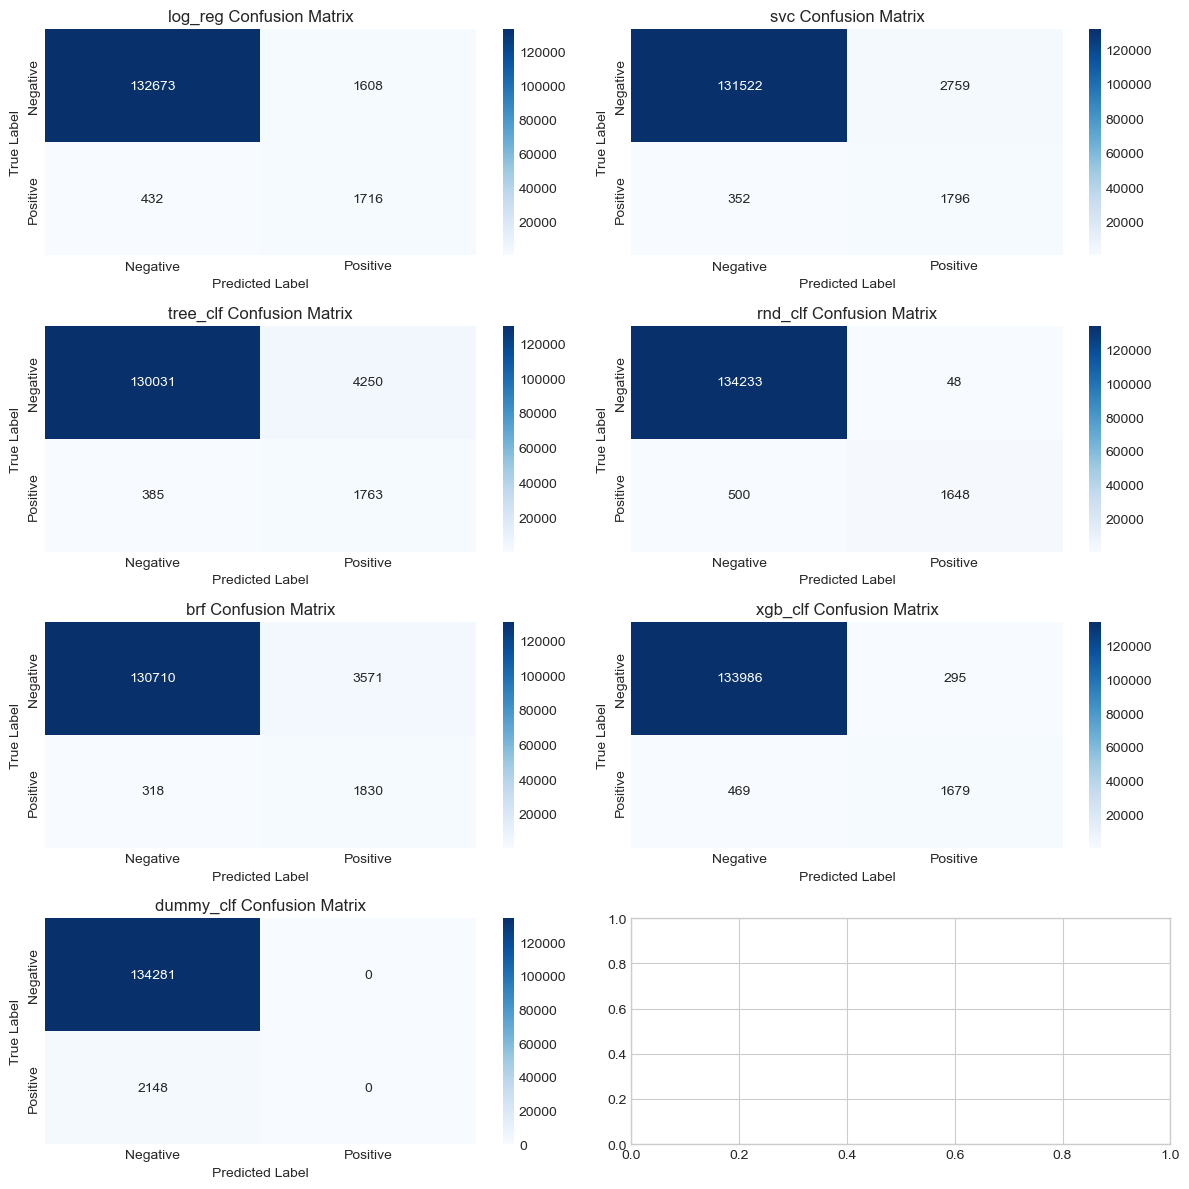

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(4, 2, figsize=(12, 12))  # 3x2 grid layout


# Loop through models
for i, (model_name, predictions) in enumerate(model_predictions.items()):
    ax = axes[i // 2, i % 2]  # Convert 1D index to 2D for subplots

    # Compute confusion matrix
    cm = confusion_matrix(steel_labels, predictions)

    # Define class labels
    class_names = ['Negative', 'Positive']  # Adjust based on actual class labels

    # Create a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,
                yticklabels=class_names, ax=ax)

    # Labels & Titles
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"{model_name} Confusion Matrix")

plt.tight_layout()  # Adjust spacing
plt.show()


## **Precision, Recall and F1 score**

In [175]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Dictionary to store model evaluation metrics
metrics = {}

# Loop through each model's predictions
for model_name, predictions in model_predictions.items():
    metrics[model_name] = {
        "Precision": precision_score(steel_labels, predictions),
        "Recall": recall_score(steel_labels, predictions),
        "F1 Score": f1_score(steel_labels, predictions)
    }

# Convert to DataFrame
df_metrics = pd.DataFrame.from_dict(metrics, orient="index")

# Display the DataFrame
df_metrics


Precision    Recall  F1 Score
log_reg     0.516245  0.798883  0.627193
svc         0.394292  0.836127  0.535879
tree_clf    0.293198  0.820764  0.432055
rnd_clf     0.971698  0.767225  0.857440
brf         0.338826  0.851955  0.484832
xgb_clf     0.850557  0.781657  0.814653
dummy_clf   0.000000  0.000000  0.000000

### **Insights**  
- The results show a shift towards higher **recall** rather than **precision** across models.  
- In **Logistic Regression**, the **precision is 0.516**, while **recall is higher at 0.798**. Similarly, for **SVC**, the **precision is 0.394**, with a **higher recall of 0.836**.  
- **Balanced Random Forest** exhibits a similar trend to **SVC**, favoring recall over precision.  
- **Decision Tree** has the lowest **precision (0.293)** but achieves a **recall of 0.82**.  
- **XGBoost Classifier** and **Random Forest** yield more balanced and optimal results:  
  - **XGBoost:** **Precision = 0.850**, **Recall = 0.7816**  
  - **Random Forest:** **Precision = 0.971**, **Recall = 0.7672**  


## Calculating probability and decision function scores for calculating evaluation metrics

In [177]:

from sklearn.model_selection import cross_val_predict

# Dictionary to store probability predictions
model_prob_df_scores = {}

for name, model in untrained_models.items():
    try:
        # If model supports predict_proba, use it
        if hasattr(model, "predict_proba"):
            model_prob_df_scores[name] = cross_val_predict(model, steel_x, steel_labels,
                                                             cv=3, method="predict_proba")[:, 1]  # Extract positive class probabilities
        # If model supports decision_function, use it
        elif hasattr(model, "decision_function"):
            model_prob_df_scores[name] = cross_val_predict(model, steel_x, steel_labels,
                                                             cv=3, method="decision_function")
        else:
            print(f"Skipping {name}: No probability or decision function available.")

    except Exception as e:
        print(f"Error processing {name}: {e}")


## **Precision-Recall vs. Threshold**  
- The x-axis represents the threshold values, while the y-axis shows precision and recall.  
- This plot helps visualize the trade-off between precision and recall at different threshold levels.

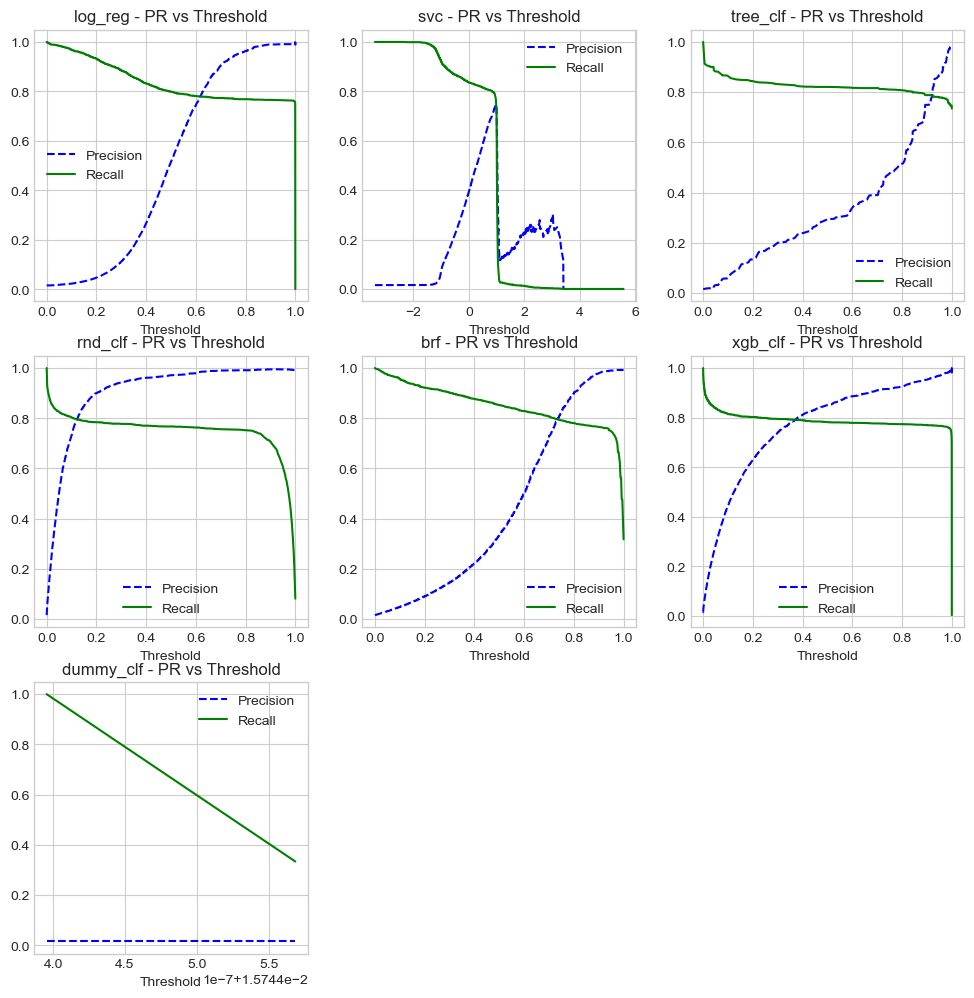

<Figure size 640x480 with 0 Axes>

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Ensure model_predictions contains probability predictions
num_models = len(model_prob_df_scores)
rows = (num_models + 2) // 3  # Adjust rows dynamically
fig, axes = plt.subplots(rows, 3, figsize=(12, 12))
axes = axes.flatten()

# Loop through models and plot precision-recall curve
for i, (name, y_probs) in enumerate(model_prob_df_scores.items()):
    precisions, recalls, thresholds = precision_recall_curve(steel_labels, y_probs)

    # Plot on respective subplot
    axes[i].plot(thresholds, precisions[:-1], "b--", label="Precision")
    axes[i].plot(thresholds, recalls[:-1], "g-", label="Recall")
    axes[i].set_xlabel("Threshold")
    axes[i].set_title(f"{name} - PR vs Threshold")
    axes[i].legend()

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Save before plt.show()
plt.savefig("plot.png", dpi=300)  # Save as PNG (high resolution)
plt.savefig("plot.pdf")  # Save as PDF (vector format)
plt.show()

plt.tight_layout()
plt.show()



### **Insights from the Plot (PR vs Threshold for Different Models)**  

1. **Logistic Regression (`log_reg`)**  
   - Shows a smooth precision-recall tradeoff as the threshold increases.  
   - Precision starts low but increases as recall drops.  
   - Expected behavior for a probabilistic classifier.  

2. **Support Vector Classifier (`svc`)**  
   - The plot is unusual, with a sharp **non-monotonic** behavior(does not constantly increase or decrease) in precision and recall.  
   - Precision remains very low for many thresholds and then suddenly spikes.  
   - Likely due to **poor probability calibration** in SVMs:  
     - SVMs don’t produce probabilities directly. Instead, `predict_proba()` uses **Platt scaling**, which may be unstable for imbalanced data.  
     - The `decision_function` outputs unbounded scores, causing erratic behavior when mapped to probabilities.  

3. **Decision Tree (`tree_clf`)**  
   - Shows a more stepwise pattern since decision trees make **hard splits**.  
   - Precision increases as recall drops, but the transition is not as smooth as logistic regression.  

4. **Random Forest (`rnd_clf`)**  
   - Precision starts high and decreases gradually, while recall behaves oppositely.  
   - More stable than the decision tree due to ensemble averaging.  

5. **Balanced Random Forest (`brf`)**  
   - Similar to `rnd_clf`, but adjusted for class balance, leading to a slightly different curve.  

6. **XGBoost (`xgb_clf`)**  
   - Shows a smooth tradeoff between precision and recall, indicating well-calibrated probabilities.  
   - Slight drop in precision compared to random forest, possibly due to overfitting or handling of class imbalance.  

7. **Dummy Classifier (`dummy_clf`)**  
   - Shows a **linear decrease in recall** while precision stays very low, indicating a baseline random classifier.  

## **Precision Vs Recall (PR) Curve**
- This helps to see the trade off between Precision and recall more clearly.

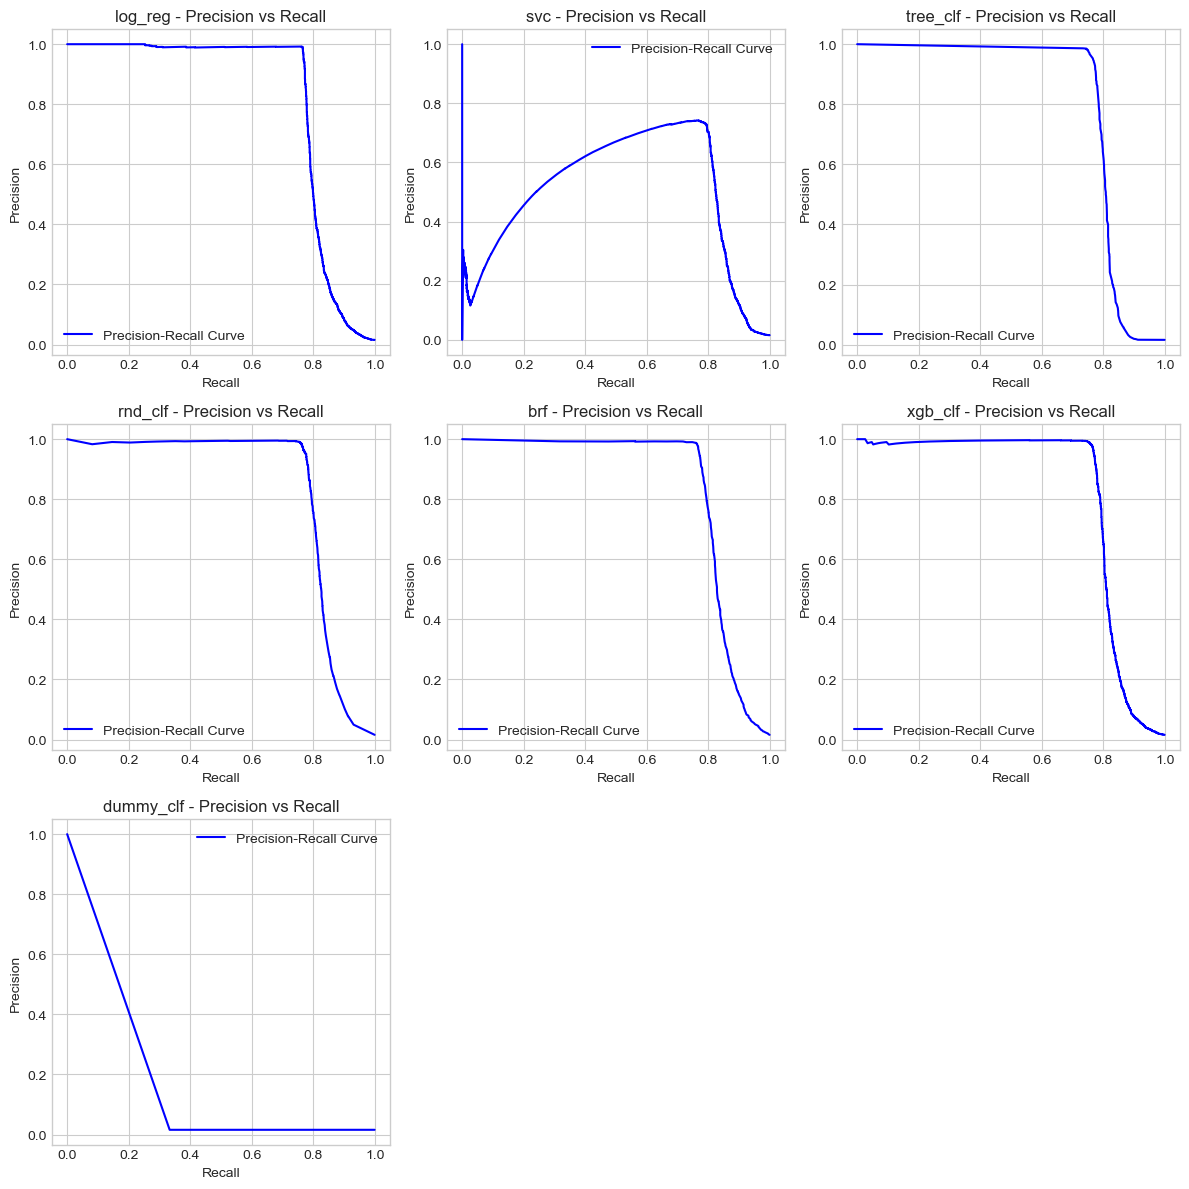

In [194]:

# Create subplots dynamically based on the number of models
num_models = len(model_prob_df_scores)
rows = (num_models + 2) // 3  # Adjust rows dynamically to fit 3 per row
fig, axes = plt.subplots(rows, 3, figsize=(12, 12))
axes = axes.flatten()  # Convert 2D array to 1D for easier indexing

# Loop through models and plot using stored scores
for i, (name, scores) in enumerate(model_prob_df_scores.items()):
    precisions, recalls, _ = precision_recall_curve(steel_labels, scores)

    # Plot Precision vs Recall
    axes[i].plot(recalls, precisions, "b-", label="Precision-Recall Curve")
    axes[i].set_xlabel("Recall")
    axes[i].set_ylabel("Precision")
    axes[i].set_title(f"{name} - Precision vs Recall")
    axes[i].legend()

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [196]:
from sklearn.metrics import average_precision_score

pr_auc = {}

for name, scores in model_prob_df_scores.items():
    pr_auc_score = average_precision_score(steel_labels, scores)

    # storing the results
    pr_auc[name] = {
        "PR AUC Score": pr_auc_score
    }

df_pr_auc = pd.DataFrame(pr_auc)
df_pr_auc.T

PR AUC Score
log_reg        0.813117
svc            0.488608
tree_clf       0.800966
rnd_clf        0.827230
brf            0.835338
xgb_clf        0.819784
dummy_clf      0.015744

### **Insights from PR AUC Scores**  

1. **Balanced Random Forest (brf) performs the best** with the highest PR AUC score (0.835), indicating it effectively balances precision and recall despite class imbalance.  
2. **Random Forest (rnd_clf) and XGBoost (xgb_clf) follow closely**, with PR AUC scores of 0.827 and 0.819, respectively. These ensemble methods handle class imbalance well and provide robust decision boundaries.  
3. **Logistic Regression (log_reg) and Decision Tree (tree_clf) perform decently** with scores of 0.813 and 0.801, suggesting they capture meaningful patterns but may not be as powerful as ensemble methods.  
4. **SVC (svc) performs poorly (0.488), significantly lower than other models**, likely due to its reliance on raw margin-based decision scores rather than probability estimates. Poor probability calibration can lead to unstable precision-recall trade-offs.  
5. **Dummy Classifier (dummy_clf) has the worst performance (0.0157), confirming it does no better than random guessing.**  


## **ROC Curve**

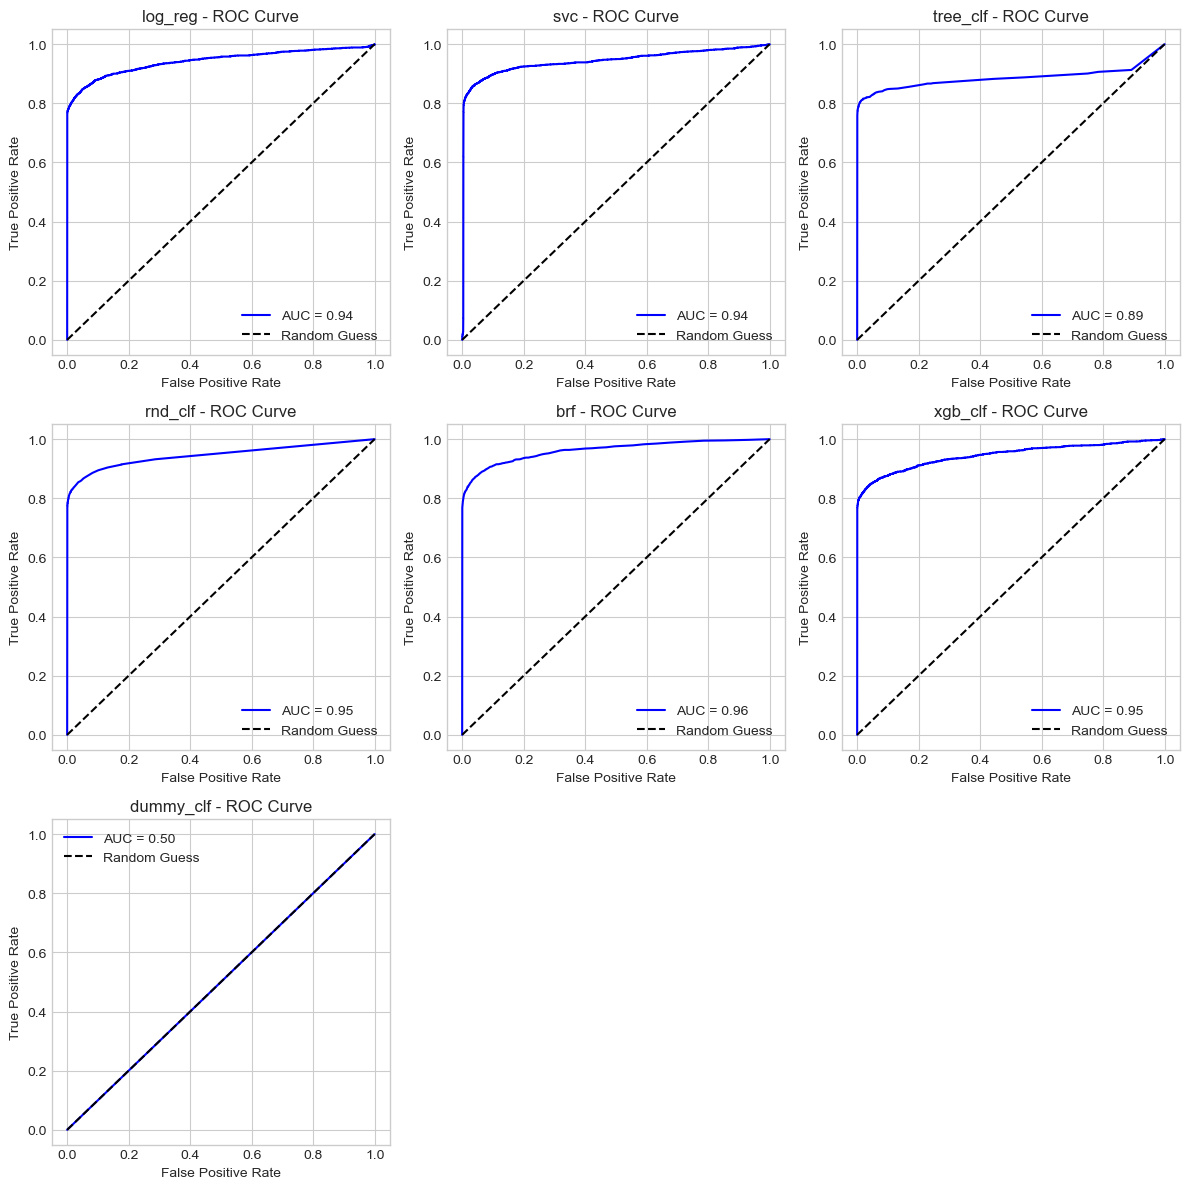

In [199]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Create subplots dynamically based on the number of models
num_models = len(model_prob_df_scores)
rows = (num_models + 2) // 3  # Adjust rows dynamically to fit 3 per row
fig, axes = plt.subplots(rows, 3, figsize=(12,12))
axes = axes.flatten()  # Convert 2D array to 1D for easier indexing

# Loop through models and plot ROC curves
for i, (name, scores) in enumerate(model_prob_df_scores.items()):
    fpr, tpr, _ = roc_curve(steel_labels, scores)
    roc_auc = auc(fpr, tpr)  # Compute Area Under the Curve (AUC)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
    axes[i].plot([0, 1], [0, 1], "k--", label="Random Guess")  # Diagonal line
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].set_title(f"{name} - ROC Curve")
    axes[i].legend()

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [201]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score

# Dictionary to store AUC scores
auc_results = {}

# Loop through all models using stored scores
for name, scores in model_prob_df_scores.items():
    roc_auc = roc_auc_score(steel_labels, scores)  # ROC AUC
    pr_auc = average_precision_score(steel_labels, scores)  # PR AUC

    # Store results
    auc_results[name] = {
        "ROC AUC Sc##ore": roc_auc,
        "PR AUC Score": pr_auc
    }

# Convert results into a DataFrame
df_auc_results = pd.DataFrame(auc_results).T  # Transpose for better readability

# Display results
df_auc_results


ROC AUC Score  PR AUC Score
log_reg         0.942837      0.813117
svc             0.942666      0.488608
tree_clf        0.886074      0.800966
rnd_clf         0.945861      0.827230
brf             0.962661      0.835338
xgb_clf         0.945476      0.819784
dummy_clf       0.499998      0.015744

### **Insights on ROC AUC scores**
- **Ensemble Models Lead:**  
  - **Balanced Random Forest (0.9627)** has the highest score, indicating excellent class discrimination.
  - **Random Forest (0.9459)** and **XGBoost (0.9455)** are also strong performers in case of ROC and PR both.

- **Consistent High Performance:**  
  - **Logistic Regression (0.9428)** and **SVC (0.9427)** show very similar and high scores but PR is the worst for SVC.

- **Decision Tree Lag:**  
  - **Decision Tree (0.8861)** scores noticeably lower than the others, suggesting less robust performance.


## **Finding the best threshold for our usecase**
- **In this classification problem having a good recall is more crucial than precision although precision should be optimal as well**
- **Why we need good recall for our problem**
    - If number of true positives are low i.e recall is low then the model will miss many machine failures which can be costly and maybe destructive to the machinery and the workers.
- **Why we still need precision to be optimal**
   - If precision is  not optimal then number of false positives will rise which can cause down time in production.

In [207]:
# Dictionary to store results
model_results = {}

# Loop through all models using stored scores
for name, scores in model_prob_df_scores.items():
    precisions, recalls, thresholds = precision_recall_curve(steel_labels, scores)

    # Compute F1 scores for each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

    # Find the threshold with the highest F1 score
    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]

    # Store results
    model_results[name] = {
        "Best Threshold": best_threshold,
        "Best Precision": precisions[best_index],
        "Best Recall": recalls[best_index],
        "Best F1 Score": f1_scores[best_index]
    }

# Convert results into a DataFrame
df_results = pd.DataFrame(model_results).T  # Transpose to make models as rows

# Display results
df_results


Best Threshold  Best Precision  Best Recall  Best F1 Score
log_reg          0.895108        0.989771     0.765829       0.863517
svc              0.919198        0.730703     0.793296       0.760714
tree_clf         0.992065        0.979369     0.751397       0.850369
rnd_clf          0.612321        0.984384     0.763035       0.859691
brf              0.915000        0.985568     0.763035       0.860142
xgb_clf          0.974209        0.980287     0.763966       0.858713
dummy_clf        0.015744        0.015744     1.000000       0.031001

In [210]:
df_metrics

Precision    Recall  F1 Score
log_reg     0.516245  0.798883  0.627193
svc         0.394292  0.836127  0.535879
tree_clf    0.293198  0.820764  0.432055
rnd_clf     0.971698  0.767225  0.857440
brf         0.338826  0.851955  0.484832
xgb_clf     0.850557  0.781657  0.814653
dummy_clf   0.000000  0.000000  0.000000

### **Insights after threshold manipulation**
- **Logistic regression** has the highest precision at 0.765 recall rate.
- **SVC** have the highest recall but precision takes a major hit.
- **Decision Tree** has around 0.979 precision but lowest recall at 0.75.
- **Random Forest** has high precision of 0.984 and recall of 0.763
- **Balanced RF** is performing better at precision than random forest with value 0.9855 and same recall.
- **XGB Classifier** also has high precision of 0.98 but greater recall than balanced or random forest.

## **Testing various recall values for optimal precision**

In [218]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve

# Dictionary to store results
model_results = {}

# Define desired recall level
desired_recall = 0.80 # Adjust based on your requirement

# Loop through all models using stored scores
for name, scores in model_prob_df_scores.items():
    precisions, recalls, thresholds = precision_recall_curve(steel_labels, scores)

    # Ensure thresholds array is properly aligned (thresholds are always len(recalls) - 1)
    thresholds = np.append(thresholds, thresholds[-1])  # Duplicate last threshold for alignment

    # Get all indices where recall is at least desired level
    valid_idx = np.where(recalls >= desired_recall)[0]

    if len(valid_idx) > 0:
        # Pick the highest possible threshold that still meets the recall condition
        best_index = valid_idx[-1]  # Last index ensuring highest threshold for recall ≥ desired
    else:
        best_index = np.argmax(recalls)  # Use highest recall if none meet the target

    # Extract values
    best_threshold = round(thresholds[best_index], 5)
    best_precision = round(precisions[best_index], 5)
    best_recall = round(recalls[best_index], 5)

    # Compute F1 score
    best_f1_score = round((2 * best_precision * best_recall) / (best_precision + best_recall + 1e-9), 5)

    # Store results
    model_results[name] = {
        "Threshold for Recall ≥ {:.0%}".format(desired_recall): best_threshold,
        "Precision": best_precision,
        "Recall": best_recall,
        "F1 Score": best_f1_score
    }

# Convert results into a DataFrame
df_results = pd.DataFrame(model_results).T  # Transpose to make models as rows

# Display results
df_results


Threshold for Recall ≥ 80%  Precision   Recall  F1 Score
log_reg                       0.49530    0.50381  0.80028   0.61835
svc                           0.83811    0.70307  0.80028   0.74853
tree_clf                      0.84249    0.62085  0.80121   0.69959
rnd_clf                       0.10600    0.75472  0.80074   0.77705
brf                           0.72000    0.76207  0.80074   0.78093
xgb_clf                       0.22367    0.66065  0.80028   0.72379
dummy_clf                     0.01574    0.01574  1.00000   0.03099

#### **Insights**
- We can see that increasing recall has a drastic hit on precision in most of the models. However balanced random forest has a decent precision recall tradeoff with 0.762 precision and 0.80 recall and can be used if higher recall is required.
- But going above 80percent recall while maintaining optimal recall is not possible in any model , even balanced random forest.

## **Model selection for tuning and evaluation**
- Based on initial performance metrics without threshold tweaking, the best candidates for hyperparameter tuning and test set evaluation are the **Random Forest Classifier (rnd_clf)** and the **XGBoost Classifier (xgb_clf)**. 

- **Random Forest (rnd_clf):**
  - **Precision:** 0.971698 (very high, indicating few false positives)
  - **F1 Score:** 0.857440 (the best balance between precision and recall)
  - **Recall:** 0.767225 (solid performance)
  - **ROC AUC** 0.945861
  - **PR AUC** 0.827230

- **XGBoost (xgb_clf):**
  - **Precision:** 0.850557
  - **F1 Score:** 0.814653 (also strong, though slightly lower than random forest)
  - **Recall:** 0.781657 (little higher than rnd_clf)
   - **ROC AUC** 0.945476
  - **PR AUC** 0.819784 	

### Why These Models?
- **Balanced Performance:** Both models achieve a good trade-off between precision and recall as captured by their F1 scores.
- **Ensemble Strength:** Ensemble methods like Random Forest and XGBoost typically offer robustness and are well-suited for further tuning to squeeze out additional performance.


## **Hyperparmater tunning**


| Model | Hyperparameter | Description | Min | Max |
|--------|---------------|-------------|-----|-----|
| **Random Forest** | `n_estimators` | Number of trees in the forest | 50 | 500 |
|  | `max_depth` | Maximum depth of each tree | 5 | 50 |
|  | `min_samples_split` | Min samples needed to split a node | 2 | 20 |
|  | `min_samples_leaf` | Min samples required at a leaf node | 1 | 10 |
|  | `max_features` | Max number of features considered for each split | 0.1 | 1.0 |
| **XGBoost** | `learning_rate` | Step size shrinkage to prevent overfitting | 0.001 | 0.3 |
|  | `n_estimators` | Number of boosting rounds (trees) | 50 | 1000 |
|  | `max_depth` | Maximum depth of a tree | 3 | 15 |
|  | `subsample` | Fraction of samples used for training each tree | 0.5 | 1.0 |
|  | `colsample_bytree` | Fraction of features considered per tree | 0.5 | 1.0 |
|  | `reg_alpha` | L1 regularization (lasso) | 0 | 10 |
|  | `reg_lambda` | L2 regularization (ridge) | 0 | 10 |


### **Optuna tuning for random forest classifier**

#### **Which metric to choose to maximize ROC AUC vs PR AUC**

In [ ]:
# !pip install optuna -- quiet

In [232]:
'''
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_predict

def objective(trial):

    # Define hyperparameter search space for Random Forest
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": "balanced",  # Handle class imbalance
    }

    model = RandomForestClassifier(**params, random_state=42)
 
    # Perform stratified 3-fold cross-validation
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    y_probs = cross_val_predict(model, steel_x_prepared, steel_labels, cv=skf, method="predict_proba")[:, 1]

    # Compute Precision-Recall AUC (PR-AUC)
    precisions, recalls, _ = precision_recall_curve(steel_labels, y_probs)
    pr_auc = auc(recalls, precisions)

    return pr_auc  # Optuna will maximize PR-AUC

# Create and run the Optuna study
study_rf = optuna.create_study(direction="maximize")  # Maximizing PR-AUC
study_rf.optimize(objective, n_trials=50, n_jobs=-1)  # Running 50 trials in parallel

print("Best Parameters:", study_rf.best_params)
print("Best PR-AUC Score:", study_rf.best_value)
'''

[I 2025-02-24 19:10:42,362] A new study created in memory with name: no-name-55d062e7-5343-4289-b549-79dc1bf03b56
[I 2025-02-24 19:13:28,702] Trial 3 finished with value: 0.8314700733172079 and parameters: {'n_estimators': 329, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 3 with value: 0.8314700733172079.
[I 2025-02-24 19:13:31,996] Trial 2 finished with value: 0.8277313227961959 and parameters: {'n_estimators': 351, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.831456192397199.
[I 2025-02-24 19:13:44,600] Trial 2 finished with value: 0.8319261717706411 and parameters: {'n_estimators': 277, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 2 with value: 0.8319261717706411.
[I 2025-02-24 19:15:20,145] Trial 4 finished with value: 0.8309198236495464 and parameters: {'n_estimators': 187, 'max_depth': 12, 'min_samples_split'

Best Parameters: {'n_estimators': 158, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5, 'bootstrap': True}
Best PR-AUC Score: 0.8352188000603504


- saving the best parameters

In [239]:
# so we dont have to run the tuning again to access the params
rnd_best_params = {'n_estimators': 158, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5, 'bootstrap': True}
rnd_best_score = 0.8352188000603504

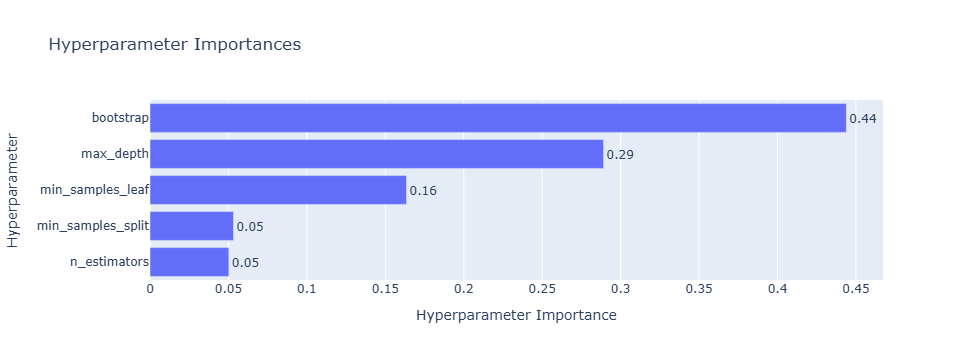

In [242]:
'''
import optuna.visualization as ov

# Plot hyperparameter importance
optuna.visualization.plot_param_importances(study_rf)  # For Random Forest
'''

In [246]:
# checking previous results
df_auc_results

ROC AUC Score  PR AUC Score
log_reg         0.942837      0.813117
svc             0.942666      0.488608
tree_clf        0.886074      0.800966
rnd_clf         0.945861      0.827230
brf             0.962661      0.835338
xgb_clf         0.945476      0.819784
dummy_clf       0.499998      0.015744

### **Insights**
- We can see some increase in PR AUC score.
- Best Parameters: {'n_estimators': 158, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 5, 'bootstrap': True}
- Best PR-AUC Score: 0.8352188000603504

### **Optuna tuning for Xgboost classifier**

In [248]:
print(steel_x_prepared.columns)

Index(['prepared__Process temperature [K]', 'prepared__Air temperature [K]',
       'prepared__Torque [Nm]', 'prepared__Tool wear [min]', 'prepared__TWF',
       'prepared__HDF', 'prepared__PWF', 'prepared__OSF', 'prepared__RNF',
       'yeo__Rotational speed [rpm]', 'failure__TWF_HDF_PWF_OSF_RNF_sum',
       'Speed*Torque__Rotational speed [rpm]_Torque [Nm]_product',
       'Wear_rpm__Tool wear [min]_to_Rotational speed [rpm]_ratio',
       'cat__Type'],
      dtype='object')


We need to remove '[' from the column names as xgboost doesnt work well with them.

In [250]:
# Replace invalid characters in column names
steel_x_columns_prepared = steel_x_prepared.copy()
steel_x_columns_prepared.columns = steel_x_prepared.columns.str.replace(r'[\[\]<>]', '', regex=True)

In [252]:
'''
import optuna
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_recall_curve, auc
from xgboost import XGBClassifier

def objective(trial):

    # Define hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),  
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "scale_pos_weight": np.sum(steel_labels == 0) / np.sum(steel_labels == 1),  # Handle imbalance
    }

    # Initialize XGBoost model
    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric="logloss")

    # Perform 3-fold cross-validation
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    y_probs = cross_val_predict(model, steel_x_columns_prepared, steel_labels, cv=skf, method="predict_proba")[:, 1]

    # Compute Precision-Recall AUC (PR-AUC)
    precisions, recalls, _ = precision_recall_curve(steel_labels, y_probs)
    pr_auc = auc(recalls, precisions)

    return pr_auc  # Optuna will maximize PR-AUC


# Create and run the Optuna study
study_xg = optuna.create_study(direction="maximize")
study_xg.optimize(objective, n_trials=50, n_jobs=-1)  # Running 50 trials in parallel

# Print best parameters
print("Best Parameters:", study_xg.best_params)
print("Best PR-AUC Score:", study_xg.best_value)
'''

[I 2025-02-24 20:19:07,441] A new study created in memory with name: no-name-8717dc43-feac-4e96-b99d-d27c93b76506
[I 2025-02-24 20:19:21,086] Trial 1 finished with value: 0.8213646407344773 and parameters: {'n_estimators': 131, 'max_depth': 10, 'learning_rate': 0.2771679576821304, 'subsample': 0.8330216055916664, 'colsample_bytree': 0.9215524532615096}. Best is trial 1 with value: 0.8213646407344773.
[I 2025-02-24 20:19:24,894] Trial 2 finished with value: 0.8385468606924806 and parameters: {'n_estimators': 483, 'max_depth': 3, 'learning_rate': 0.02301984426636689, 'subsample': 0.6281320998690076, 'colsample_bytree': 0.5909949087557834}. Best is trial 2 with value: 0.8385468606924806.
[I 2025-02-24 20:19:43,614] Trial 4 finished with value: 0.8255497386799461 and parameters: {'n_estimators': 220, 'max_depth': 11, 'learning_rate': 0.18483461042874672, 'subsample': 0.9878680191168775, 'colsample_bytree': 0.7618900719741637}. Best is trial 2 with value: 0.8385468606924806.
[I 2025-02-24 2

Best Parameters: {'n_estimators': 392, 'max_depth': 3, 'learning_rate': 0.04048268583073736, 'subsample': 0.5532413897656692, 'colsample_bytree': 0.7338870698952941}
Best PR-AUC Score: 0.840061842526875


**Saving the best parameters**

In [257]:
xgboost_best_params = {'n_estimators': 392, 'max_depth': 3, 'learning_rate': 0.04048268583073736,
                       'subsample': 0.5532413897656692, 'colsample_bytree': 0.7338870698952941}
xgboost_best_score = 0.840061842526875

## **Insights**
- The score has improved a lot which was 0.819784 now its 0.838, is now higher than random forest classifier.
- Best Parameters: {'n_estimators': 392, 'max_depth': 3, 'learning_rate': 0.04048268583073736,
                       'subsample': 0.5532413897656692, 'colsample_bytree': 0.7338870698952941}
- Best PR-AUC Score: 0.840061842526875

# **Feature Importances**  
- Check how individual features contribute to machine failure prediction.  
- Remove redundant features if necessary, though the low feature count makes this less critical.  
- Multicollinearity may arise from feature engineering (e.g., adding existing features), but collinear features can be ignored in importance analysis.

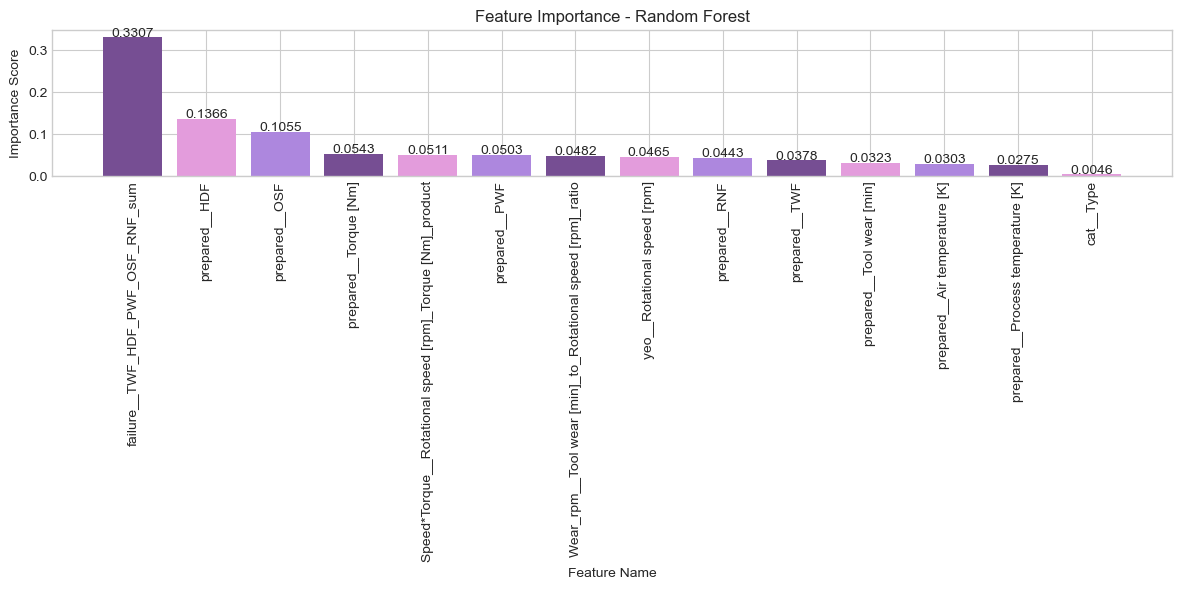

In [263]:
import matplotlib.pyplot as plt
import numpy as np

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(steel_x_prepared, steel_labels)

# Get feature importances
importances = rf.feature_importances_
feature_names = steel_x_prepared.columns

# Sort feature importance for better visualization
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], align="center", color=colors)

# Add annotations (importance values)
for i, v in enumerate(importances[indices]):
    plt.text(i, v + 0.002, f"{v:.4f}", ha="center", fontsize=10)

# Format plot
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

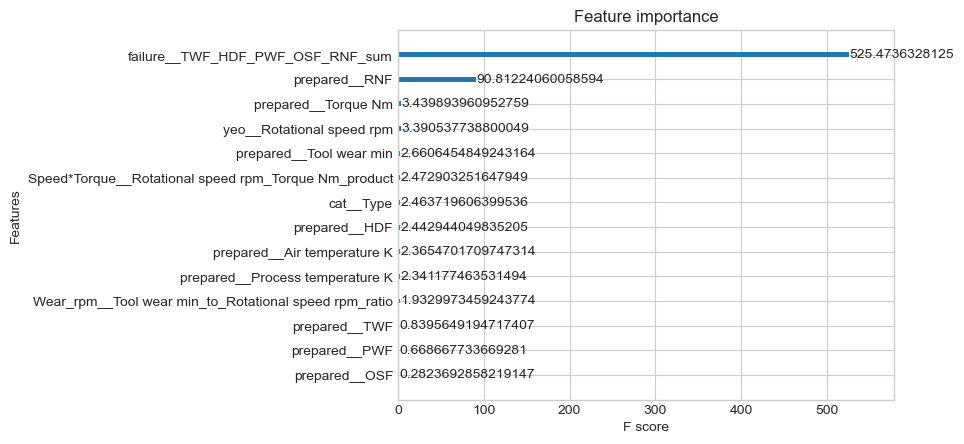

In [269]:
from xgboost import plot_importance

# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(steel_x_columns_prepared, steel_labels)

# Plot feature importance
plt.figure(figsize=(10,6))
plot_importance(xgb, importance_type="gain", max_num_features=20)  # Top 20 features
plt.show()


### **Insights**
- We can see that failure sum column has the highest feature importance.
- Random forest suggest prepared_OSF has third most important feature but xgb places it at last which may be due to their different algorithms and due to Multicollinearity.
- We can remove rebundant features which are of very low importance separately for each model but for this case we will leave them as it is as the number of columns are low.

# Training models on best parameters

## Random forest classifier

In [272]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with best parameters
rf_best = RandomForestClassifier(**rnd_best_params, random_state=42)
rf_best.fit(steel_x_prepared, steel_labels)


RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=158, random_state=42)

In [273]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on the training set
rf_best_pred = rf_best.predict(steel_x_prepared)

# Print metrics
print("Accuracy:", accuracy_score(steel_labels, rf_best_pred))
print("Classification Report:\n", classification_report(steel_labels, rf_best_pred))


Accuracy: 0.9962251427482427
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    134281
           1       0.99      0.77      0.86      2148

    accuracy                           1.00    136429
   macro avg       0.99      0.88      0.93    136429
weighted avg       1.00      1.00      1.00    136429



### **Random forest classifier evaluation**

In [274]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

# Predictions
y_pred = rf_best.predict(steel_x_prepared)
rnd_best_prob = rf_best.predict_proba(steel_x_prepared)[:, 1]  # Probabilities for the positive class

# Compute Metrics
precision = precision_score(steel_labels, rf_best_pred)
recall = recall_score(steel_labels, rf_best_pred)
f1 = f1_score(steel_labels, rf_best_pred)
roc_auc = roc_auc_score(steel_labels, rnd_best_prob)

# Compute PR AUC
precisions, recalls, _ = precision_recall_curve(steel_labels, rnd_best_prob)
pr_auc = auc(recalls, precisions)

# Create a DataFrame for better visualization
rf_metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score", "ROC AUC", "PR AUC"],
    "Value": [precision, recall, f1, roc_auc, pr_auc]
})

# Display the metrics
rf_metrics_df


Metric     Value
0  Precision  0.990390
1     Recall  0.767691
2   F1-score  0.864936
3    ROC AUC  0.999277
4     PR AUC  0.967979

## XGB Classifier

In [276]:
steel_x_columns_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   prepared__Process temperature K                        136429 non-null  float64
 1   prepared__Air temperature K                            136429 non-null  float64
 2   prepared__Torque Nm                                    136429 non-null  float64
 3   prepared__Tool wear min                                136429 non-null  float64
 4   prepared__TWF                                          136429 non-null  float64
 5   prepared__HDF                                          136429 non-null  float64
 6   prepared__PWF                                          136429 non-null  float64
 7   prepared__OSF                                          136429 non-null  float64
 8   prepared__RNF                     

In [277]:
import xgboost as xgb

# Assuming rnd_best_params contains the best hyperparameters for the model
best_params = xgboost_best_params

# Initialize the XGBoost model with the best parameters
xgb_best_model = xgb.XGBClassifier(**best_params)

# Train the model on the full dataset
xgb_best_model.fit(steel_x_columns_prepared, steel_labels)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7338870698952941, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04048268583073736,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=392, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### XGB Classifier evaluation

In [279]:
from sklearn.metrics import accuracy_score
# Make predictions
xgb_best_pred = xgb_best_model.predict(steel_x_columns_prepared)

# Evaluate the model (if you want to check training accuracy)
accuracy = accuracy_score(steel_labels, xgb_best_pred)
print(f"Model training accuracy: {accuracy:.4f}")

Model training accuracy: 0.9962


In [280]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

xgb_best_prob = xgb_best_model.predict_proba(steel_x_columns_prepared)[:, 1]  # Probabilities for the positive class

# Compute Metrics
precision = precision_score(steel_labels, xgb_best_pred)
recall = recall_score(steel_labels, xgb_best_pred)
f1 = f1_score(steel_labels, xgb_best_pred)
roc_auc = roc_auc_score(steel_labels, xgb_best_prob)

# Compute PR AUC
precisions, recalls, _ = precision_recall_curve(steel_labels, xgb_best_prob)
pr_auc = auc(recalls, precisions)

# Create a DataFrame for better visualization
xg_metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score", "ROC AUC", "PR AUC"],
    "Value": [precision, recall, f1, roc_auc, pr_auc]
})

# Display the metrics
xg_metrics_df


Metric     Value
0  Precision  0.990975
1     Recall  0.766760
2   F1-score  0.864567
3    ROC AUC  0.977646
4     PR AUC  0.870231

In [289]:
rf_metrics_df

Metric     Value
0  Precision  0.990390
1     Recall  0.767691
2   F1-score  0.864936
3    ROC AUC  0.999277
4     PR AUC  0.967979

In [304]:
import pandas as pd


xg_metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score", "ROC AUC", "PR AUC"],
    "XGBoost": [0.990975, 0.766760, 0.864567, 0.977646, 0.870231]
})

rf_metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score", "ROC AUC", "PR AUC"],
    "Random Forest": [0.990390, 0.767691, 0.864936, 0.999277, 0.967979
]
})

# Merge on Metric column
combined_metric_df = xg_metrics_df.merge(rf_metrics_df, on="Metric", how="inner")
combined_metric_df


Metric   XGBoost  Random Forest
0  Precision  0.990975       0.990390
1     Recall  0.766760       0.767691
2   F1-score  0.864567       0.864936
3    ROC AUC  0.977646       0.999277
4     PR AUC  0.870231       0.967979

## **Insights on model evaluation on Test set**
- **Random forest classifier model**

  - Precision 99%
  - Has Recall of around 76.7%
  - F1 score of 86.5%
  - ROC AUC is 99.9%
  - PR AUC is around 96.7%

- **XGB Classifier model**

  - Precision 99%
  - Has Recall of around 76.6%
  - F1 score of 86.4%
  - ROC AUC of 97.7%
  - PR AUC of 87%


## **Evaluation Summary**  

1. **Overall Performance:**  
   - The **Random Forest Classifier** outperforms the **XGBoost Classifier** across all metrics but only by small margins.

2. **Recall (Sensitivity):**  
   - Both models have similar recall indicating they **identify a comparable proportion of positive cases**.  
   - Since recall is critical in scenarios where missing a positive case is costly (our case machine failure prediction) both models perform reasonably well.  

3. **F1 Score:**  
   - The **Random Forest model** has a **slightly better balance** between precision and recall than **XGBoost**.   

4. **ROC AUC (Discrimination Ability):**  
   - **Random Forest (99.9%)** significantly outperforms **XGBoost (97.7%)**, meaning it is **better at distinguishing between classes**.  
   - A **99.9% ROC AUC** is extremely high, indicating **almost perfect separability** of the classes.  

5. **PR AUC (Precision-Recall Tradeoff):**  
   - Random Forest (96.7%) is much higher than XGBoost (87%), implying it maintains **better precision even when recall increases**. 
   - A lower PR AUC (86% for XGBoost) suggests **XGB might struggle more with precision at higher recall levels**.  


## **Insights from Summary**
- We can see that recall is similar for both with similar precision as well.
- **But** for this problem we need **high recall** at **optimal precision** as missing a positive instance(machine failure) will be costly and will increase **downtime**.
- **Also** from **PR AUC** we can see that **Random Forest** model has much higher AUC score around **96.7%** which suggests that it can have **high/optimal precision** even at high desired recall.
- We can check the optimal threshold.


# Finding threshold for best recall and optimal precision

In [326]:
from sklearn.metrics import precision_recall_curve, f1_score

# Dictionary to store results
model_results = {}

# Define model name
name = "Random Forest"  # Make sure to change it per model

# Define desired recall level
desired_recall = 0.90  # Adjust based on your requirement

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(steel_labels, rnd_best_prob)

# Align thresholds array (length is always len(recalls) - 1)
thresholds = np.append(thresholds, thresholds[-1])  # Duplicate last threshold for alignment

# Find indices where recall meets or exceeds the desired threshold
valid_idx = np.where(recalls >= desired_recall)[0]

if len(valid_idx) > 0:
    best_index = valid_idx[-1]  # Highest threshold ensuring recall ≥ desired
else:
    best_index = np.argmax(recalls)  # Use highest recall if none meet the target

# Extract best values
best_threshold = round(thresholds[best_index], 5)
best_precision = round(precisions[best_index], 5)
best_recall = round(recalls[best_index], 5)

# Compute F1 score manually (alternative: use sklearn’s f1_score if needed)
best_f1_score = round((2 * best_precision * best_recall) / (best_precision + best_recall + 1e-9), 5)

# Store results in dictionary
model_results[name] = {
    f"Threshold for Recall ≥ {desired_recall:.0%}": best_threshold,
    "Precision": best_precision,
    "Recall": best_recall,
    "F1 Score": best_f1_score
}

# Convert results into a DataFrame
df_rnd_thresh = pd.DataFrame(model_results).T  # Transpose for better readability

# Display results
df_rnd_thresh


Threshold for Recall ≥ 90%  Precision   Recall  F1 Score
Random Forest                     0.13094    0.89828  0.90037   0.89932

In [330]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, f1_score

# Dictionary to store results
model_results = {}

# Define model name
name = "XGB"  

# Define desired recall level
desired_recall = 0.80  # Adjust based on your requirement

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(steel_labels, xgb_best_prob)

# Align thresholds array (length is always len(recalls) - 1)
thresholds = np.append(thresholds, thresholds[-1])  # Duplicate last threshold for alignment

# Find indices where recall meets or exceeds the desired threshold
valid_idx = np.where(recalls >= desired_recall)[0]

if len(valid_idx) > 0:
    best_index = valid_idx[-1]  # Highest threshold ensuring recall ≥ desired
else:
    best_index = np.argmax(recalls)  # Use highest recall if none meet the target

# Extract best values
best_threshold = round(thresholds[best_index], 5)
best_precision = round(precisions[best_index], 5)
best_recall = round(recalls[best_index], 5)

# Compute F1 score manually (alternative: use sklearn’s f1_score if needed)
best_f1_score = round((2 * best_precision * best_recall) / (best_precision + best_recall + 1e-9), 5)

# Store results in dictionary
model_results[name] = {
    f"Threshold for Recall ≥ {desired_recall:.0%}": best_threshold,
    "Precision": best_precision,
    "Recall": best_recall,
    "F1 Score": best_f1_score
}

# Convert results into a DataFrame
df_xgb_thresh = pd.DataFrame(model_results).T  # Transpose for better readability

# Display results
df_xgb_thresh


Threshold for Recall ≥ 80%  Precision   Recall  F1 Score
XGB                     0.15502    0.92419  0.80028   0.85778

In [332]:
pd.concat([df_xgb_thresh, df_rnd_thresh], ignore_index=False)

Threshold for Recall ≥ 80%  Precision   Recall  F1 Score  \
XGB                               0.15502    0.92419  0.80028   0.85778   
Random Forest                         NaN    0.89828  0.90037   0.89932   

               Threshold for Recall ≥ 90%  
XGB                                   NaN  
Random Forest                     0.13094

In [306]:
combined_metric_df

Metric   XGBoost  Random Forest
0  Precision  0.990975       0.990390
1     Recall  0.766760       0.767691
2   F1-score  0.864567       0.864936
3    ROC AUC  0.977646       0.999277
4     PR AUC  0.870231       0.967979

## **Insights from threshold tweaking**
- We can see a great precision score around 90% at 90% recall for **Random forest**.
- And 92% precision and 80% recall at optimal threshold for **XGboost**.
- Increasing recall above that is giving a major hit to both model precision's.

# **Model Summary**  

## **What was our goal?**  
- We needed a machine learning model capable of predicting **machine failures in advance** so that preventive measures could be taken.  

## **Did our model achieve that goal?**  
- **Yes**, we successfully built two models capable of predicting machine failures.  

## **What is the performance?**  

- **Random Forest:**

  - Achieves a **recall of ~76.7%** at **99% precision** and **F1 Score of 86.5**.
  - Achieves a **recall of ~90%** when tuned to a threshold of **0.13094**, with a **precision of ~90%** and an **F1 score of 0.899**.   
  - A higher false positive rate (lower precision) could also lead to **unnecessary downtime**, impacting operational efficiency.  

- **XGB Classifier:**  
  - Performs similarly, with a **precision of ~99%**, a **recall of 76.6%**, and an **F1 score of 86.4%**
  - Achieves a **recall of ~80%** when tuned to a threshold of **0.15502**, with a **precision of ~92%** and an **F1 score of 0.857**. 
  - Increasing recall further is possible, but it would come at the cost of a **significant drop in precision**. 

## **Which model should we pick?**  
- Both models perform similarly, but if thresholds are tuned the recall can be increased to 90% in case of **Random Forest** on optimal precision of 90%.  
- The choice depends on **available computational resources** and **processing power** required for deployment.  

## **How can we improve the model further?**  
- **Hyperparameter tuning:**  
  - We could explore a broader range of hyperparameters and use larger number of optuna trials, though this would be **computationally expensive** and time consuming.  
- **Handling class imbalance:**  
  - We could try **SMOTE (Synthetic Minority Over-sampling Technique)** for balancing the dataset, though we have already applied proper techniques in hyperparameter tuning.  
- **Feature engineering:**  
  - The **ProductID** column could be processed by **removing letters** and replacing them with empty spaces to extract numerical patterns.  
- **Feature selection:**  
  - We could attempt to **remove redundant features** and retrain the model. However, this may not yield a **significant performance boost**.  

